## Loading Of Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
plt.style.use('classic')
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew, kurtosis
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score
from scipy import stats


## Loading of dataset

In [36]:
df= pd.read_excel(r'C:\Users\lavan\OneDrive\Desktop\Capstone\Customer Churn Data.xlsx', sheet_name='Data for DSBA')


## Preliminary inspection of data

In [37]:
df.shape

(11260, 19)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [39]:
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [40]:
# Get the data types of each column
dtypes_df = df.dtypes

# Separate categorical and numerical variables
categorical_vars = dtypes_df[dtypes_df == 'object'].index.tolist()
numeric_vars = dtypes_df[dtypes_df != 'object'].index.tolist()

# Get the count of categorical and numerical variables
num_categorical_vars = len(categorical_vars)
num_numeric_vars = len(numeric_vars)

print("Number of Categorical Variables:", num_categorical_vars)
print("Categorical Variables:", categorical_vars)
print()
print("Number of Numeric Variables:", num_numeric_vars)
print("Numeric Variables:", numeric_vars)


Number of Categorical Variables: 12
Categorical Variables: ['Tenure', 'Payment', 'Gender', 'Account_user_count', 'account_segment', 'Marital_Status', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback', 'Login_device']

Number of Numeric Variables: 7
Numeric Variables: ['AccountID', 'Churn', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'CC_Agent_Score', 'Complain_ly']


In [41]:
# Drop the 'AccountID' column
df = df.drop('AccountID', axis=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [43]:
# Calculate the total missing values in the DataFrame
total_missing = df.isnull().sum().sum()

# Calculate the percentage of missing values in the DataFrame
total_percentage = (total_missing / (df.shape[0] * df.shape[1])) * 100

# Display the total missing values and percentage
print("Total missing values in the DataFrame:", total_missing)
print("Percentage of missing values in the DataFrame: {:.2f}%".format(total_percentage))


Total missing values in the DataFrame: 2676
Percentage of missing values in the DataFrame: 1.32%


## Identifying and treating duplicates

In [44]:
# Assuming 'df' is your DataFrame
num_total_rows = len(df)
num_duplicate_rows = df.duplicated().sum()
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100
print(f"Number of Rows with Duplicates: {num_duplicate_rows}")
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")


Number of Rows with Duplicates: 259
Percentage of Duplicate Rows: 2.30%


In [45]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check the updated DataFrame information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11001 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11001 non-null  int64  
 1   Tenure                   10899 non-null  object 
 2   City_Tier                10889 non-null  float64
 3   CC_Contacted_LY          10899 non-null  float64
 4   Payment                  10892 non-null  object 
 5   Gender                   10893 non-null  object 
 6   Service_Score            10903 non-null  float64
 7   Account_user_count       10889 non-null  object 
 8   account_segment          10904 non-null  object 
 9   CC_Agent_Score           10885 non-null  float64
 10  Marital_Status           10790 non-null  object 
 11  rev_per_month            10899 non-null  object 
 12  Complain_ly              10644 non-null  float64
 13  rev_growth_yoy           11001 non-null  object 
 14  coupon_used_for_paymen

## Identifying and treating Missing values

In [46]:
df.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             211
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

## Identifying and treating special characters

In [47]:
# Iterate through each column
for column in df.columns:
    # Find unique symbols in each column
    unique_symbols = df[column].unique()
    print(f"Unique symbols in '{column}': {unique_symbols}")


Unique symbols in 'Churn': [1 0]
Unique symbols in 'Tenure': [4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]
Unique symbols in 'City_Tier': [ 3.  1. nan  2.]
Unique symbols in 'CC_Contacted_LY': [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  nan  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41.
 132.  43. 129.]
Unique symbols in 'Payment': ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]
Unique symbols in 'Gender': ['Female' 'Male' 'F' nan 'M']
Unique symbols in 'Service_Score': [ 3.  2.  1. nan  0.  4.  5.]
Unique symbols in 'Account_user_count': [3 4 nan 5 2 '@' 1 6]
Unique symbols in 'account_segment': ['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' nan 'Super Plus'
 'Super +']
Unique symbols in 'CC_Agent_Score': [ 2.  3.  5.  4. nan  1.]
Unique symbols in 'Marital_Status': ['Single' 'D

In [48]:
# Define special characters
special_characters = ['#', '@', '+', '$', '*','&&&&']

# Iterate over each column and count special characters
for column in df.columns:
    special_chars_count = df[column].astype(str).apply(lambda x: sum(x.count(char) for char in special_characters)).sum()
    total_values = len(df[column])
    if special_chars_count > 0:
        print(f"Column '{column}': {special_chars_count} special characters")
        special_chars = {}
        for char in special_characters:
            char_count = df[column].astype(str).apply(lambda x: x.count(char)).sum()
            if char_count > 0:
                special_chars[char] = char_count
        for char, count in special_chars.items():
            print(f"    '{char}': {count} occurrences ({(count / total_values) * 100:.2f}% of total)")


Column 'Tenure': 116 special characters
    '#': 116 occurrences (1.05% of total)
Column 'Account_user_count': 332 special characters
    '@': 332 occurrences (3.02% of total)
Column 'account_segment': 309 special characters
    '+': 309 occurrences (2.81% of total)
Column 'rev_per_month': 689 special characters
    '+': 689 occurrences (6.26% of total)
Column 'rev_growth_yoy': 3 special characters
    '$': 3 occurrences (0.03% of total)
Column 'coupon_used_for_payment': 3 special characters
    '#': 1 occurrences (0.01% of total)
    '$': 1 occurrences (0.01% of total)
    '*': 1 occurrences (0.01% of total)
Column 'Day_Since_CC_connect': 1 special characters
    '$': 1 occurrences (0.01% of total)
Column 'cashback': 2 special characters
    '$': 2 occurrences (0.02% of total)
Column 'Login_device': 539 special characters
    '&&&&': 539 occurrences (4.90% of total)


In [49]:
# Iterate through each column
for column in df.columns:
    # Find unique symbols in each column
    unique_symbols = df[column].unique()
    print(f"Unique symbols in '{column}': {unique_symbols}")

Unique symbols in 'Churn': [1 0]
Unique symbols in 'Tenure': [4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]
Unique symbols in 'City_Tier': [ 3.  1. nan  2.]
Unique symbols in 'CC_Contacted_LY': [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  nan  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41.
 132.  43. 129.]
Unique symbols in 'Payment': ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]
Unique symbols in 'Gender': ['Female' 'Male' 'F' nan 'M']
Unique symbols in 'Service_Score': [ 3.  2.  1. nan  0.  4.  5.]
Unique symbols in 'Account_user_count': [3 4 nan 5 2 '@' 1 6]
Unique symbols in 'account_segment': ['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' nan 'Super Plus'
 'Super +']
Unique symbols in 'CC_Agent_Score': [ 2.  3.  5.  4. nan  1.]
Unique symbols in 'Marital_Status': ['Single' 'D

In [50]:
# Replace special characters with NaN values column-wise in df
df['Tenure'] = df['Tenure'].replace('#', np.NaN)
df['Account_user_count'] = df['Account_user_count'].replace('@', np.NaN)
df['account_segment'] = df['account_segment'].replace([' ', '+'], np.NaN)
df['rev_per_month'] = df['rev_per_month'].replace('+', np.NaN)
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$', np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace(['#', '$', '*'], np.NaN)
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$', np.NaN)
df['cashback'] = df['cashback'].replace('$', np.NaN)
df['Login_device'] = df['Login_device'].replace('&&&&', np.NaN)


In [51]:
# Define special characters
special_characters = ['#', '@', '+', '$', '*','&&&&']

# Iterate over each column and count special characters
for column in df.columns:
    special_chars_count = df[column].astype(str).apply(lambda x: sum(x.count(char) for char in special_characters)).sum()
    total_values = len(df[column])
    if special_chars_count > 0:
        print(f"Column '{column}': {special_chars_count} special characters")
        special_chars = {}
        for char in special_characters:
            char_count = df[column].astype(str).apply(lambda x: x.count(char)).sum()
            if char_count > 0:
                special_chars[char] = char_count
        for char, count in special_chars.items():
            print(f"    '{char}': {count} occurrences ({(count / total_values) * 100:.2f}% of total)")
    else:
        print(f"Column '{column}': None")


Column 'Churn': None
Column 'Tenure': None
Column 'City_Tier': None
Column 'CC_Contacted_LY': None
Column 'Payment': None
Column 'Gender': None
Column 'Service_Score': None
Column 'Account_user_count': None
Column 'account_segment': 309 special characters
    '+': 309 occurrences (2.81% of total)
Column 'CC_Agent_Score': None
Column 'Marital_Status': None
Column 'rev_per_month': None
Column 'Complain_ly': None
Column 'rev_growth_yoy': None
Column 'coupon_used_for_payment': None
Column 'Day_Since_CC_connect': None
Column 'cashback': None
Column 'Login_device': None


##  Identifying and treating inconsistent labels

In [52]:
# Define the mapping for Gender
gender_mapping = {'F': 'Female', 'M': 'Male'}

# Replace values in Gender column
df['Gender'] = df['Gender'].replace(gender_mapping)

# Define the mapping for account_segment
segment_mapping = {'HNI': 'HNI', 'Regular +': 'Regular Plus', 'Super +': 'Super'}

# Replace values in account_segment column
df['account_segment'] = df['account_segment'].replace(segment_mapping)


####  Identifying and treating missing values


In [53]:
# # Impute missing values for 'Tenure' with mode
# df['Tenure'].fillna(df['Tenure'].mode()[0], inplace=True)

# # Impute missing values for 'City_Tier' with mode
# df['City_Tier'].fillna(df['City_Tier'].mode()[0], inplace=True)

# # Impute missing values for 'CC_Contacted_LY' with median
# df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].median(), inplace=True)

# # Impute missing values for 'rev_per_month' with mean
# df['rev_per_month'].fillna(df['rev_per_month'].mean(), inplace=True)

# # Impute missing values for 'Payment' with mode
# df['Payment'].fillna(df['Payment'].mode()[0], inplace=True)

# # Impute missing values for 'Gender' with mode
# df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# # Impute missing values for 'Service_Score' with median
# df['Service_Score'].fillna(df['Service_Score'].mode(), inplace=True)

# # Impute missing values for 'Account_user_count' with median
# df['Account_user_count'].fillna(df['Account_user_count'].mode(), inplace=True)

# # Impute missing values for 'account_segment' with mode
# df['account_segment'].fillna(df['account_segment'].mode()[0], inplace=True)

# # Impute missing values for 'CC_Agent_Score' with median
# df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].mode(), inplace=True)

# # Impute missing values for 'Marital_Status' with mode
# df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)

# # Impute missing values for 'Complain_ly' with mode
# df['Complain_ly'].fillna(df['Complain_ly'].mode()[0], inplace=True)

# # Impute missing values for 'Day_Since_CC_connect' with 0
# df['Day_Since_CC_connect'].fillna(0, inplace=True)

# # Impute missing values for 'cashback' with median
# df['cashback'].fillna(df['cashback'].median(), inplace=True)

# # Impute missing values for 'Login_device' with mode
# df['Login_device'].fillna(df['Login_device'].mode()[0], inplace=True)

# # Impute missing values for 'rev_growth_yoy' with median
# df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].mode(), inplace=True)

# # Impute missing values for 'coupon_used_for_payment' with median
# df['coupon_used_for_payment'].fillna(df['coupon_used_for_payment'].mode(), inplace=True)

# # Print updated DataFrame info to verify missing value treatment
# print(df.info())


In [54]:
# Impute missing values for numeric variables with median
numeric_variables = [ 'Churn', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'CC_Agent_Score', 'Complain_ly']
for column in numeric_variables:
    df[column].fillna(df[column].median(), inplace=True)


In [55]:
# Impute missing values for categorical variables with mode
categorical_variables = ['Tenure', 'Payment', 'Gender', 'Account_user_count', 'account_segment', 'Marital_Status', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback', 'Login_device']
for column in categorical_variables:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [56]:
df.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11001 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11001 non-null  int64  
 1   Tenure                   11001 non-null  float64
 2   City_Tier                11001 non-null  float64
 3   CC_Contacted_LY          11001 non-null  float64
 4   Payment                  11001 non-null  object 
 5   Gender                   11001 non-null  object 
 6   Service_Score            11001 non-null  float64
 7   Account_user_count       11001 non-null  float64
 8   account_segment          11001 non-null  object 
 9   CC_Agent_Score           11001 non-null  float64
 10  Marital_Status           11001 non-null  object 
 11  rev_per_month            11001 non-null  float64
 12  Complain_ly              11001 non-null  float64
 13  rev_growth_yoy           11001 non-null  float64
 14  coupon_used_for_paymen

## Treating Inappropriate data types


In [58]:
# Convert to appropriate data types
df['Churn'] = df['Churn'].astype('category')
df['Tenure'] = df['Tenure'].astype(int)
df['City_Tier'] = df['City_Tier'].astype('category')
df['CC_Contacted_LY'] = df['CC_Contacted_LY'].astype(int)
df['Payment'] = df['Payment'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Service_Score'] = df['Service_Score'].astype('category')
df['Account_user_count'] = df['Account_user_count'].astype('category')
df['account_segment'] = df['account_segment'].astype('category')
df['CC_Agent_Score'] = df['CC_Agent_Score'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].astype(int)
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].astype(int)
df['Login_device'] = df['Login_device'].astype('category')
df['Complain_ly'] = df['Complain_ly'].astype('category')
df['rev_growth_yoy'] = df['rev_growth_yoy'].astype('category')
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11001 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Churn                    11001 non-null  category
 1   Tenure                   11001 non-null  int32   
 2   City_Tier                11001 non-null  category
 3   CC_Contacted_LY          11001 non-null  int32   
 4   Payment                  11001 non-null  category
 5   Gender                   11001 non-null  category
 6   Service_Score            11001 non-null  category
 7   Account_user_count       11001 non-null  category
 8   account_segment          11001 non-null  category
 9   CC_Agent_Score           11001 non-null  category
 10  Marital_Status           11001 non-null  category
 11  rev_per_month            11001 non-null  float64 
 12  Complain_ly              11001 non-null  category
 13  rev_growth_yoy           11001 non-null  category
 14  coupon

In [59]:
import pandas as pd
import numpy as np

def identify_numeric_columns(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    return numeric_columns

def identify_outliers(df):
    outliers_count = []
    numeric_columns = identify_numeric_columns(df)
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_count.append(len(column_outliers))
    return outliers_count

# Assuming 'df' is your DataFrame
outliers_count = identify_outliers(df)

# Printing number of outliers for each column
numeric_columns = identify_numeric_columns(df)
for i, column_name in enumerate(numeric_columns):
    print(f"Column '{column_name}': {outliers_count[i]} outliers")


Column 'Tenure': 139 outliers
Column 'CC_Contacted_LY': 42 outliers
Column 'rev_per_month': 185 outliers
Column 'Day_Since_CC_connect': 128 outliers
Column 'cashback': 945 outliers


In [61]:
import pandas as pd
import numpy as np

def identify_numeric_columns(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    return numeric_columns

def identify_outliers_percentage(df):
    outliers_percentage = []
    numeric_columns = identify_numeric_columns(df)
    total_rows = len(df)
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_percentage.append(len(column_outliers) / total_rows * 100)
    return outliers_percentage

# Assuming 'df' is your DataFrame
outliers_percentage = identify_outliers_percentage(df)

# Printing percentage of outliers for each column
numeric_columns = identify_numeric_columns(df)
for i, column_name in enumerate(numeric_columns):
    print(f"Column '{column_name}': {outliers_percentage[i]:.2f}% outliers")


Column 'Tenure': 1.26% outliers
Column 'CC_Contacted_LY': 0.38% outliers
Column 'rev_per_month': 1.68% outliers
Column 'Day_Since_CC_connect': 1.16% outliers
Column 'cashback': 8.59% outliers


In [87]:
# Filter out categorical and numerical variables
categorical_vars = df.select_dtypes(include='category').columns.tolist()
numeric_vars = df.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()

# Count the number of categorical and numerical variables
num_categorical_vars = len(categorical_vars)
num_numeric_vars = len(numeric_vars)

# Print the number and list of categorical and numerical variables
print("Number of Categorical Variables:", num_categorical_vars)
print("Categorical Variables:", categorical_vars)
print("\nNumber of Numeric Variables:", num_numeric_vars)
print("Numeric Variables:", numeric_vars)


Number of Categorical Variables: 13
Categorical Variables: ['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Login_device']

Number of Numeric Variables: 5
Numeric Variables: ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'Day_Since_CC_connect', 'cashback']


In [88]:
df.describe().T

count        mean         std  min     25%     50%  \
Tenure                11001.0   10.867648   12.920911  0.0    2.00    8.00   
CC_Contacted_LY       11001.0   17.873193    8.830928  4.0   11.00   16.00   
rev_per_month         11001.0    6.164985   11.640258  1.0    3.00    4.00   
Day_Since_CC_connect  11001.0    4.593946    3.651465  0.0    2.00    3.00   
cashback              11001.0  195.146103  176.927572  0.0  148.07  163.47   

                         75%     max  
Tenure                 16.00    99.0  
CC_Contacted_LY        23.00   132.0  
rev_per_month           7.00   140.0  
Day_Since_CC_connect    7.00    47.0  
cashback              198.12  1997.0

In [89]:
# Define categorical variables
categorical_variables = ['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score', 
                         'Account_user_count', 'account_segment', 'CC_Agent_Score', 
                         'Marital_Status', 'Complain_ly', 'rev_growth_yoy', 
                         'coupon_used_for_payment', 'Login_device']

# Getting total count
total_count = len(df)

# Getting value counts for each categorical variable
for column in categorical_variables:
    print("Value counts for", column, ":")
    value_counts = df[column].value_counts()
    percentage_counts = (value_counts / total_count) * 100
    print(percentage_counts)
    print()


Value counts for Churn :
0    83.165167
1    16.834833
Name: Churn, dtype: float64

Value counts for City_Tier :
1.0    65.530406
3.0    30.324516
2.0     4.145078
Name: City_Tier, dtype: float64

Value counts for Payment :
Debit Card          41.750750
Credit Card         31.278975
E wallet            10.862649
Cash on Delivery     8.881011
UPI                  7.226616
Name: Payment, dtype: float64

Value counts for Gender :
Male      60.503591
Female    39.496409
Name: Gender, dtype: float64

Value counts for Service_Score :
3.0    49.613671
2.0    28.933733
4.0    20.634488
1.0     0.699936
0.0     0.072721
5.0     0.045450
Name: Service_Score, dtype: float64

Value counts for Account_user_count :
4.0    44.523225
3.0    28.915553
5.0    15.134988
2.0     4.699573
1.0     3.954186
6.0     2.772475
Name: Account_user_count, dtype: float64

Value counts for account_segment :
Regular Plus    37.369330
Super           36.433052
HNI             14.680484
Super Plus       6.872103
Regula

In [90]:
# Selecting only categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns

# Getting total count
total_count = len(df)

# Getting value counts for each categorical variable
for column in categorical_columns:
    print("Value counts for", column, ":")
    value_counts = df[column].value_counts()
    percentage_counts = (value_counts / total_count) * 100
    print(percentage_counts)
    print()


Value counts for Churn :
0    83.165167
1    16.834833
Name: Churn, dtype: float64

Value counts for City_Tier :
1.0    65.530406
3.0    30.324516
2.0     4.145078
Name: City_Tier, dtype: float64

Value counts for Payment :
Debit Card          41.750750
Credit Card         31.278975
E wallet            10.862649
Cash on Delivery     8.881011
UPI                  7.226616
Name: Payment, dtype: float64

Value counts for Gender :
Male      60.503591
Female    39.496409
Name: Gender, dtype: float64

Value counts for Service_Score :
3.0    49.613671
2.0    28.933733
4.0    20.634488
1.0     0.699936
0.0     0.072721
5.0     0.045450
Name: Service_Score, dtype: float64

Value counts for Account_user_count :
4.0    44.523225
3.0    28.915553
5.0    15.134988
2.0     4.699573
1.0     3.954186
6.0     2.772475
Name: Account_user_count, dtype: float64

Value counts for account_segment :
Regular Plus    37.369330
Super           36.433052
HNI             14.680484
Super Plus       6.872103
Regula

In [91]:
# Selecting only categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns

# Getting value counts for each categorical variable
for column in categorical_columns:
    print("Value counts for", column, ":")
    print(df[column].value_counts())
    print()


Value counts for Churn :
0    9149
1    1852
Name: Churn, dtype: int64

Value counts for City_Tier :
1.0    7209
3.0    3336
2.0     456
Name: City_Tier, dtype: int64

Value counts for Payment :
Debit Card          4593
Credit Card         3441
E wallet            1195
Cash on Delivery     977
UPI                  795
Name: Payment, dtype: int64

Value counts for Gender :
Male      6656
Female    4345
Name: Gender, dtype: int64

Value counts for Service_Score :
3.0    5458
2.0    3183
4.0    2270
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

Value counts for Account_user_count :
4.0    4898
3.0    3181
5.0    1665
2.0     517
1.0     435
6.0     305
Name: Account_user_count, dtype: int64

Value counts for account_segment :
Regular Plus    4111
Super           4008
HNI             1615
Super Plus       756
Regular          511
Name: account_segment, dtype: int64

Value counts for CC_Agent_Score :
3.0    3386
1.0    2261
5.0    2126
4.0    2064
2.0    1164
Name: 

## Univariate Analysis of Numeric Variable

In [94]:
import pandas as pd
from scipy.stats import shapiro

# Define numeric variables
numeric_vars = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'Day_Since_CC_connect', 'cashback']

# Function to calculate skewness
def calculate_skewness(x):
    skewness = round(x.skew(), 2)
    interpretation = "left-skewed" if skewness < 0 else "right-skewed" if skewness > 0 else "symmetric"
    return skewness, interpretation

# Function to perform Shapiro-Wilk test for normality
def shapiro_test(x):
    stat, p = shapiro(x)
    return stat, p

# Function to calculate number of outliers
def calculate_outliers(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = x[(x < lower_bound) | (x > upper_bound)]
    num_outliers = len(outliers)
    return num_outliers

# Loop through each numeric variable
for col in numeric_vars:
    # Get skewness and interpretation
    skewness, skew_interpretation = calculate_skewness(df[col])
    
    # Perform Shapiro-Wilk test
    stat, p = shapiro_test(df[col])
    shapiro_result = "Normal" if p > 0.05 else "Non-normal"
    
    # Calculate number of outliers
    num_outliers = calculate_outliers(df[col])
    
    # Print results
    print(f"Variable: {col}")
    print(f"Skewness: {skewness} ({skew_interpretation})")
    print(f"Shapiro-Wilk Test: {shapiro_result}")
    print(f"Number of Outliers: {num_outliers}")
    print("-" * 50)


Variable: Tenure
Skewness: 3.9 (right-skewed)
Shapiro-Wilk Test: Non-normal
Number of Outliers: 139
--------------------------------------------------
Variable: CC_Contacted_LY
Skewness: 1.44 (right-skewed)
Shapiro-Wilk Test: Non-normal
Number of Outliers: 42
--------------------------------------------------
Variable: rev_per_month
Skewness: 9.32 (right-skewed)
Shapiro-Wilk Test: Non-normal
Number of Outliers: 185
--------------------------------------------------
Variable: Day_Since_CC_connect
Skewness: 1.33 (right-skewed)
Shapiro-Wilk Test: Non-normal
Number of Outliers: 128
--------------------------------------------------
Variable: cashback
Skewness: 8.87 (right-skewed)
Shapiro-Wilk Test: Non-normal
Number of Outliers: 945
--------------------------------------------------


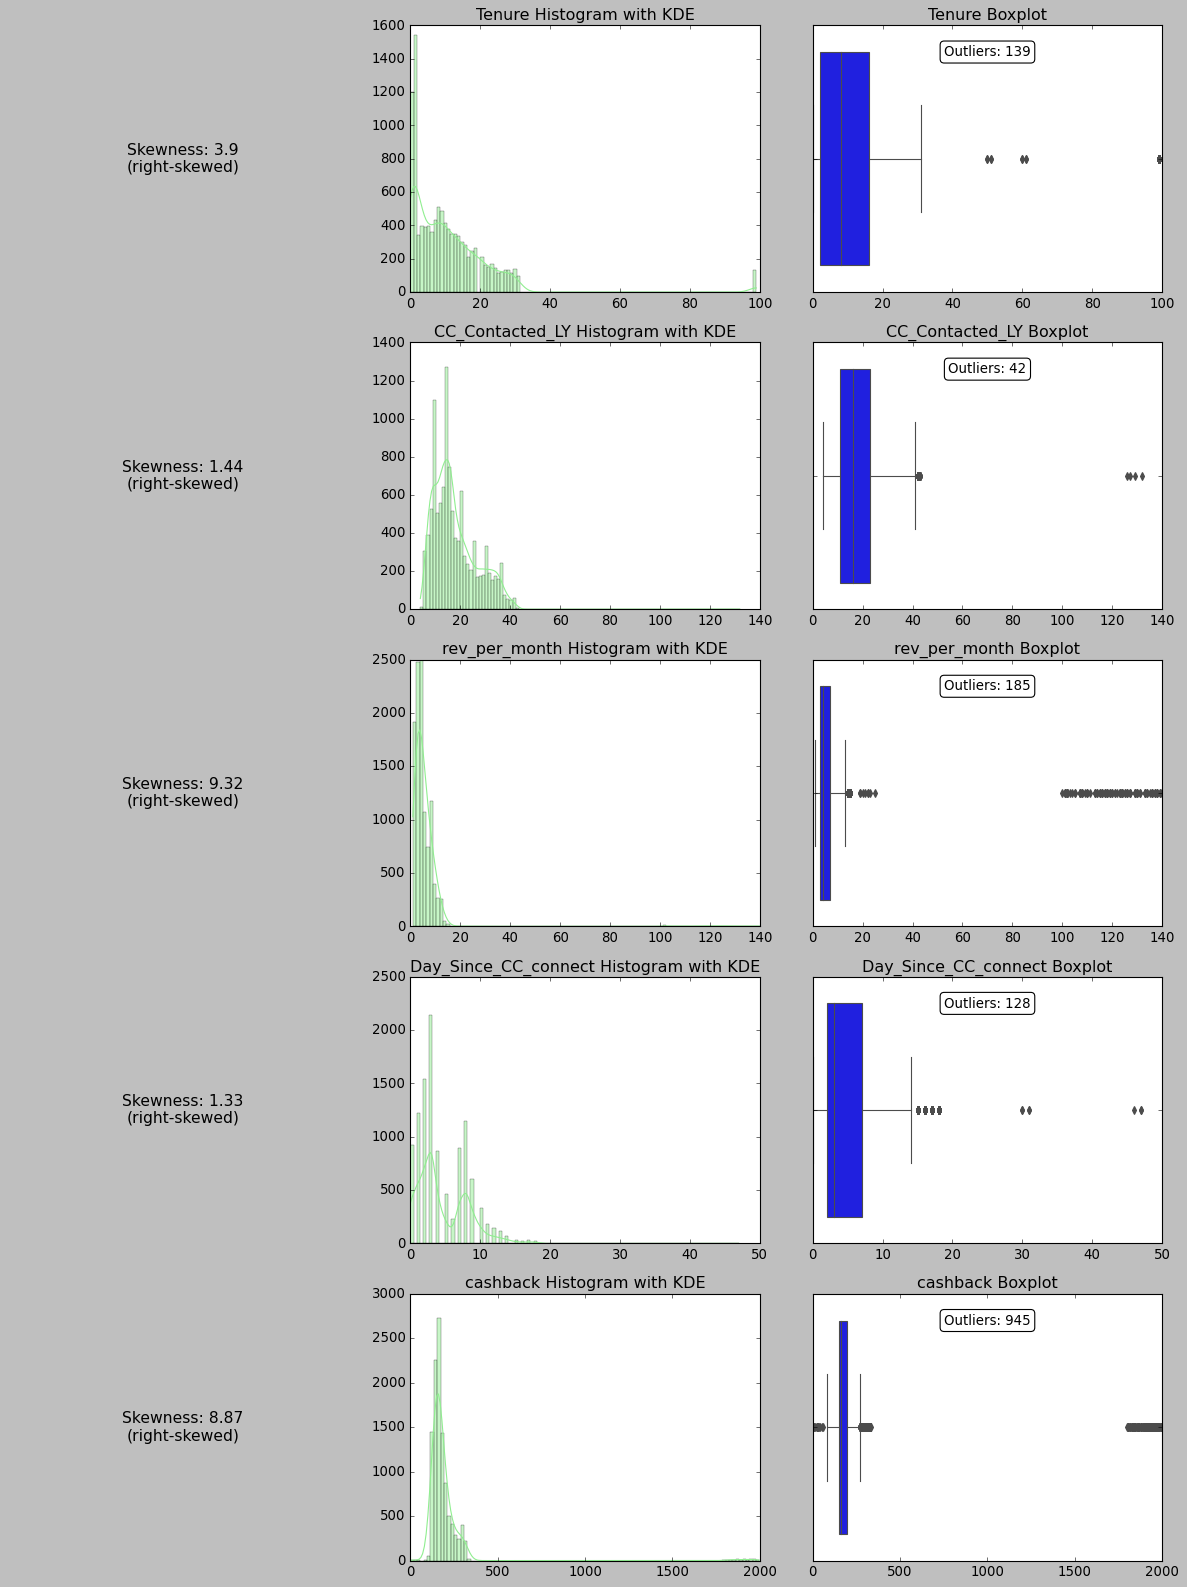

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Calculate skewness and skewness interpretation
def calculate_skewness(x):
    skewness = round(x.skew(), 2)
    interpretation = "left-skewed" if skewness < 0 else "right-skewed" if skewness > 0 else "symmetric"
    return skewness, interpretation

# Calculate Shapiro-Wilk test for normality
def shapiro_test(x):
    stat, p = shapiro(x)
    return stat, p

# Calculate number of outliers
def calculate_outliers(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = x[(x < lower_bound) | (x > upper_bound)]
    num_outliers = len(outliers)
    return num_outliers

# Create a figure and axes
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Specify the numeric variables to plot
numeric_vars = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'Day_Since_CC_connect', 'cashback']

# Loop through each numeric variable
for i, col in enumerate(numeric_vars):
    # Calculate skewness and skewness interpretation
    skewness, skew_interpretation = calculate_skewness(df[col])
    
    # Calculate Shapiro-Wilk test for normality
    stat, p = shapiro_test(df[col])
    shapiro_result = "Normal" if p > 0.05 else "Non-normal"
    
    # Calculate the square root of the number of data points
    sqrt_n = np.sqrt(len(df[col]))
    # Calculate the number of bins using the square root rule
    num_bins = int(sqrt_n)
    
    # Plot skewness with interpretation
    axes[i, 0].text(0.5, 0.5, f'Skewness: {skewness}\n({skew_interpretation})', fontsize=14, ha='center', va='center')
    axes[i, 0].axis('off')

    # Plot histogram with KDE
    sns.histplot(df[col], bins=num_bins, kde=True, color='lightgreen', ax=axes[i, 1], edgecolor='black')
    axes[i, 1].set_title(f'{col} Histogram with KDE')
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')
    
    # Plot boxplot
    sns.boxplot(x=df[col], ax=axes[i, 2])
    axes[i, 2].set_title(f'{col} Boxplot')
    axes[i, 2].set_xlabel('')
    axes[i, 2].set_ylabel('')

    # Calculate number of outliers
    num_outliers = calculate_outliers(df[col])

    # Annotate number of outliers
    axes[i, 2].annotate(f'Outliers: {num_outliers}', xy=(0.5, 0.5), xytext=(0.5, 0.9),
                      textcoords='axes fraction', fontsize=12, ha='center', va='center',
                      bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.tight_layout()
plt.show()


In [95]:
# Separate target variable (Churn) from features
predictors = df.drop(columns=['Churn'])  # Features
target = df['Churn']  # Target variable

# Print the shapes of predictors and target to verify
print("Shape of predictors:", predictors.shape)
print("Shape of target:", target.shape)


Shape of predictors: (11001, 17)
Shape of target: (11001,)


In [96]:
from scipy.stats import shapiro

# Assuming 'predictors' is your DataFrame containing all the predictors

# Select numerical columns
numeric_columns = predictors.select_dtypes(include=np.number).columns

# Perform Shapiro-Wilk test for normality for each numerical variable
for column in numeric_columns:
    # Perform Shapiro-Wilk test
    stat, p_value = shapiro(predictors[column])
    
    # Print the results
    print(f"Shapiro-Wilk test for '{column}':")
    print("Test Statistic:", stat)
    print("P-value:", p_value)
    
    # Check significance
    alpha = 0.05
    if p_value < alpha:
        print("The variable is not normally distributed (reject null hypothesis).")
    else:
        print("The variable is normally distributed (fail to reject null hypothesis).")


Shapiro-Wilk test for 'Tenure':
Test Statistic: 0.6647136211395264
P-value: 0.0
The variable is not normally distributed (reject null hypothesis).
Shapiro-Wilk test for 'CC_Contacted_LY':
Test Statistic: 0.8998135328292847
P-value: 0.0
The variable is not normally distributed (reject null hypothesis).
Shapiro-Wilk test for 'rev_per_month':
Test Statistic: 0.23290419578552246
P-value: 0.0
The variable is not normally distributed (reject null hypothesis).
Shapiro-Wilk test for 'Day_Since_CC_connect':
Test Statistic: 0.8926428556442261
P-value: 0.0
The variable is not normally distributed (reject null hypothesis).
Shapiro-Wilk test for 'cashback':
Test Statistic: 0.25022852420806885
P-value: 0.0
The variable is not normally distributed (reject null hypothesis).


In [97]:
from scipy.stats import skew

# Assuming 'predictors' is your DataFrame containing all the predictors

# Select numerical columns
numeric_columns = predictors.select_dtypes(include=np.number).columns

# Calculate skewness for each numerical variable
for column in numeric_columns:
    # Calculate skewness
    skewness = skew(predictors[column].dropna())
    
    # Determine skewness label
    skew_label = "Right-skewed (+)" if skewness > 0 else "Left-skewed (-)" if skewness < 0 else "Symmetric"
    
    # Print the results
    print(f"Skewness for '{column}': {skewness} ({skew_label})")


Skewness for 'Tenure': 3.8998246860980763 (Right-skewed (+))
Skewness for 'CC_Contacted_LY': 1.44437707727462 (Right-skewed (+))
Skewness for 'rev_per_month': 9.317349868999203 (Right-skewed (+))
Skewness for 'Day_Since_CC_connect': 1.3307694461495447 (Right-skewed (+))
Skewness for 'cashback': 8.872225051528533 (Right-skewed (+))


## Univariate Analysis of Categorical Variable

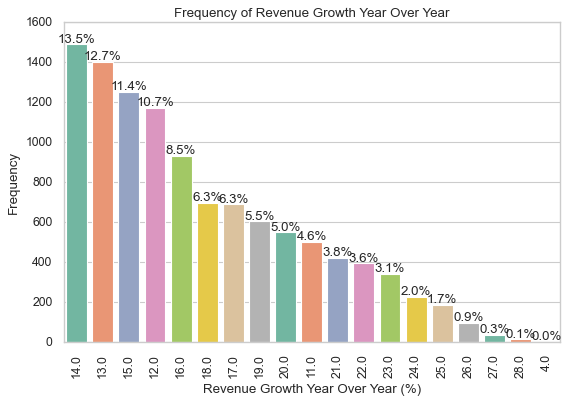

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate counts of each category
category_counts = predictors['rev_growth_yoy'].value_counts()

# Sort the categories by count
sorted_categories = category_counts.index.tolist()

# Create the count plot for rev_growth_yoy
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=predictors, x='rev_growth_yoy', order=sorted_categories, palette='Set2')

# Add percentage numbers on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(predictors))
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Frequency of Revenue Growth Year Over Year')
plt.xlabel('Revenue Growth Year Over Year (%)')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


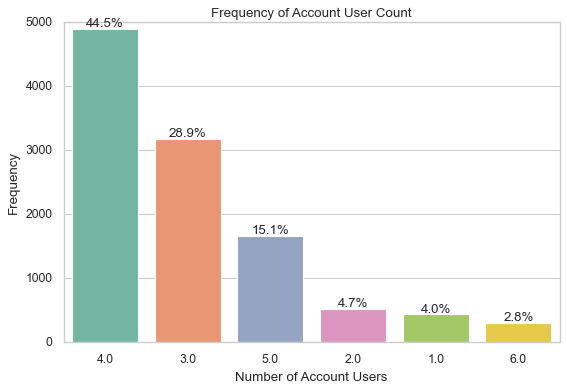

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate total count
total_count = len(predictors['Account_user_count'])

# Create the count plot for Account_user_count
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=predictors, x='Account_user_count', palette='Set2', order=predictors['Account_user_count'].value_counts().index)

# Add percentage numbers on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Frequency of Account User Count')
plt.xlabel('Number of Account Users')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # No need to rotate x-axis labels
plt.show()


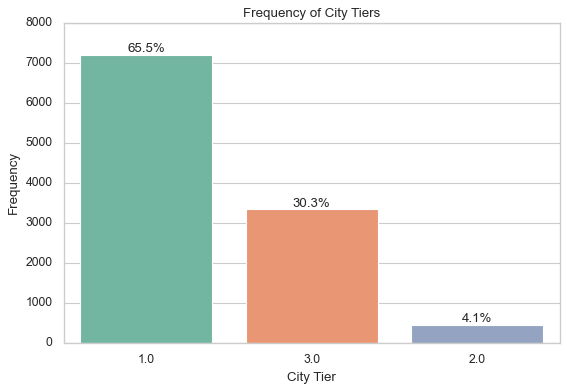

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate total count
total_count = len(predictors['City_Tier'])

# Create the count plot for City_Tier
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=predictors, x='City_Tier', palette='Set2', order=predictors['City_Tier'].value_counts().index)

# Add percentage numbers on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Frequency of City Tiers')
plt.xlabel('City Tier')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # No need to rotate x-axis labels for City Tier
plt.show()


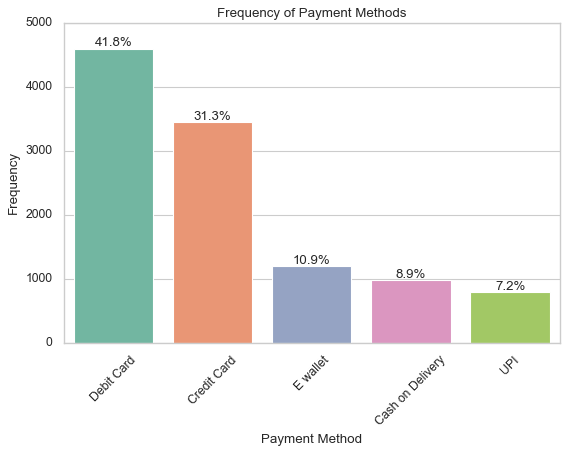

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate total count
total_count = len(predictors['Payment'])

# Create the count plot for Payment
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=predictors, x='Payment', palette='Set2', order=predictors['Payment'].value_counts().index)

# Add percentage numbers on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Frequency of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


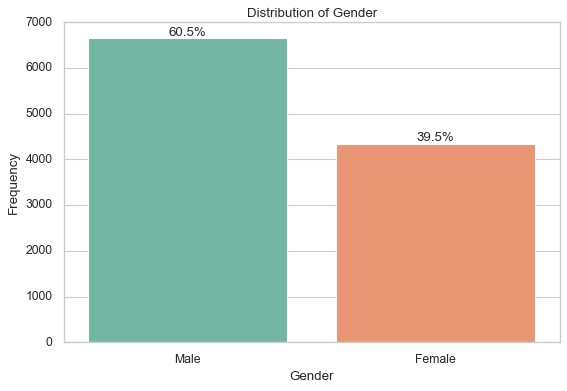

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate total count
total_count = len(predictors['Gender'])

# Create the count plot for Gender
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=predictors, x='Gender', palette='Set2', order=predictors['Gender'].value_counts().index)

# Add percentage numbers on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()


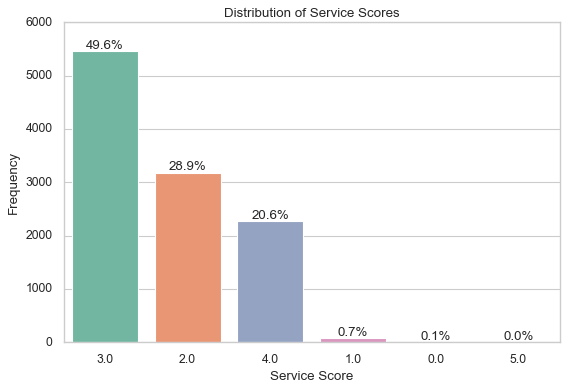

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate total count
total_count = len(predictors['Service_Score'])

# Create the count plot for Service_Score
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=predictors, x='Service_Score', palette='Set2', order=predictors['Service_Score'].value_counts().index)

# Add percentage numbers on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Service Scores')
plt.xlabel('Service Score')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # No need to rotate x-axis labels for Service Score
plt.show()


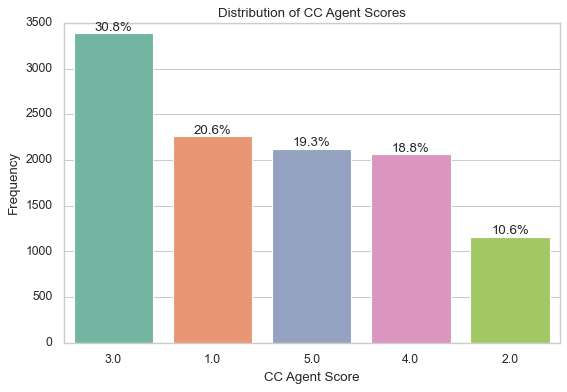

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate total count
total_count = len(predictors['CC_Agent_Score'])

# Create the count plot for CC_Agent_Score
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=predictors, x='CC_Agent_Score', palette='Set2', order=predictors['CC_Agent_Score'].value_counts().index)

# Add percentage numbers on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of CC Agent Scores')
plt.xlabel('CC Agent Score')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # No need to rotate x-axis labels for CC Agent Score
plt.show()


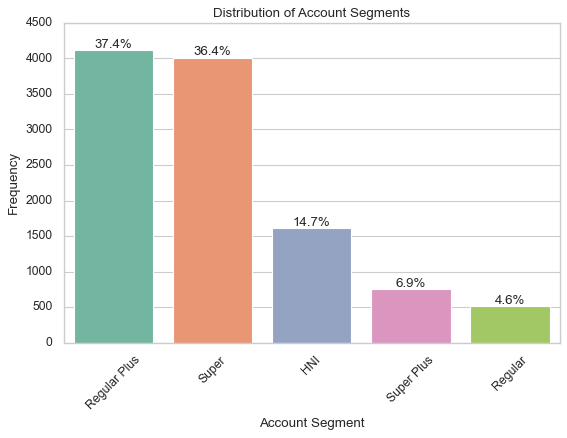

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate total count
total_count = len(predictors['account_segment'])

# Create the count plot for account_segment
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=predictors, x='account_segment', palette='Set2', order=predictors['account_segment'].value_counts().index)

# Add percentage numbers on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Account Segments')
plt.xlabel('Account Segment')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


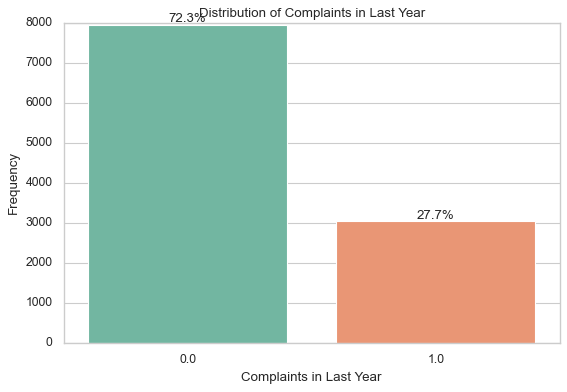

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate total count
total_count = len(predictors['Complain_ly'])

# Create the count plot for Complain_ly
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=predictors, x='Complain_ly', palette='Set2', order=predictors['Complain_ly'].value_counts().index)

# Add percentage numbers on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Complaints in Last Year')
plt.xlabel('Complaints in Last Year')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # No need to rotate x-axis labels for Complaints in Last Year
plt.show()


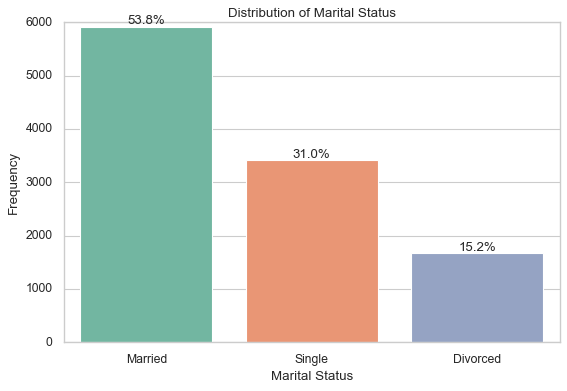

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate total count
total_count = len(predictors['Marital_Status'])

# Create the count plot for Marital_Status
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=predictors, x='Marital_Status', palette='Set2', order=predictors['Marital_Status'].value_counts().index)

# Add percentage numbers on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()


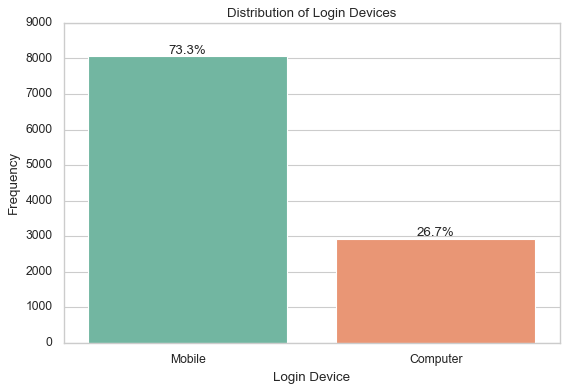

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate total count
total_count = len(predictors['Login_device'])

# Create the count plot for Login_device
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=predictors, x='Login_device', palette='Set2', order=predictors['Login_device'].value_counts().index)

# Add percentage numbers on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Login Devices')
plt.xlabel('Login Device')
plt.ylabel('Frequency')
plt.show()


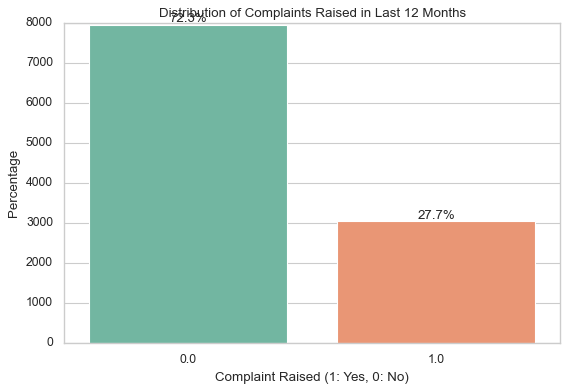

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate total count
total_count = len(predictors['Complain_ly'])

# Create the count plot for Complain_ly
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=predictors, x='Complain_ly', palette='Set2', order=predictors['Complain_ly'].value_counts().index)

# Add percentage numbers on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Complaints Raised in Last 12 Months')
plt.xlabel('Complaint Raised (1: Yes, 0: No)')
plt.ylabel('Percentage')
plt.show()


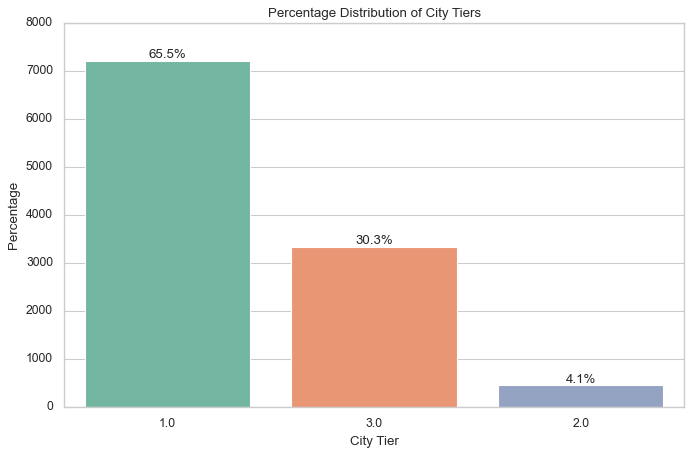

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate total count
total_count = len(predictors['City_Tier'])

# Create the count plot for City_Tier
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=predictors, x='City_Tier', palette='Set2', order=predictors['City_Tier'].value_counts().index)

# Add percentage numbers on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Percentage Distribution of City Tiers')
plt.xlabel('City Tier')
plt.ylabel('Percentage')
plt.show()


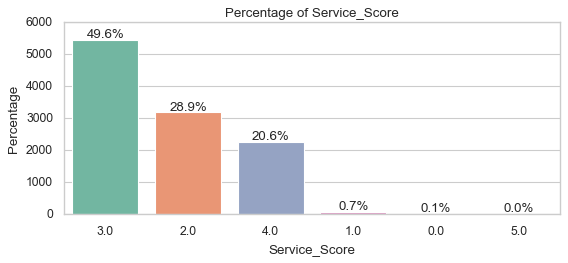

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate total count
total_count = len(predictors['Service_Score'])

# Create the count plot for Service_Score
plt.figure(figsize=(8, 3))
ax = sns.countplot(data=predictors, x='Service_Score', palette='Set2', order=predictors['Service_Score'].value_counts().index)

# Add percentage numbers on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Percentage of Service_Score')
plt.xlabel('Service_Score')
plt.ylabel('Percentage')
plt.show()


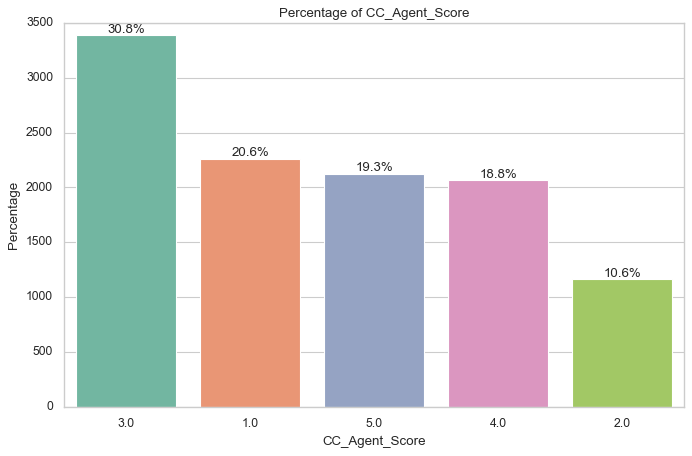

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate total count
total_count = len(predictors['CC_Agent_Score'])

# Create the count plot for CC_Agent_Score
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=predictors, x='CC_Agent_Score', palette='Set2', order=predictors['CC_Agent_Score'].value_counts().index)

# Add percentage numbers on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Percentage of CC_Agent_Score')
plt.xlabel('CC_Agent_Score')
plt.ylabel('Percentage')
plt.show()


## Bivariate Analysis

In [111]:
# Separate target variable (Churn) from features
predictors = df.drop(columns=['Churn'])  # Features
target = df['Churn']  # Target variable

# Print the shapes of predictors and target to verify
print("Shape of predictors:", predictors.shape)
print("Shape of target:", target.shape)


Shape of predictors: (11001, 17)
Shape of target: (11001,)


In [120]:
numeric_variables = predictors.select_dtypes(include=['int', 'float'])


In [121]:
categorical_variables = predictors.select_dtypes(include=['object', 'category'])
#numeric_variables = predictors.select_dtypes(include=['int', 'float'])


## ANOVA Test for Bivariate Analysis with Target Variable 'Churn'

In [119]:

from scipy.stats import f_oneway

# Define the list of categorical variables
categorical_variables = [ "City_Tier", "Payment", "Gender", "Service_Score", "Account_user_count", "account_segment", "CC_Agent_Score", "Marital_Status", "Complain_ly", "rev_growth_yoy", "coupon_used_for_payment", "Login_device"]

# Perform ANOVA for each categorical variable
for cat_var in categorical_variables:
    # Group data by categories of the current categorical variable
    groups = [df[df[cat_var] == category]['Churn'] for category in df[cat_var].unique()]
    
    # Perform ANOVA
    f_statistic, p_value = f_oneway(*groups)
    
    # Print the results
    print(f'ANOVA for {cat_var}: F-statistic = {f_statistic}, p-value = {p_value}')


ANOVA for City_Tier: F-statistic = 40.04122862029208, p-value = 4.71326216199383e-18
ANOVA for Payment: F-statistic = 25.804145761631247, p-value = 2.561047229313783e-21
ANOVA for Gender: F-statistic = 9.616707486326494, p-value = 0.0019330273977704183
ANOVA for Service_Score: F-statistic = 3.6931471057417413, p-value = 0.0024293547985143877
ANOVA for Account_user_count: F-statistic = 31.623427836923803, p-value = 4.2873045668461357e-32
ANOVA for account_segment: F-statistic = 140.87423550033557, p-value = 1.2591146583047952e-117
ANOVA for CC_Agent_Score: F-statistic = 34.82202929761376, p-value = 6.132246582348905e-29
ANOVA for Marital_Status: F-statistic = 194.19326907784512, p-value = 1.3119905424402945e-83
ANOVA for Complain_ly: F-statistic = 698.4323816509356, p-value = 2.8223346788286783e-149
ANOVA for rev_growth_yoy: F-statistic = 2.912577842235759, p-value = 3.3174669046267116e-05
ANOVA for coupon_used_for_payment: F-statistic = 1.5874845381085216, p-value = 0.06329374402576544

## Chi-square Test for Bivariate Analysis with Target Variable 'Churn'

In [115]:
# Perform chi-square test for each categorical variable
for column in categorical_variables.columns:
    # Create a contingency table (cross-tabulation)
    contingency_table = pd.crosstab(predictors[column], target)
    
    # Perform chi-square test
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    
    # Print the results
    print(f"\nChi-square test for '{column}'")
    print("Chi-square statistic:", chi2)
    print("P-value:", p_value)

    # Check significance
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant association between", column, "and Churn.")
    else:
        print("There is no significant association between", column, "and Churn.")


Chi-square test for 'City_Tier'
Chi-square statistic: 79.52523512116102
P-value: 5.386598519771599e-18
There is a significant association between City_Tier and Churn.

Chi-square test for 'Payment'
Chi-square statistic: 102.30322307875461
P-value: 3.1798387770579276e-21
There is a significant association between Payment and Churn.

Chi-square test for 'Gender'
Chi-square statistic: 9.449147584641777
P-value: 0.0021124725429312575
There is a significant association between Gender and Churn.

Chi-square test for 'Service_Score'
Chi-square statistic: 18.444834843949558
P-value: 0.0024375927116382238
There is a significant association between Service_Score and Churn.

Chi-square test for 'Account_user_count'
Chi-square statistic: 155.96058271985123
P-value: 7.182202773711363e-32
There is a significant association between Account_user_count and Churn.

Chi-square test for 'account_segment'
Chi-square statistic: 536.2715946948038
P-value: 9.551559331869426e-115
There is a significant associ

In [116]:
# Calculate correlation matrix
correlation_matrix = predictors.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                        Tenure  CC_Contacted_LY  rev_per_month  \
Tenure                1.000000        -0.003583       0.028531   
CC_Contacted_LY      -0.003583         1.000000       0.014344   
rev_per_month         0.028531         0.014344       1.000000   
Day_Since_CC_connect  0.120954         0.014501      -0.000721   
cashback              0.078091         0.001854       0.004888   

                      Day_Since_CC_connect  cashback  
Tenure                            0.120954  0.078091  
CC_Contacted_LY                   0.014501  0.001854  
rev_per_month                    -0.000721  0.004888  
Day_Since_CC_connect              1.000000  0.084913  
cashback                          0.084913  1.000000  


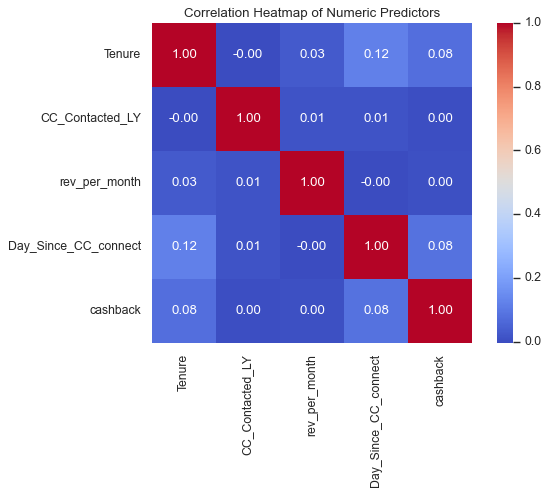

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = predictors.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 5))

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Add title and display the plot
plt.title('Correlation Heatmap of Numeric Predictors')
plt.show()


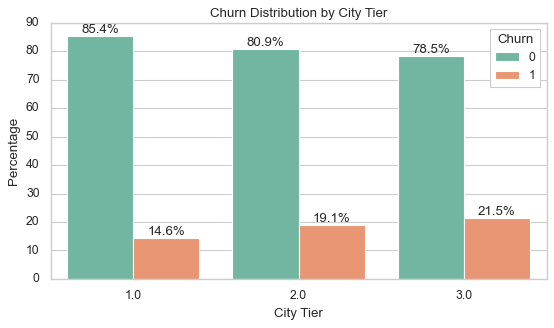

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentages of churn for each city tier
churn_percentages = df.groupby('City_Tier')['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Bivariate analysis for 'City_Tier' variable
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=churn_percentages, x='City_Tier', y='Percentage', hue='Churn', palette='Set2')
plt.title('Churn Distribution by City Tier')
plt.xlabel('City Tier')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


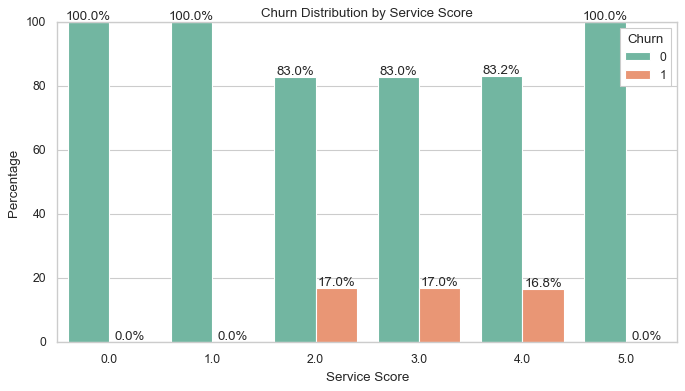

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentages of churn for each service score
churn_percentages = df.groupby('Service_Score')['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Bivariate analysis for 'Service_Score' variable
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=churn_percentages, x='Service_Score', y='Percentage', hue='Churn', palette='Set2')
plt.title('Churn Distribution by Service Score')
plt.xlabel('Service Score')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


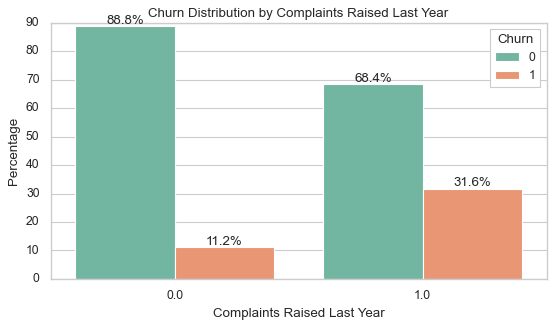

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentages of churn for each complaint raised last year
churn_percentages = df.groupby('Complain_ly')['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Bivariate analysis for 'Complain_ly' variable
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=churn_percentages, x='Complain_ly', y='Percentage', hue='Churn', palette='Set2')
plt.title('Churn Distribution by Complaints Raised Last Year')
plt.xlabel('Complaints Raised Last Year')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


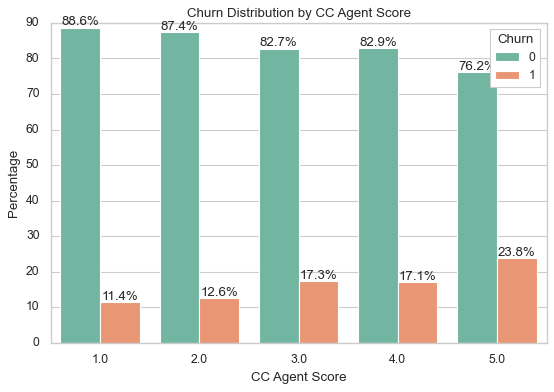

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentages of churn for each CC agent score
churn_percentages = df.groupby('CC_Agent_Score')['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Bivariate analysis for 'CC_Agent_Score' variable
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=churn_percentages, x='CC_Agent_Score', y='Percentage', hue='Churn', palette='Set2')
plt.title('Churn Distribution by CC Agent Score')
plt.xlabel('CC Agent Score')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


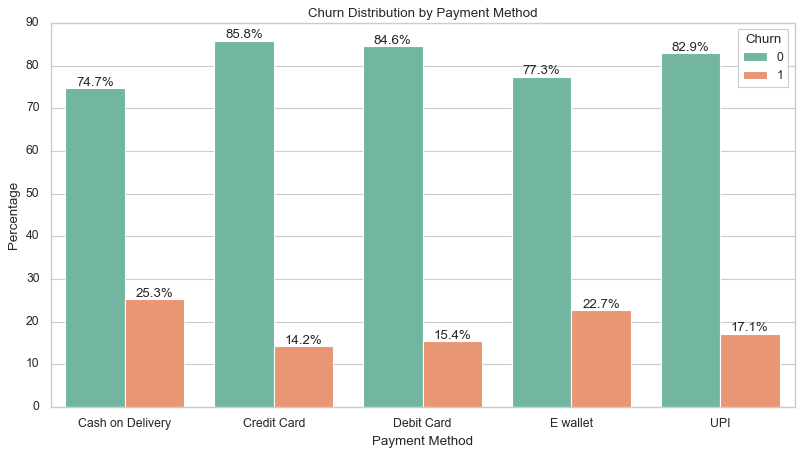

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentages of churn for each payment method
churn_percentages = df.groupby('Payment')['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Bivariate analysis for 'Payment' variable
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=churn_percentages, x='Payment', y='Percentage', hue='Churn', palette='Set2')
plt.title('Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


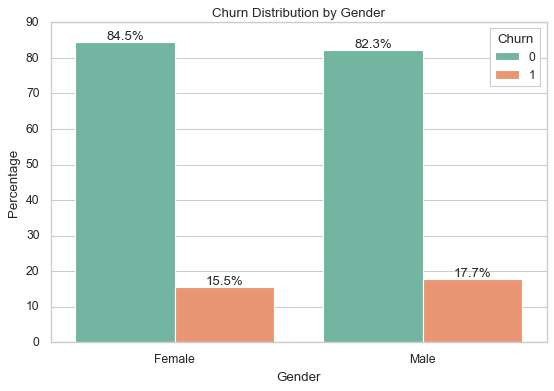

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentages of churn for each gender
churn_percentages = df.groupby('Gender')['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Bivariate analysis for 'Gender' variable
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=churn_percentages, x='Gender', y='Percentage', hue='Churn', palette='Set2')
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


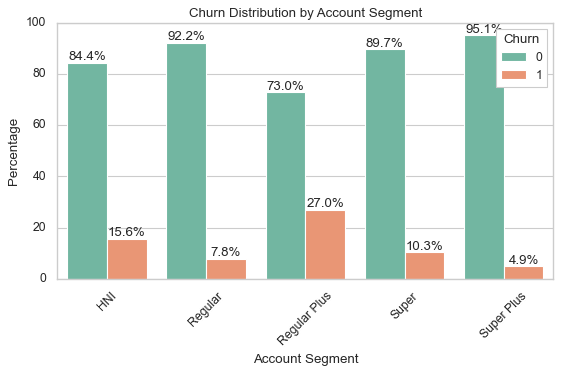

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentages of churn for each account segment
churn_percentages = df.groupby('account_segment')['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Bivariate analysis for 'account_segment' variable
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=churn_percentages, x='account_segment', y='Percentage', hue='Churn', palette='Set2')
plt.title('Churn Distribution by Account Segment')
plt.xlabel('Account Segment')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


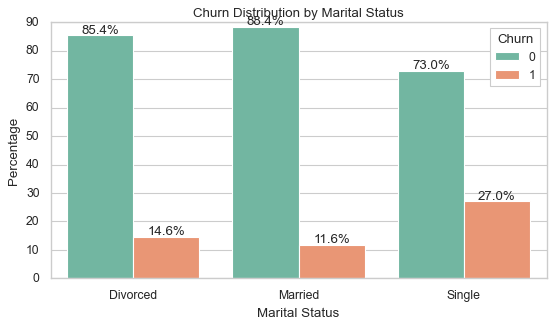

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentages of churn for each marital status
churn_percentages = df.groupby('Marital_Status')['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Bivariate analysis for 'Marital_Status' variable
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=churn_percentages, x='Marital_Status', y='Percentage', hue='Churn', palette='Set2')
plt.title('Churn Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


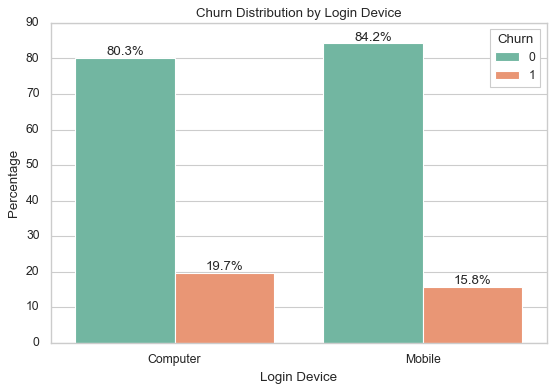

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentages of churn for each login device
churn_percentages = df.groupby('Login_device')['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Bivariate analysis for 'Login_device' variable
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=churn_percentages, x='Login_device', y='Percentage', hue='Churn', palette='Set2')
plt.title('Churn Distribution by Login Device')
plt.xlabel('Login Device')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


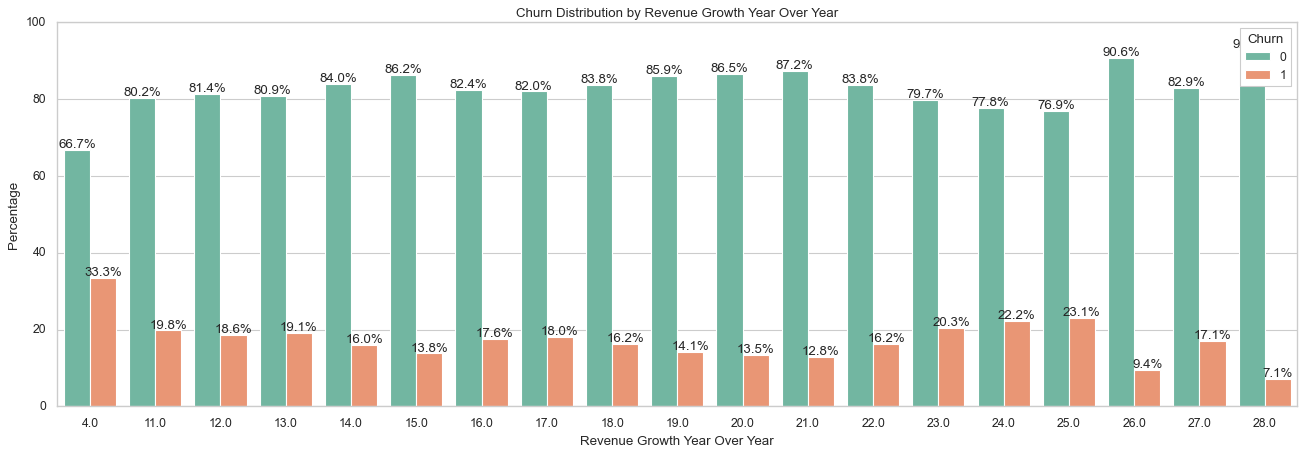

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentages of churn for each revenue growth year over year
churn_percentages = df.groupby('rev_growth_yoy')['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Sort the DataFrame by 'rev_growth_yoy' values
churn_percentages.sort_values(by='rev_growth_yoy', inplace=True)

# Set the style of seaborn
sns.set(style="whitegrid")

# Bivariate analysis for 'rev_growth_yoy' variable
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=churn_percentages, x='rev_growth_yoy', y='Percentage', hue='Churn', palette='Set2')
plt.title('Churn Distribution by Revenue Growth Year Over Year')
plt.xlabel('Revenue Growth Year Over Year')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


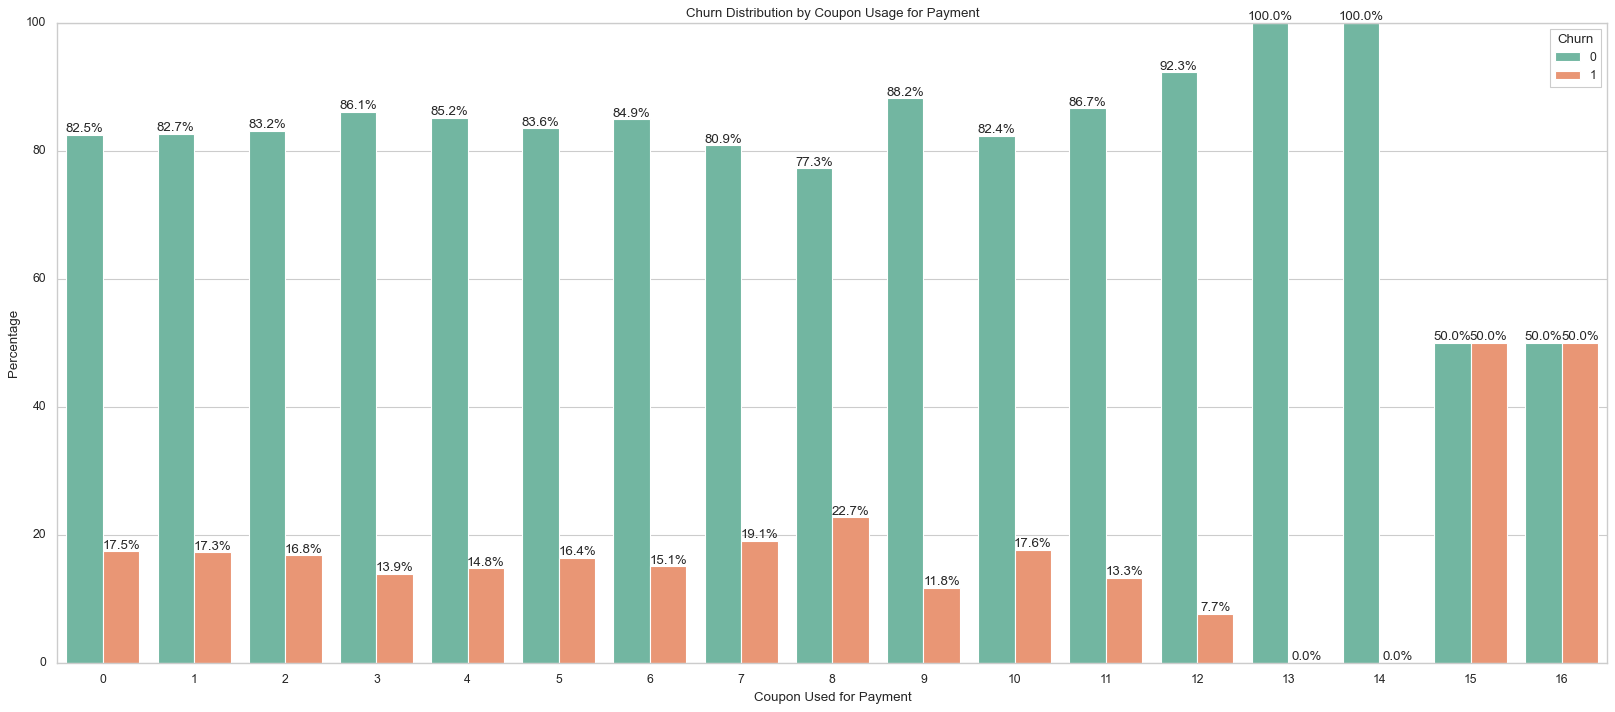

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentages of churn for each coupon usage for payment
churn_percentages = df.groupby('coupon_used_for_payment')['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Bivariate analysis for 'coupon_used_for_payment' variable
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=churn_percentages, x='coupon_used_for_payment', y='Percentage', hue='Churn', palette='Set2')
plt.title('Churn Distribution by Coupon Usage for Payment')
plt.xlabel('Coupon Used for Payment')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


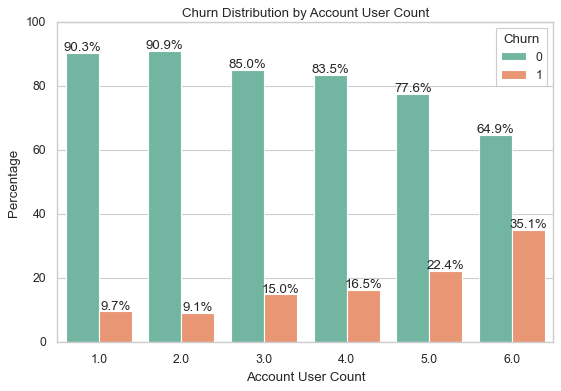

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentages of churn for each account user count
churn_percentages = df.groupby('Account_user_count')['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Bivariate analysis for 'Account_user_count' variable
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=churn_percentages, x='Account_user_count', y='Percentage', hue='Churn', palette='Set2')
plt.title('Churn Distribution by Account User Count')
plt.xlabel('Account User Count')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()



In [69]:
# Filter out categorical and numerical variables
categorical_vars = df.select_dtypes(include='category').columns.tolist()
numeric_vars = df.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()

# Count the number of categorical and numerical variables
num_categorical_vars = len(categorical_vars)
num_numeric_vars = len(numeric_vars)

# Print the number and list of categorical and numerical variables
print("Number of Categorical Variables:", num_categorical_vars)
print("Categorical Variables:", categorical_vars)
print("\nNumber of Numeric Variables:", num_numeric_vars)
print("Numeric Variables:", numeric_vars)


Number of Categorical Variables: 13
Categorical Variables: ['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Login_device']

Number of Numeric Variables: 5
Numeric Variables: ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'Day_Since_CC_connect', 'cashback']


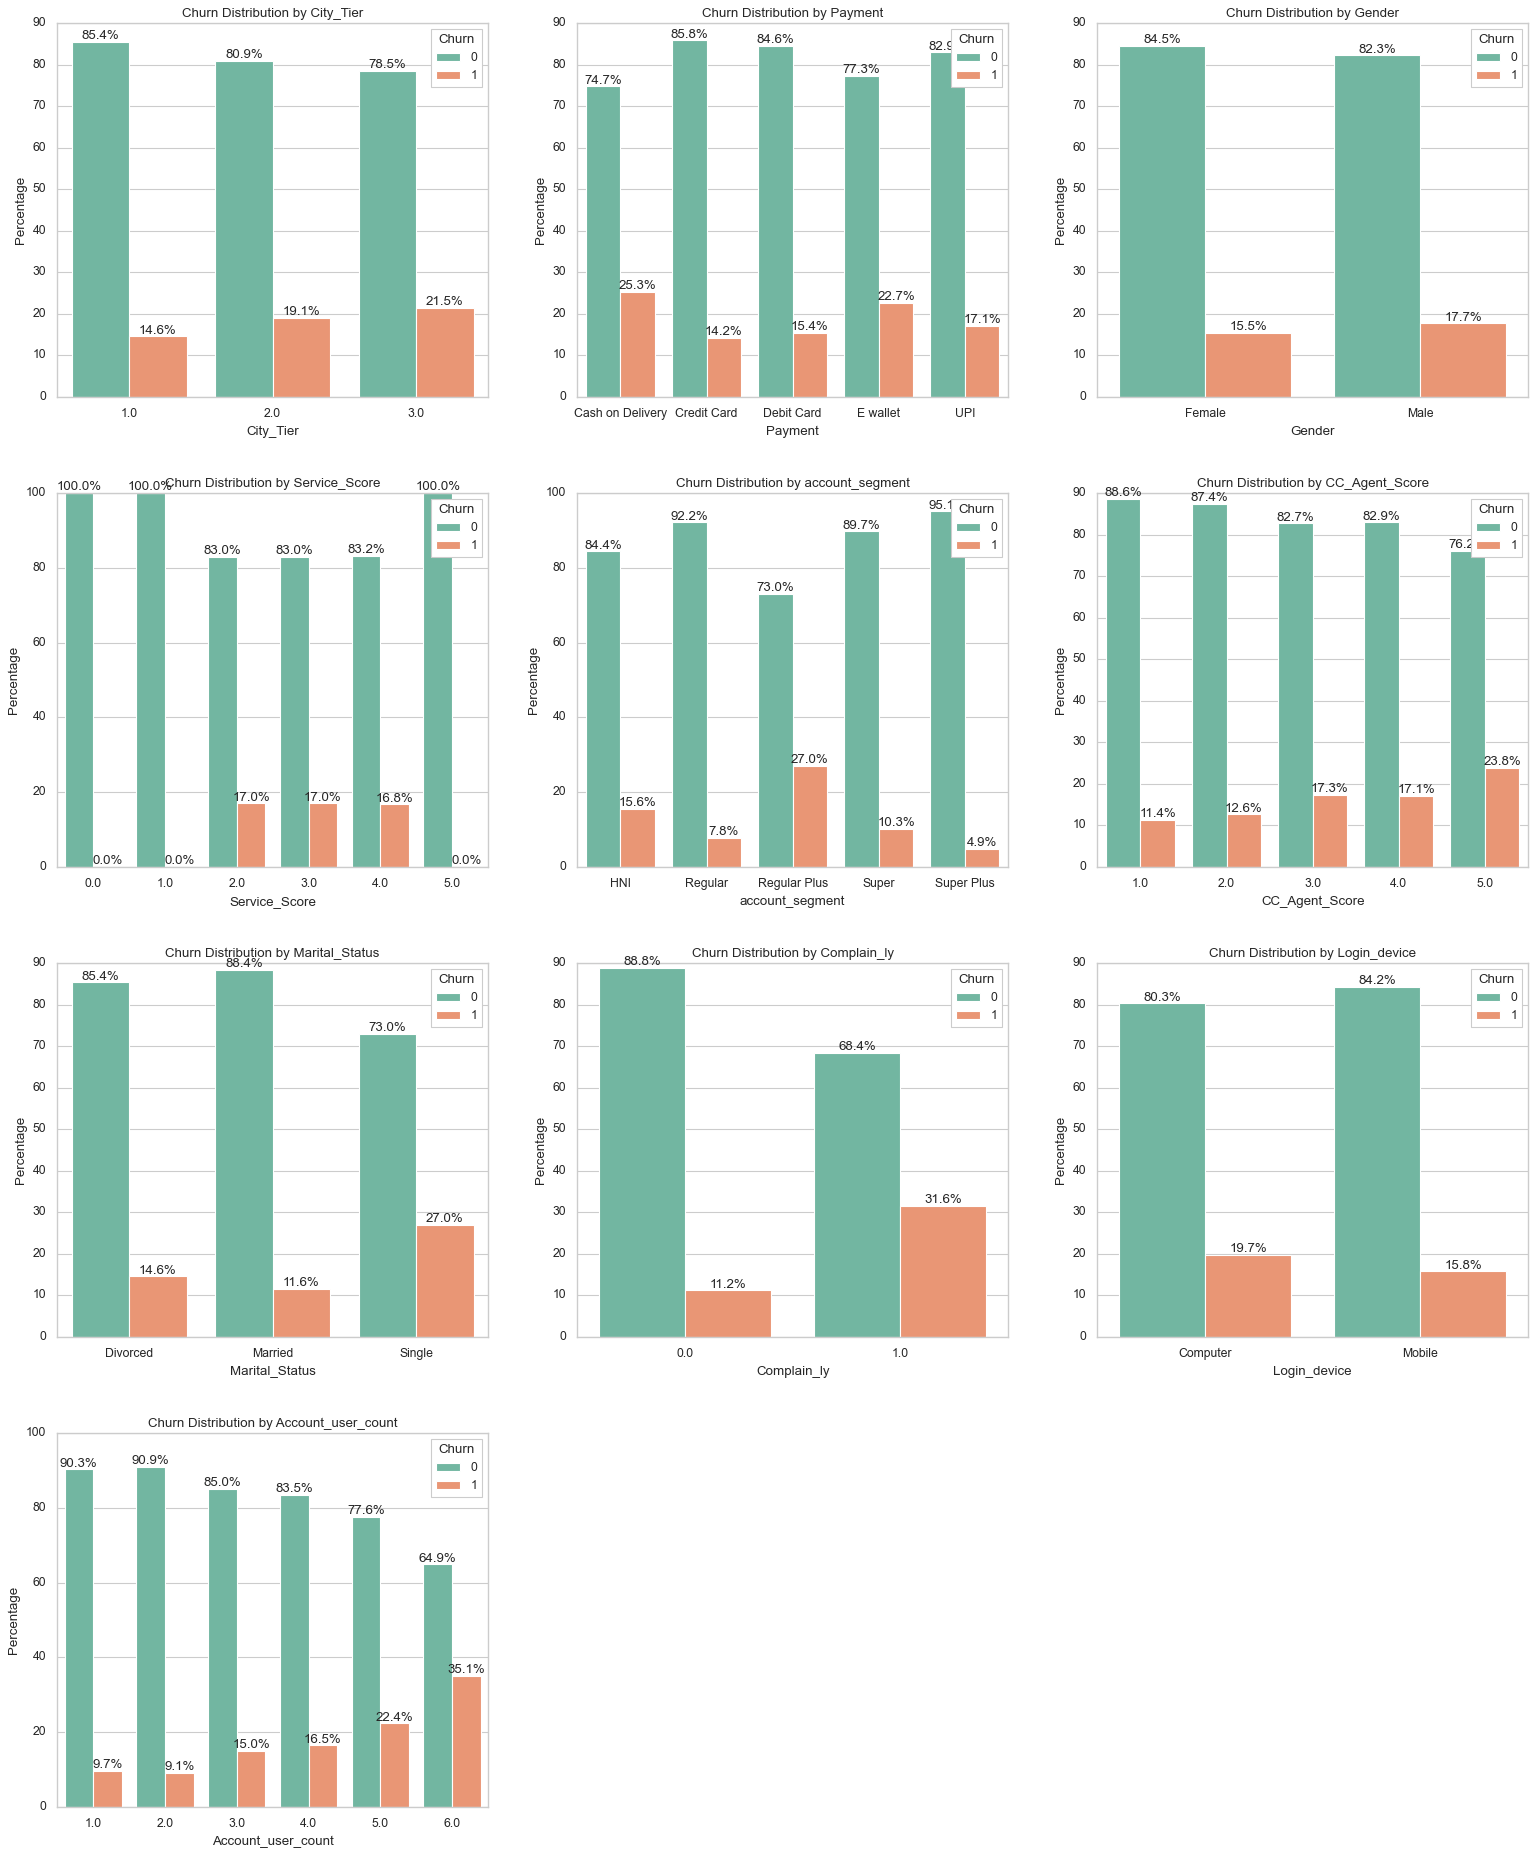

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot bivariate analysis with percentage of churn
def plot_bivariate_with_percentage(df, categorical_var, ax):
    # Calculate percentages of churn for each category of the categorical variable
    churn_percentages = df.groupby(categorical_var)['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
    
    # Plot the barplot
    sns.barplot(data=churn_percentages, x=categorical_var, y='Percentage', hue='Churn', ax=ax, palette='Set2')
    
    # Set title and labels
    ax.set_title(f'Churn Distribution by {categorical_var}')
    ax.set_xlabel(categorical_var)
    ax.set_ylabel('Percentage')
    ax.legend(title='Churn', loc='upper right')
    
    # Add percentage labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Categorical variables to visualize
categorical_variables = ['City_Tier', 'Payment', 'Gender', 'Service_Score', 'account_segment',
                         'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'Login_device',
                         'Account_user_count']

# Number of subplots per row
subplots_per_row = 3

# Calculate number of rows needed
num_variables = len(categorical_variables)
num_rows = (num_variables + subplots_per_row - 1) // subplots_per_row

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=subplots_per_row, figsize=(20, 6 * num_rows))

# Flatten the axes array
axes = axes.flatten()

# Loop through each categorical variable
for i, categorical_var in enumerate(categorical_variables):
    # Plot bivariate analysis for the current categorical variable
    plot_bivariate_with_percentage(df, categorical_var, axes[i])

# Hide any remaining empty subplots
for j in range(num_variables, num_rows * subplots_per_row):
    fig.delaxes(axes[j])

# Adjust layout to leave space between subplots
plt.tight_layout(pad=3.0, h_pad=3.0)
plt.show()


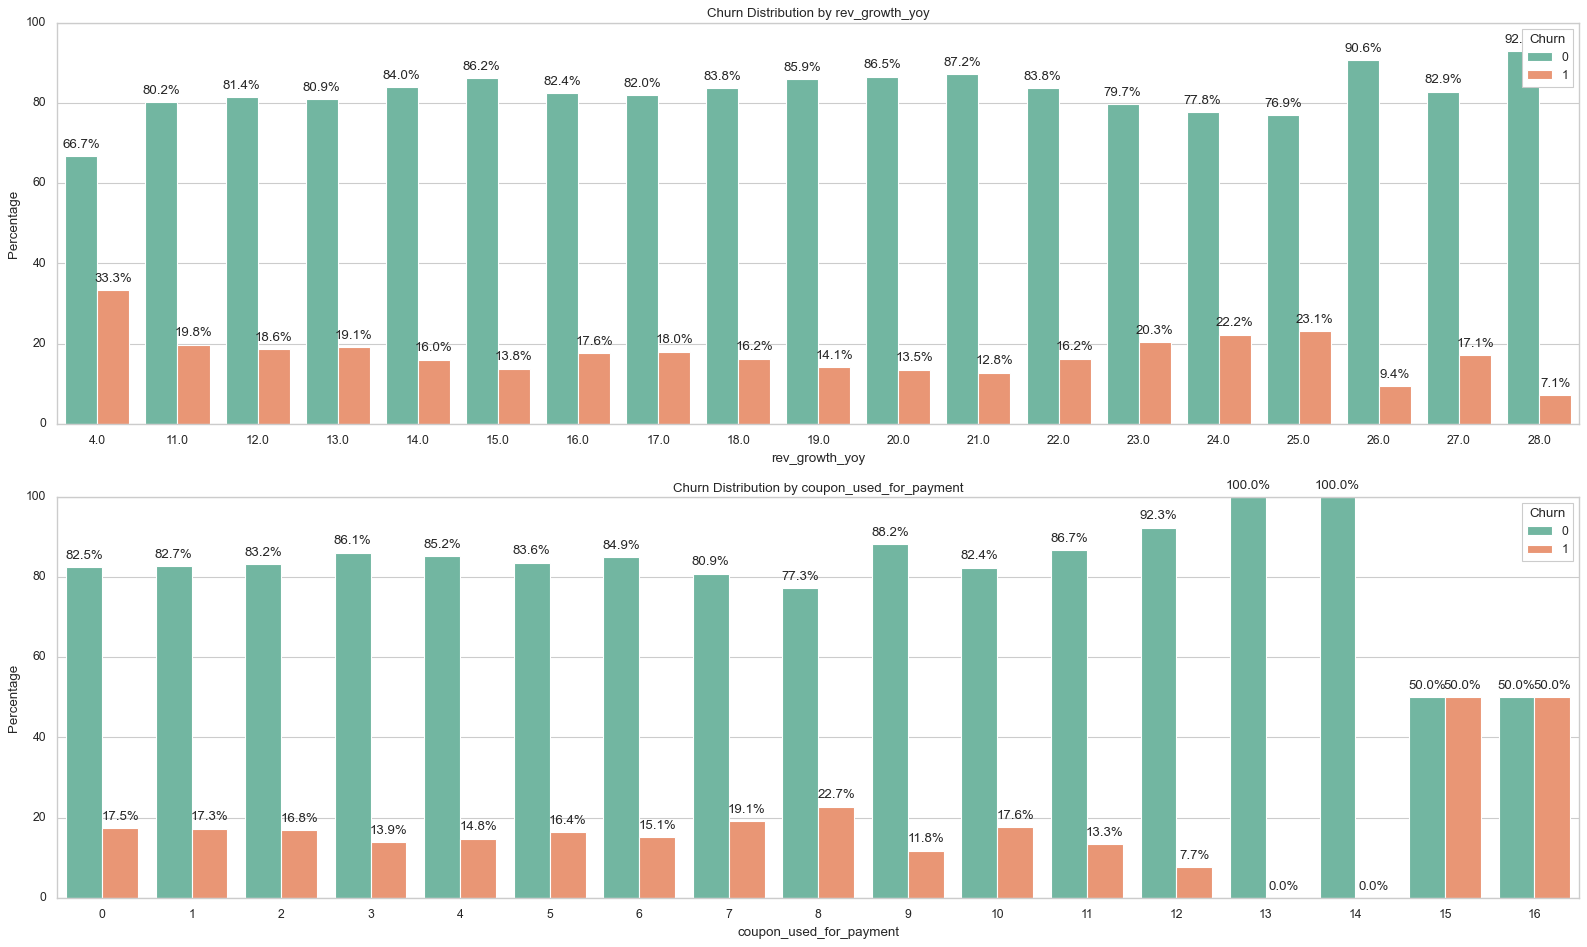

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot bivariate analysis with percentage of churn
def plot_bivariate_with_percentage(df, categorical_var, ax):
    # Calculate percentages of churn for each category of the categorical variable
    churn_percentages = df.groupby(categorical_var)['Churn'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
    
    # Plot the barplot
    sns.barplot(data=churn_percentages, x=categorical_var, y='Percentage', hue='Churn', ax=ax, palette='Set2')
    
    # Set title and labels
    ax.set_title(f'Churn Distribution by {categorical_var}')
    ax.set_xlabel(categorical_var)
    ax.set_ylabel('Percentage')
    ax.legend(title='Churn', loc='upper right')
    
    # Add percentage labels on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# Create subplots for rev_growth_yoy and coupon_used_for_payment
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))

# Plot for rev_growth_yoy
plot_bivariate_with_percentage(df, 'rev_growth_yoy', axes[0])

# Plot for coupon_used_for_payment
plot_bivariate_with_percentage(df, 'coupon_used_for_payment', axes[1])

# Adjust layout
plt.tight_layout()
plt.show()


In [72]:
# Loop through each categorical variable
for categorical_var in categorical_variables:
    # Get counts for churned and non-churned instances
    churn_counts = df[df['Churn'] == 1][categorical_var].value_counts()
    non_churn_counts = df[df['Churn'] == 0][categorical_var].value_counts()
    
    # Print counts for churned and non-churned instances
    print(f'\nChurn Distribution for {categorical_var}:')
    print('----------------------------------------')
    print('Churned Instances:')
    print(churn_counts)
    print('\nNon-Churned Instances:')
    print(non_churn_counts)



Churn Distribution for City_Tier:
----------------------------------------
Churned Instances:
1.0    1049
3.0     716
2.0      87
Name: City_Tier, dtype: int64

Non-Churned Instances:
1.0    6160
3.0    2620
2.0     369
Name: City_Tier, dtype: int64

Churn Distribution for Payment:
----------------------------------------
Churned Instances:
Debit Card          709
Credit Card         489
E wallet            271
Cash on Delivery    247
UPI                 136
Name: Payment, dtype: int64

Non-Churned Instances:
Debit Card          3884
Credit Card         2952
E wallet             924
Cash on Delivery     730
UPI                  659
Name: Payment, dtype: int64

Churn Distribution for Gender:
----------------------------------------
Churned Instances:
Male      1180
Female     672
Name: Gender, dtype: int64

Non-Churned Instances:
Male      5476
Female    3673
Name: Gender, dtype: int64

Churn Distribution for Service_Score:
----------------------------------------
Churned Instances:
3.

In [73]:
# Numeric variables to analyze
numeric_variables = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'Day_Since_CC_connect', 'cashback']

# Loop through each numeric variable
for numeric_var in numeric_variables:
    # Get descriptive statistics for churned and non-churned instances
    churn_stats = df[df['Churn'] == 1][numeric_var].describe()
    non_churn_stats = df[df['Churn'] == 0][numeric_var].describe()
    
    # Print descriptive statistics for churned and non-churned instances
    print(f'\nDescriptive Statistics for {numeric_var}:')
    print('-----------------------------------------')
    print('Churned Instances:')
    print(churn_stats)
    print('\nNon-Churned Instances:')
    print(non_churn_stats)



Descriptive Statistics for Tenure:
-----------------------------------------
Churned Instances:
count    1852.000000
mean        4.268359
std        12.038019
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        99.000000
Name: Tenure, dtype: float64

Non-Churned Instances:
count    9149.000000
mean       12.203520
std        12.681697
min         0.000000
25%         4.000000
50%        10.000000
75%        17.000000
max        99.000000
Name: Tenure, dtype: float64

Descriptive Statistics for CC_Contacted_LY:
-----------------------------------------
Churned Instances:
count    1852.000000
mean       19.254320
std         8.871287
min         4.000000
25%        12.000000
50%        17.000000
75%        26.000000
max        43.000000
Name: CC_Contacted_LY, dtype: float64

Non-Churned Instances:
count    9149.000000
mean       17.593617
std         8.796869
min         5.000000
25%        11.000000
50%        16.000000
75%        22.000000
ma

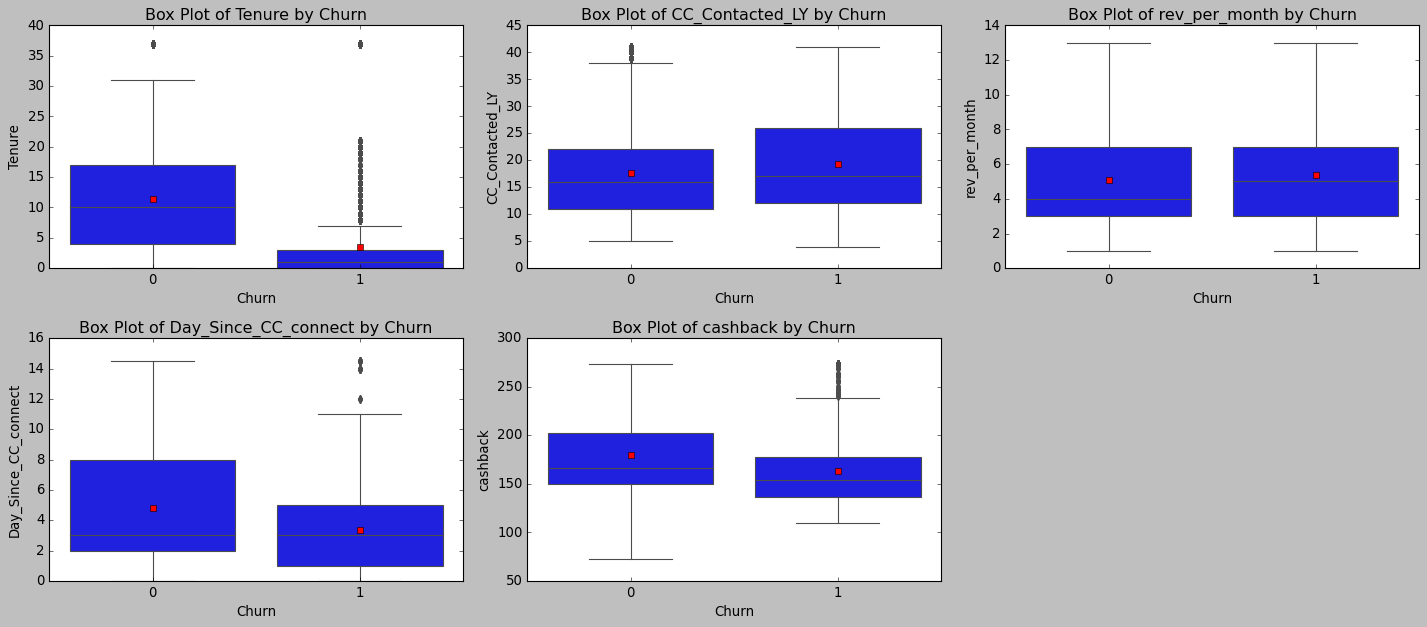

In [136]:
# Numeric variables to visualize
numeric_variables = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'Day_Since_CC_connect', 'cashback']

# Number of subplots per row
subplots_per_row = 3

# Calculate number of rows needed
num_variables = len(numeric_variables)
num_rows = (num_variables + subplots_per_row - 1) // subplots_per_row

# Create subplots with larger figure size
fig, axes = plt.subplots(nrows=num_rows, ncols=subplots_per_row, figsize=(18, 4 * num_rows))

# Flatten the axes array
axes = axes.flatten()

# Loop through each numeric variable
for i, numeric_var in enumerate(numeric_variables):
    # Box plot for numeric variable vs. Churn with blue color
    sns.boxplot(data=df, x='Churn', y=numeric_var, showmeans=True, ax=axes[i], color='blue')
    
    # Set title and labels
    axes[i].set_title(f'Box Plot of {numeric_var} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(numeric_var)

# Hide any remaining empty subplots
for j in range(num_variables, num_rows * subplots_per_row):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


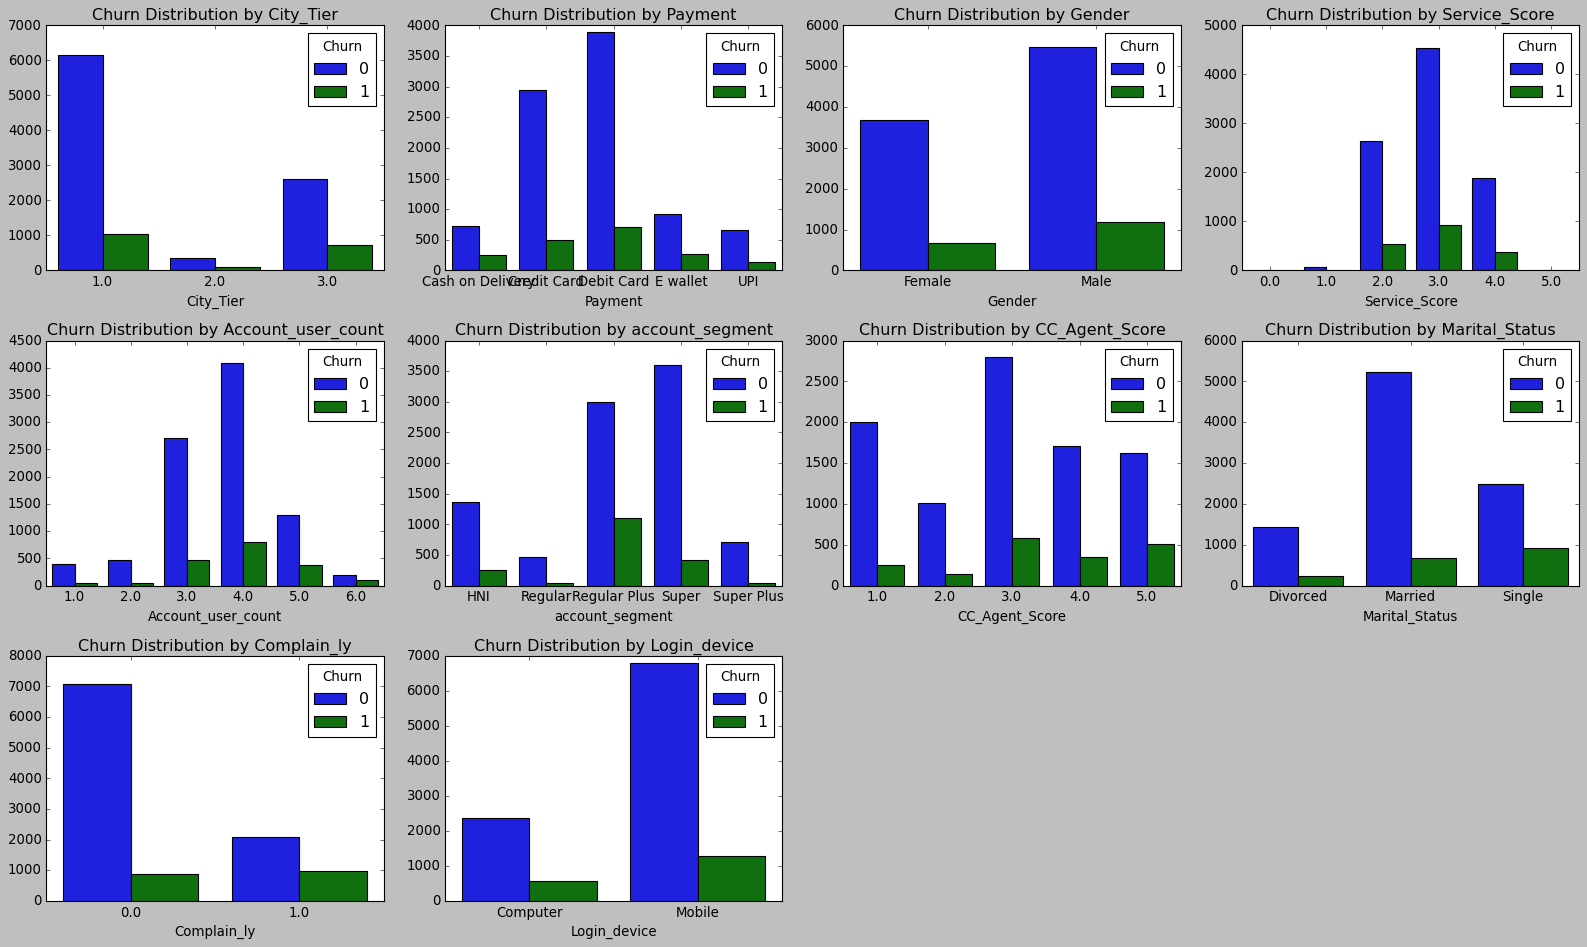

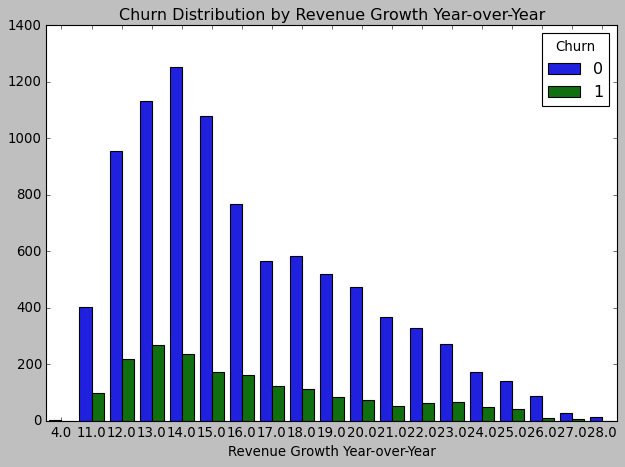

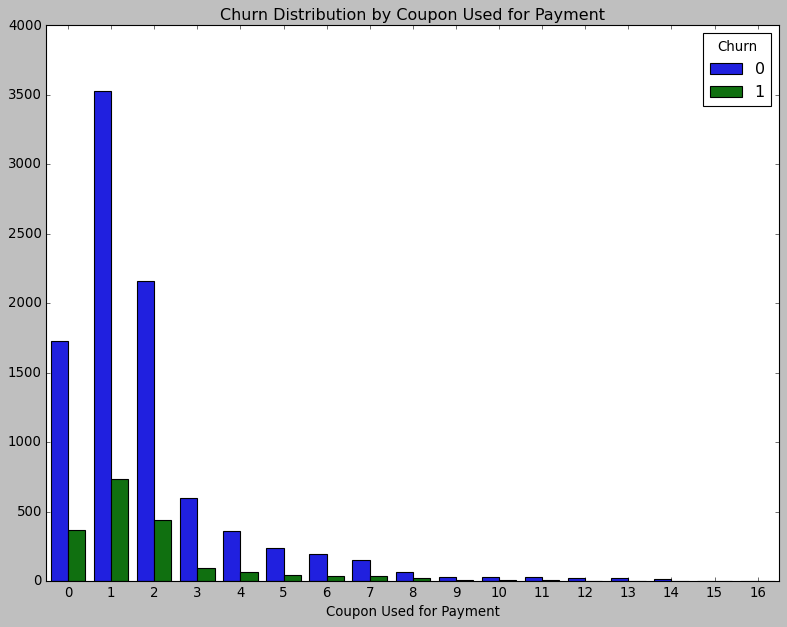

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical variables
categorical_vars = ['City_Tier', 'Payment', 'Gender', 'Service_Score', 
                    'Account_user_count', 'account_segment', 'CC_Agent_Score', 
                    'Marital_Status', 'Complain_ly', 'Login_device']

# Calculate number of subplots per row
max_plots_per_row = 4
num_rows = len(categorical_vars) // max_plots_per_row + (1 if len(categorical_vars) % max_plots_per_row != 0 else 0)
num_cols = min(len(categorical_vars), max_plots_per_row)

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 4 * num_rows))
axes = axes.flatten()

# Loop through each categorical variable
for i, cat_var in enumerate(categorical_vars):
    # Plot countplot for each variable
    sns.countplot(data=df, x=cat_var, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Churn Distribution by {cat_var}')
    axes[i].set_xlabel(cat_var)
    axes[i].set_ylabel('')
    axes[i].legend(title='Churn', loc='upper right')

# Hide any remaining empty subplots
for j in range(len(categorical_vars), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Additional countplot for 'rev_growth_yoy'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='rev_growth_yoy', hue='Churn')
plt.title('Churn Distribution by Revenue Growth Year-over-Year')
plt.xlabel('Revenue Growth Year-over-Year')
plt.ylabel('')
plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

# Additional countplot for 'coupon_used_for_payment'
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='coupon_used_for_payment', hue='Churn')
plt.title('Churn Distribution by Coupon Used for Payment')
plt.xlabel('Coupon Used for Payment')
plt.ylabel('')
plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()


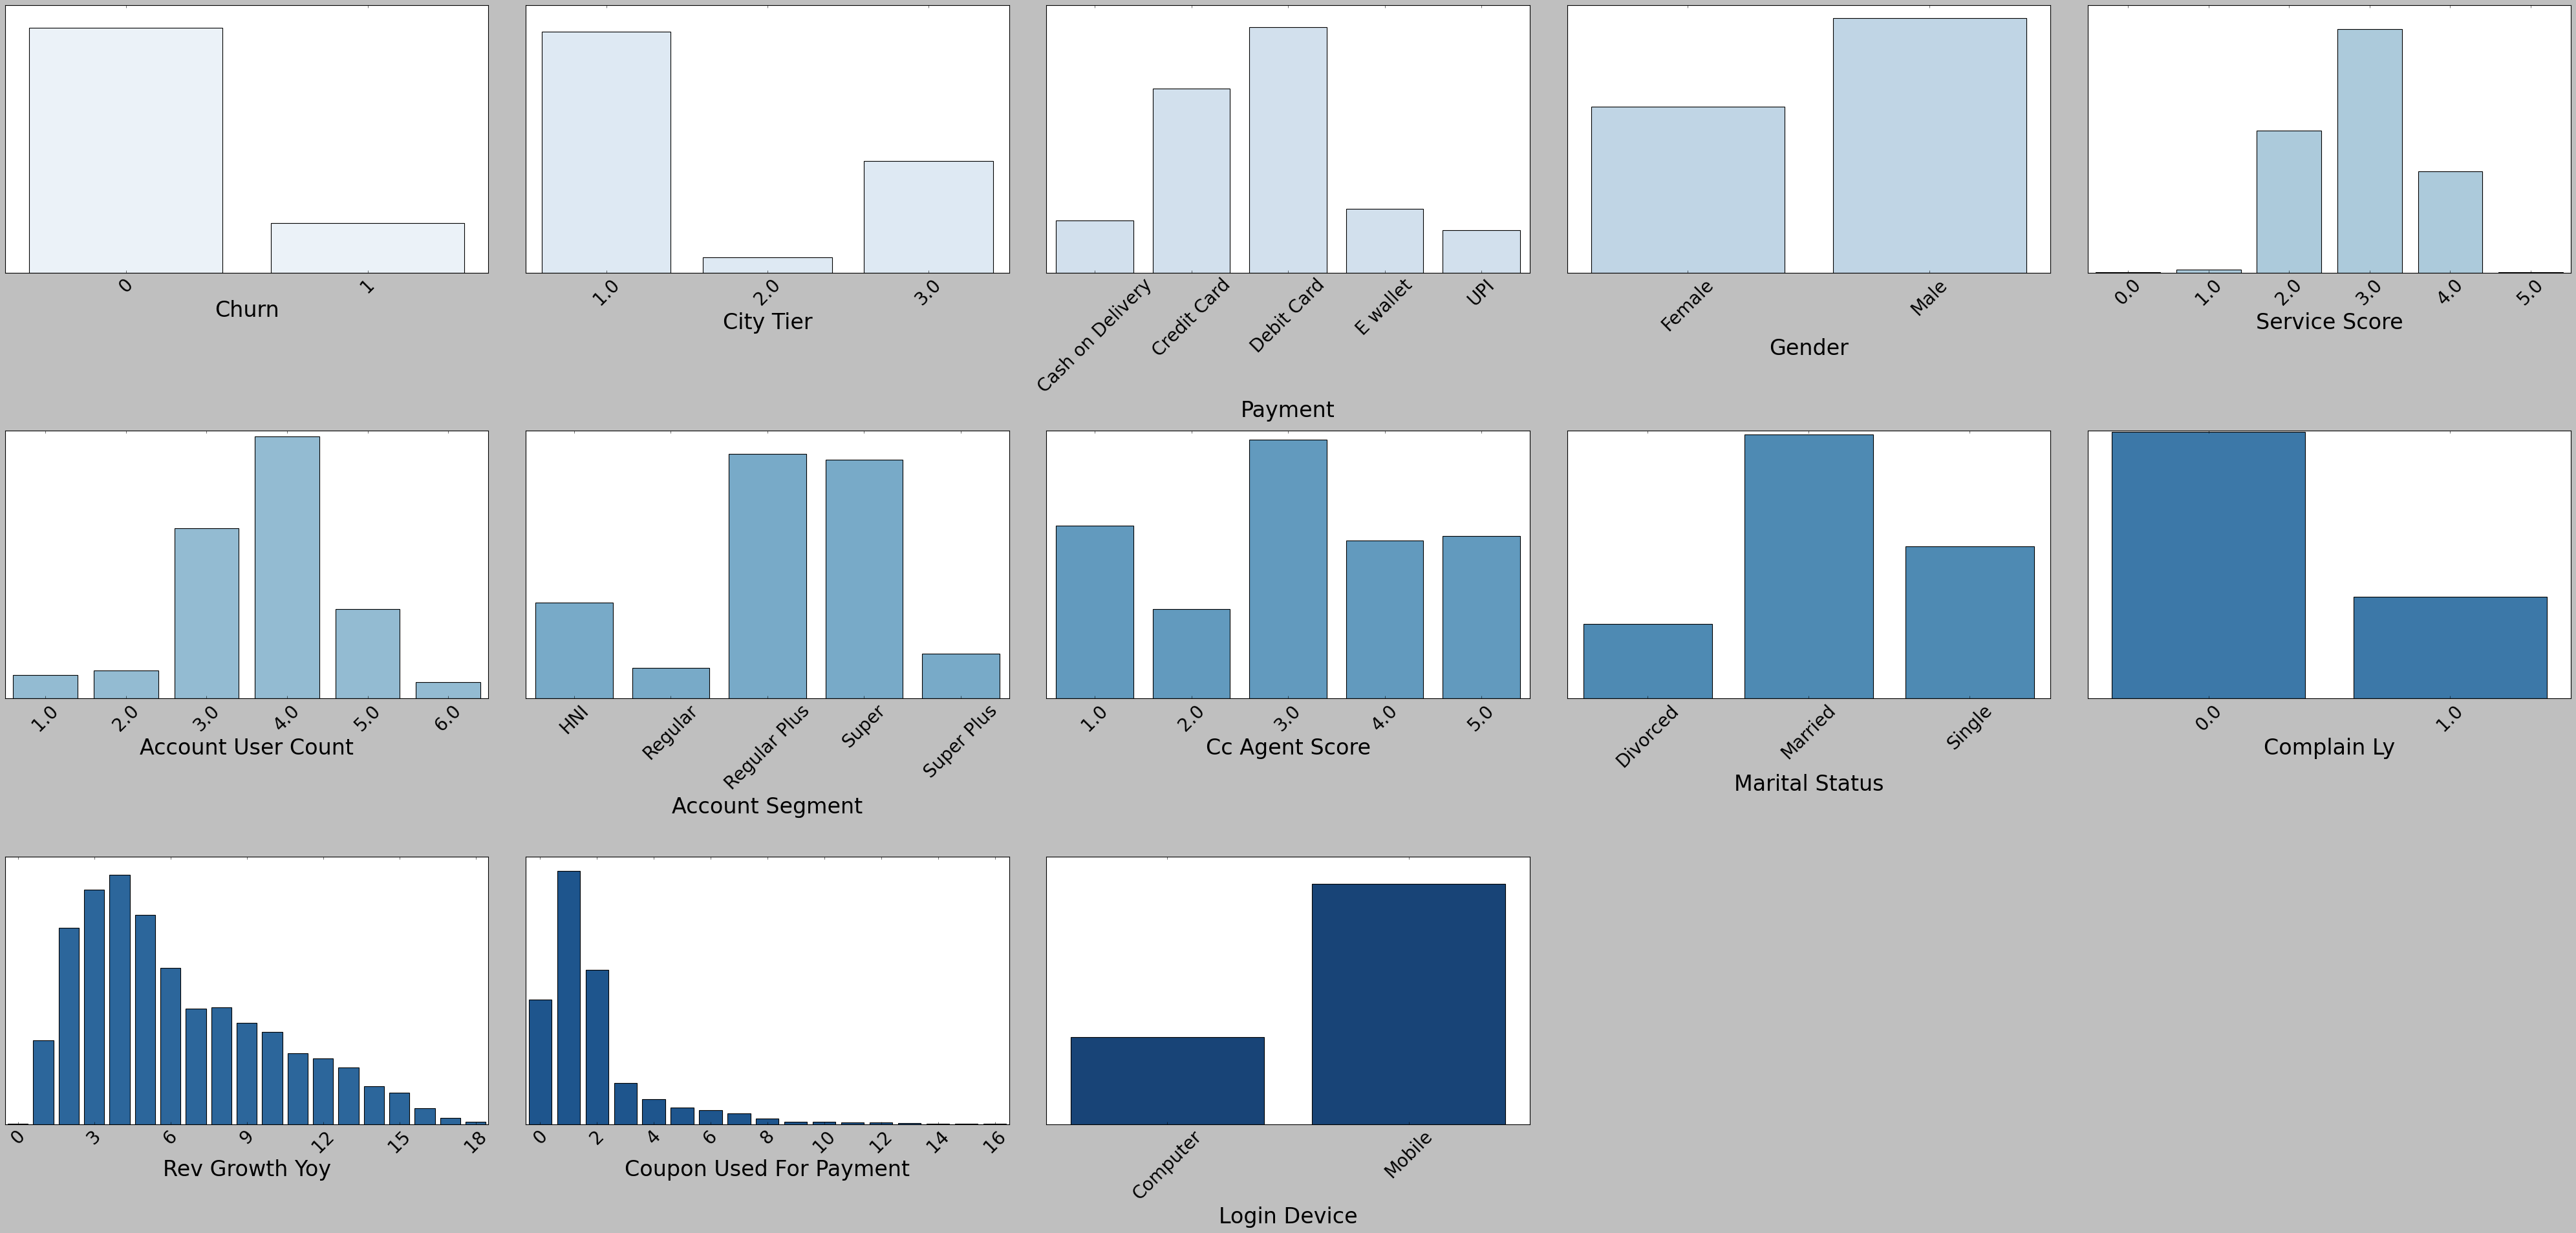

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Define categorical variables
categorical_vars = ['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score', 
                    'Account_user_count', 'account_segment', 'CC_Agent_Score', 
                    'Marital_Status', 'Complain_ly', 'rev_growth_yoy', 
                    'coupon_used_for_payment', 'Login_device']

# Calculate the number of rows and columns needed
num_plots = len(categorical_vars)
num_cols = min(num_plots, 5)
num_rows = (num_plots - 1) // num_cols + 1

# Create subplots with some space between them
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10 * num_cols, 8 * num_rows))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten the axes if there is only one row
axes = axes.flatten()

# Define shades of blue for each categorical variable
blue_palette = sns.color_palette("Blues", num_plots)

# Loop through each categorical variable and create count plots
for i, cat_var in enumerate(categorical_vars):
    if cat_var in ['rev_growth_yoy', 'coupon_used_for_payment']:
        sns.countplot(x=cat_var, data=df, ax=axes[i], palette=[blue_palette[i]])
        axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))  # Remove decimal places
    else:
        sns.countplot(x=cat_var, data=df, ax=axes[i], color=blue_palette[i])
    axes[i].set_xlabel(cat_var.replace('_', ' ').title(), fontsize=30)  # Replace underscore with space and capitalize
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=45, labelsize=25)  # Increase font size
    axes[i].tick_params(axis='y', labelsize=20)  # Increase font size
    
    # Set integer formatter for x-axis
    axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))

    # Hide y-axis
    axes[i].get_yaxis().set_visible(False)

# Remove title from each subplot
for ax in axes:
    ax.set_title('')

# Hide empty subplots
for j in range(num_plots, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [74]:
# Define categorical variables
categorical_vars = ['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score', 
                    'Account_user_count', 'account_segment', 'CC_Agent_Score', 
                    'Marital_Status', 'Complain_ly', 'rev_growth_yoy', 
                    'coupon_used_for_payment', 'Login_device']

# Loop through each categorical variable and print the count of each category in terms of percentages
for cat_var in categorical_vars:
    counts = df[cat_var].value_counts(normalize=True) * 100
    print(f'Percentage of categories in {cat_var}:')
    print(counts)
    print('-' * 50)


Percentage of categories in Churn:
0    83.165167
1    16.834833
Name: Churn, dtype: float64
--------------------------------------------------
Percentage of categories in City_Tier:
1.0    65.530406
3.0    30.324516
2.0     4.145078
Name: City_Tier, dtype: float64
--------------------------------------------------
Percentage of categories in Payment:
Debit Card          41.750750
Credit Card         31.278975
E wallet            10.862649
Cash on Delivery     8.881011
UPI                  7.226616
Name: Payment, dtype: float64
--------------------------------------------------
Percentage of categories in Gender:
Male      60.503591
Female    39.496409
Name: Gender, dtype: float64
--------------------------------------------------
Percentage of categories in Service_Score:
3.0    49.613671
2.0    28.933733
4.0    20.634488
1.0     0.699936
0.0     0.072721
5.0     0.045450
Name: Service_Score, dtype: float64
--------------------------------------------------
Percentage of categories in

In [75]:
import numpy as np

# Filter numeric columns
numeric_columns = df.select_dtypes(include=['int32', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Calculate p-values
p_values = df[numeric_columns].corr(method='pearson').apply(lambda x: np.round(x, 4))

# Create a DataFrame for correlation coefficients and p-values
correlation_summary = pd.DataFrame(index=correlation_matrix.index, columns=correlation_matrix.columns)
for i in correlation_matrix.index:
    for j in correlation_matrix.columns:
        corr_coef = correlation_matrix.loc[i, j]
        p_value = p_values.loc[i, j]
        correlation_summary.loc[i, j] = f"{corr_coef:.2f} ({p_value})"

# Print the correlation matrix with p-values
print("Correlation Matrix with p-values:")
print(correlation_summary)



Correlation Matrix with p-values:
                               Tenure  CC_Contacted_LY    rev_per_month  \
Tenure                     1.00 (1.0)  -0.00 (-0.0036)    0.03 (0.0285)   
CC_Contacted_LY       -0.00 (-0.0036)       1.00 (1.0)    0.01 (0.0143)   
rev_per_month           0.03 (0.0285)    0.01 (0.0143)       1.00 (1.0)   
Day_Since_CC_connect     0.12 (0.121)    0.01 (0.0145)  -0.00 (-0.0007)   
cashback                0.08 (0.0781)    0.00 (0.0019)    0.00 (0.0049)   

                     Day_Since_CC_connect       cashback  
Tenure                       0.12 (0.121)  0.08 (0.0781)  
CC_Contacted_LY             0.01 (0.0145)  0.00 (0.0019)  
rev_per_month             -0.00 (-0.0007)  0.00 (0.0049)  
Day_Since_CC_connect           1.00 (1.0)  0.08 (0.0849)  
cashback                    0.08 (0.0849)     1.00 (1.0)  


In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to hold VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_columns
vif_data["VIF"] = [variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(numeric_columns))]

# Print the VIF values
print("Variance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
                Feature       VIF
0                Tenure  1.660203
1       CC_Contacted_LY  2.619738
2         rev_per_month  1.246215
3  Day_Since_CC_connect  2.277081
4              cashback  1.997100


There is no significant multicollinearity issue among the numeric variables in your dataset

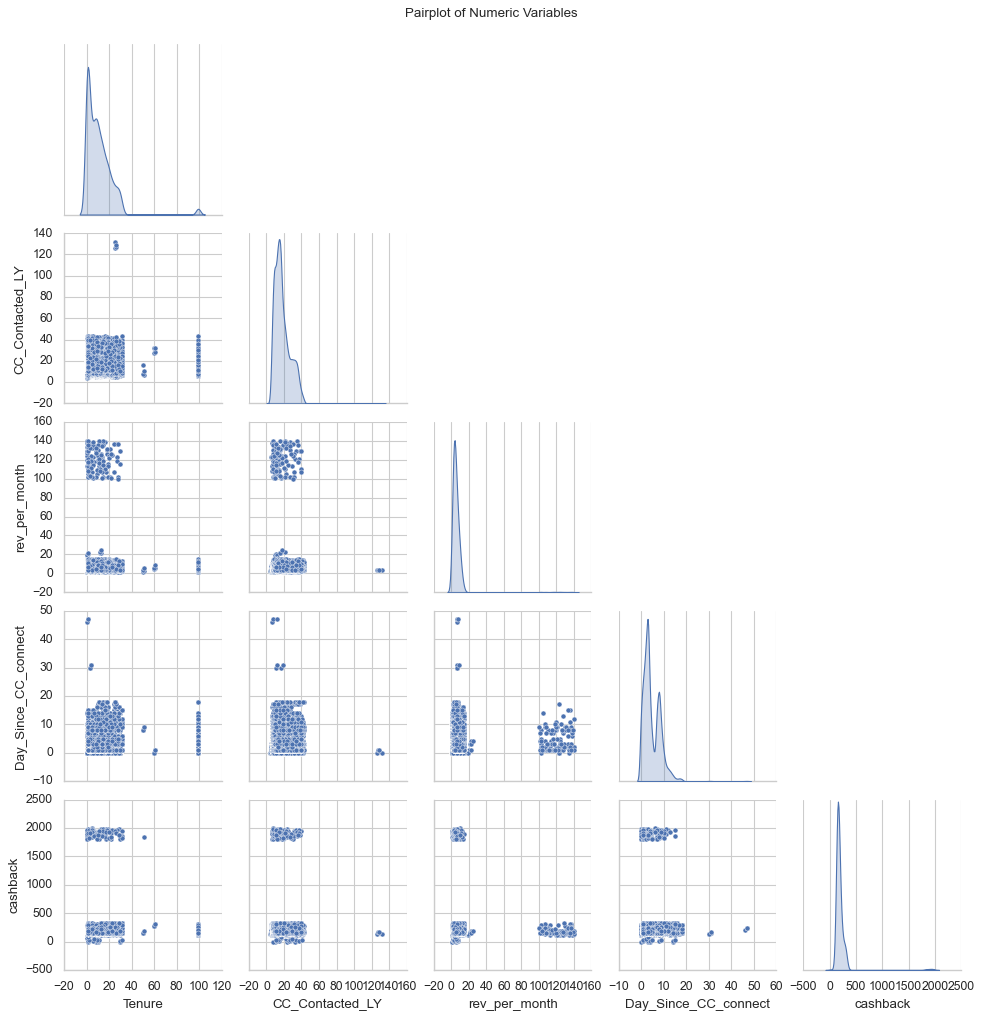

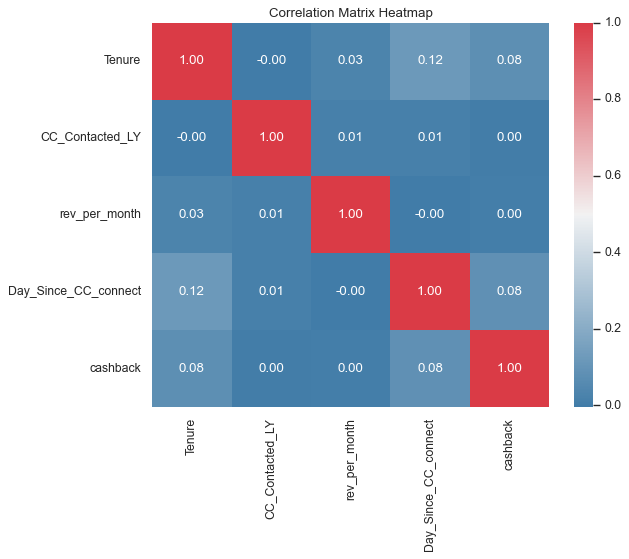

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric variables to include in the pairplot
numeric_variables = ['Tenure', 'CC_Contacted_LY', 'Account_user_count', 'rev_per_month',
                     'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
                     'cashback']

# Add the target variable to the numeric variables if needed
# numeric_variables.append('Churn')

# Create pairplot
pairplot = sns.pairplot(df[numeric_variables], diag_kind='kde', corner=True)

# Add title to the pairplot
pairplot.fig.suptitle('Pairplot of Numeric Variables', y=1.02)

# Calculate correlation matrix
correlation_matrix = df[numeric_variables].corr()

# Customize the colormap for the heatmap
custom_cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plot the correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [78]:
from scipy.stats import f_oneway

# Define the list of categorical variables
categorical_variables = [ "City_Tier", "Payment", "Gender", "Service_Score", "Account_user_count", "account_segment", "CC_Agent_Score", "Marital_Status", "Complain_ly", "rev_growth_yoy", "coupon_used_for_payment", "Login_device"]

# Perform ANOVA for each categorical variable
for cat_var in categorical_variables:
    # Group data by categories of the current categorical variable
    groups = [df[df[cat_var] == category]['Churn'] for category in df[cat_var].unique()]
    
    # Perform ANOVA
    f_statistic, p_value = f_oneway(*groups)
    
    # Print the results
    print(f'ANOVA for {cat_var}: F-statistic = {f_statistic}, p-value = {p_value}')


ANOVA for City_Tier: F-statistic = 40.04122862029208, p-value = 4.71326216199383e-18
ANOVA for Payment: F-statistic = 25.804145761631247, p-value = 2.561047229313783e-21
ANOVA for Gender: F-statistic = 9.616707486326494, p-value = 0.0019330273977704183
ANOVA for Service_Score: F-statistic = 3.6931471057417413, p-value = 0.0024293547985143877
ANOVA for Account_user_count: F-statistic = 31.623427836923803, p-value = 4.2873045668461357e-32
ANOVA for account_segment: F-statistic = 140.87423550033557, p-value = 1.2591146583047952e-117
ANOVA for CC_Agent_Score: F-statistic = 34.82202929761376, p-value = 6.132246582348905e-29
ANOVA for Marital_Status: F-statistic = 194.19326907784512, p-value = 1.3119905424402945e-83
ANOVA for Complain_ly: F-statistic = 698.4323816509356, p-value = 2.8223346788286783e-149
ANOVA for rev_growth_yoy: F-statistic = 2.912577842235759, p-value = 3.3174669046267116e-05
ANOVA for coupon_used_for_payment: F-statistic = 1.5874845381085216, p-value = 0.06329374402576544

In [79]:
# Select categorical variables
categorical_variables = predictors.select_dtypes(include=['object', 'category'])

# Display the names of the categorical variables
print("Categorical Variables:")
print(categorical_variables.columns)

# Select numeric variables
numeric_variables = predictors.select_dtypes(include=['int', 'float'])

# Display the names of the numeric variables
print("Numeric Variables:")
print(numeric_variables.columns)

Categorical Variables:
Index(['City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Login_device'],
      dtype='object')
Numeric Variables:
Index(['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'Day_Since_CC_connect',
       'cashback'],
      dtype='object')


## Multivariate Analysis

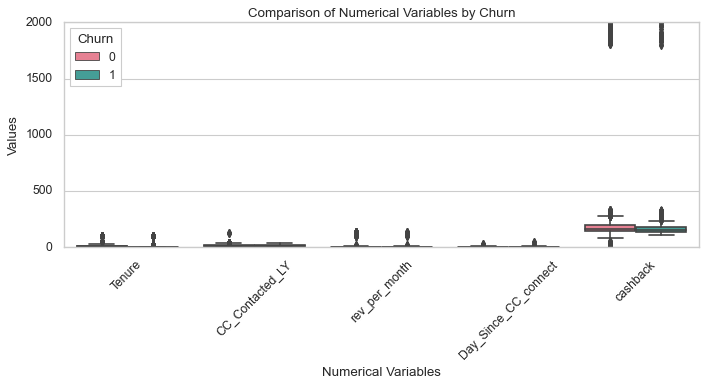

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to long format
melted_df = df.melt(id_vars=['Churn'], value_vars=['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'Day_Since_CC_connect', 'cashback'])

# Plot a single boxplot with all numerical variables and 'Churn' as hue
plt.figure(figsize=(9, 5))
sns.boxplot(x='variable', y='value', hue='Churn', data=melted_df, palette='husl')
plt.title('Comparison of Numerical Variables by Churn')
plt.xlabel('Numerical Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


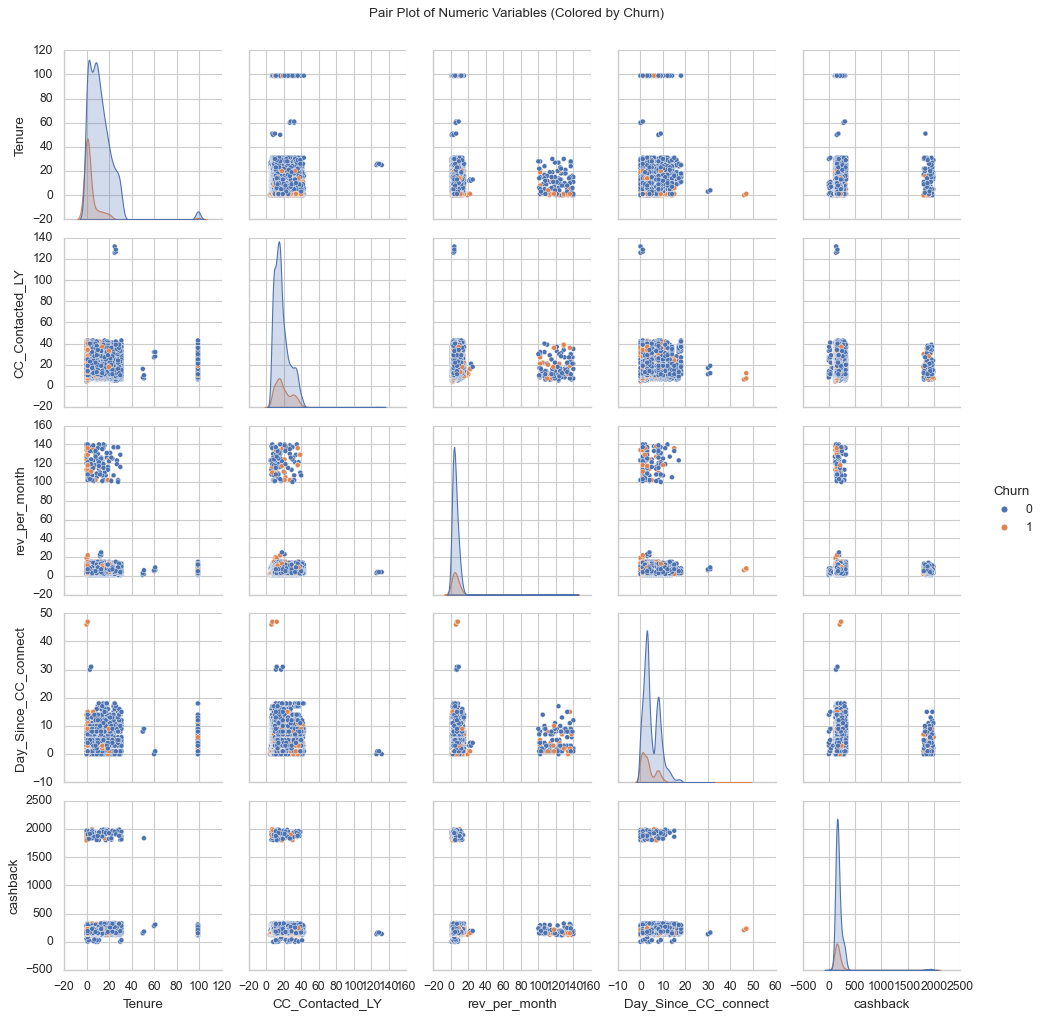

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair Plot
sns.pairplot(df[['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'Day_Since_CC_connect', 'cashback', 'Churn']], hue='Churn')
plt.suptitle('Pair Plot of Numeric Variables (Colored by Churn)', y=1.02)
plt.show()



## K Means Clustering

In [77]:
import pandas as pd
import numpy as np

def identify_numeric_columns(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    return numeric_columns

def identify_outliers(df):
    outliers_count = []
    numeric_columns = identify_numeric_columns(df)
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_count.append(len(column_outliers))
    return outliers_count

# Assuming 'df' is your DataFrame
outliers_count = identify_outliers(df)

# Printing number of outliers for each column
numeric_columns = identify_numeric_columns(df)
for i, column_name in enumerate(numeric_columns):
    print(f"Column '{column_name}': {outliers_count[i]} outliers")


Column 'Tenure': 139 outliers
Column 'CC_Contacted_LY': 42 outliers
Column 'rev_per_month': 185 outliers
Column 'Day_Since_CC_connect': 128 outliers
Column 'cashback': 945 outliers


In [78]:
# List of numerical column names
numerical_columns = ['Tenure', 'CC_Contacted_LY',  'rev_per_month',
                     'Day_Since_CC_connect',
                     'cashback']

# Function to treat outliers using IQR
def treat_outliers_with_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with upper/lower bounds
    data[column_name] = np.where(data[column_name] < lower_bound, lower_bound,
                                 np.where(data[column_name] > upper_bound, upper_bound, data[column_name]))

# Iterate through each numerical column
for column in numerical_columns:
    # Treat outliers for each column
    treat_outliers_with_iqr(df, column)

# Count the number of outliers and print the column name and the count of outliers
for column in numerical_columns:
    # Calculate the number of outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    # Print the column name and the count of outliers
    print(f"Column: {column}, Number of outliers: {outliers}")


Column: Tenure, Number of outliers: 0
Column: CC_Contacted_LY, Number of outliers: 0
Column: rev_per_month, Number of outliers: 0
Column: Day_Since_CC_connect, Number of outliers: 0
Column: cashback, Number of outliers: 0


In [79]:
# Create a copy of the DataFrame
df_encoded = df.copy()

In [80]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11001 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Churn                    11001 non-null  category
 1   Tenure                   11001 non-null  float64 
 2   City_Tier                11001 non-null  category
 3   CC_Contacted_LY          11001 non-null  float64 
 4   Payment                  11001 non-null  category
 5   Gender                   11001 non-null  category
 6   Service_Score            11001 non-null  category
 7   Account_user_count       11001 non-null  category
 8   account_segment          11001 non-null  category
 9   CC_Agent_Score           11001 non-null  category
 10  Marital_Status           11001 non-null  category
 11  rev_per_month            11001 non-null  float64 
 12  Complain_ly              11001 non-null  category
 13  rev_growth_yoy           11001 non-null  category
 14  coupon

In [81]:
from sklearn.preprocessing import LabelEncoder

# Remove these lines
label_encoder = LabelEncoder()
df_encoded['Payment'] = label_encoder.fit_transform(df_encoded['Payment'])
df_encoded['Gender'] = label_encoder.fit_transform(df_encoded['Gender'])
df_encoded['account_segment'] = label_encoder.fit_transform(df_encoded['account_segment'])
df_encoded['Marital_Status'] = label_encoder.fit_transform(df_encoded['Marital_Status'])
df_encoded['Login_device'] = label_encoder.fit_transform(df_encoded['Login_device'])


In [82]:
df_encoded.head()

Churn  Tenure City_Tier  CC_Contacted_LY  Payment  Gender Service_Score  \
0     1     4.0       3.0              6.0        2       0           3.0   
1     1     0.0       1.0              8.0        4       1           3.0   
2     1     0.0       1.0             30.0        2       1           2.0   
3     1     0.0       3.0             15.0        2       1           2.0   
4     1     0.0       1.0             12.0        1       1           2.0   

  Account_user_count  account_segment CC_Agent_Score  Marital_Status  \
0                3.0                3            2.0               2   
1                4.0                2            3.0               2   
2                4.0                2            3.0               2   
3                4.0                3            5.0               2   
4                3.0                2            5.0               2   

   rev_per_month Complain_ly rev_growth_yoy coupon_used_for_payment  \
0            9.0         1.0           11.0                       1   
1            7.0         1.0           15.0                       0   
2            6.0         1.0           14.0                       0   
3            8.0         0.0           23.0                       0   
4            3.0         0.0           11.0                       1   

   Day_Since_CC_connect  cashback  Login_device  
0                   5.0    159.93             1  
1                   0.0    120.90             1  
2                   3.0    155.62             1  
3                   3.0    134.07             1  
4                   3.0    129.60             1

In [83]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11001 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Churn                    11001 non-null  category
 1   Tenure                   11001 non-null  float64 
 2   City_Tier                11001 non-null  category
 3   CC_Contacted_LY          11001 non-null  float64 
 4   Payment                  11001 non-null  int32   
 5   Gender                   11001 non-null  int32   
 6   Service_Score            11001 non-null  category
 7   Account_user_count       11001 non-null  category
 8   account_segment          11001 non-null  int32   
 9   CC_Agent_Score           11001 non-null  category
 10  Marital_Status           11001 non-null  int32   
 11  rev_per_month            11001 non-null  float64 
 12  Complain_ly              11001 non-null  category
 13  rev_growth_yoy           11001 non-null  category
 14  coupon

In [84]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [85]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [86]:
scaled_df = X.fit_transform(df_encoded)

In [87]:
scaled_df

array([[ 2.22262565, -0.67938487,  1.47997864, ...,  0.1264798 ,
        -0.39301985,  0.6029386 ],
       [ 2.22262565, -1.12372505, -0.70924349, ..., -1.30530068,
        -1.27791578,  0.6029386 ],
       [ 2.22262565, -1.12372505, -0.70924349, ..., -0.44623239,
        -0.49073703,  0.6029386 ],
       ...,
       [-0.44991832, -1.01264   , -0.70924349, ..., -0.1598763 ,
         0.3209277 ,  0.6029386 ],
       [-0.44991832,  1.43123099,  1.47997864, ...,  1.27190418,
         0.05974396, -1.65854368],
       [-0.44991832, -0.23504469, -0.70924349, ..., -0.44623239,
        -0.05044292,  0.6029386 ]])

In [88]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(scaled_df)
    sse[k] = kmeans.inertia_


In [89]:
sse

{1: 198018.00000000003,
 2: 182935.41485329426,
 3: 171517.83711091854,
 4: 164043.57411841152,
 5: 158764.63592788062,
 6: 154149.04918705934,
 7: 150036.60414594345,
 8: 146660.6790368742,
 9: 144388.074159859}

<function matplotlib.pyplot.show(close=None, block=None)>

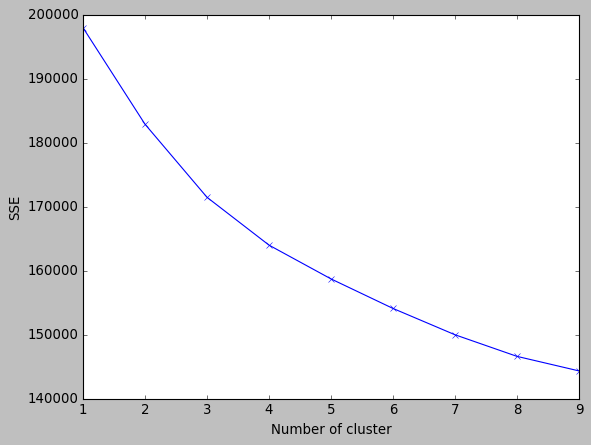

In [90]:
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()),"bx-")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show

In [91]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [92]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sc = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(scaled_df)
    labels = kmeans.labels_
    sc[k] = silhouette_score(scaled_df, labels)

# Print silhouette scores for different values of k
for k, silhouette in sc.items():
    print(f"Silhouette score for {k} clusters: {silhouette}")


Silhouette score for 2 clusters: 0.08504996203107092
Silhouette score for 3 clusters: 0.0887258370590102
Silhouette score for 4 clusters: 0.07714962748132882
Silhouette score for 5 clusters: 0.06884695106801517
Silhouette score for 6 clusters: 0.06627897571751788
Silhouette score for 7 clusters: 0.06393518499281714
Silhouette score for 8 clusters: 0.058354467954780505
Silhouette score for 9 clusters: 0.052131819448740215


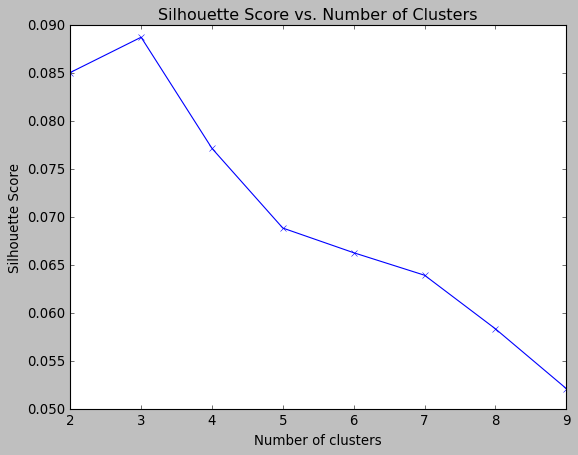

In [99]:
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


In [100]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [101]:
df["Clus_kmeans"] = labels
df.head(5)

Churn  Tenure City_Tier  CC_Contacted_LY      Payment  Gender Service_Score  \
0     1     4.0       3.0              6.0   Debit Card  Female           3.0   
1     1     0.0       1.0              8.0          UPI    Male           3.0   
2     1     0.0       1.0             30.0   Debit Card    Male           2.0   
3     1     0.0       3.0             15.0   Debit Card    Male           2.0   
4     1     0.0       1.0             12.0  Credit Card    Male           2.0   

  Account_user_count account_segment CC_Agent_Score Marital_Status  \
0                3.0           Super            2.0         Single   
1                4.0    Regular Plus            3.0         Single   
2                4.0    Regular Plus            3.0         Single   
3                4.0           Super            5.0         Single   
4                3.0    Regular Plus            5.0         Single   

   rev_per_month Complain_ly rev_growth_yoy coupon_used_for_payment  \
0            9.0         1.0           11.0                       1   
1            7.0         1.0           15.0                       0   
2            6.0         1.0           14.0                       0   
3            8.0         0.0           23.0                       0   
4            3.0         0.0           11.0                       1   

   Day_Since_CC_connect  cashback Login_device  Clus_kmeans  
0                   5.0    159.93       Mobile            1  
1                   0.0    120.90       Mobile            1  
2                   3.0    155.62       Mobile            1  
3                   3.0    134.07       Mobile            1  
4                   3.0    129.60       Mobile            1

In [102]:
df["Clus_kmeans"].value_counts()

0    5601
2    3641
1    1759
Name: Clus_kmeans, dtype: int64

In [103]:
mean = df.groupby('Clus_kmeans').mean()
median = df.groupby('Clus_kmeans').median()

# Concatenate mean and median vertically
df_kmeans = pd.concat([mean, median], axis=0)

# Rename the index
df_kmeans.index = ['Cluster 0 Mean', 'Cluster 1 Mean', 'Cluster 2 Mean', 'Cluster 0 Median', 'Cluster 1 Median', 'Cluster 2 Median']

# Transpose the DataFrame for better visualization
df_kmeans = df_kmeans.T

# Display the DataFrame
print(df_kmeans)

                      Cluster 0 Mean  Cluster 1 Mean  Cluster 2 Mean  \
Tenure                      8.102303        2.793633       16.750893   
CC_Contacted_LY            16.956972       19.397953       18.437243   
rev_per_month               4.456169        5.355316        6.042571   
Day_Since_CC_connect        3.580611        3.094088        6.769706   
cashback                  156.430786      158.996345      218.139945   

                      Cluster 0 Median  Cluster 1 Median  Cluster 2 Median  
Tenure                            7.00              1.00             16.00  
CC_Contacted_LY                  15.00             17.00             16.00  
rev_per_month                     4.00              5.00              5.00  
Day_Since_CC_connect              3.00              2.00              8.00  
cashback                        154.65            152.83            214.28  


In [104]:
# Compute mode for each category within each cluster
mode_per_cluster = df.groupby('Clus_kmeans').agg(lambda x: x.value_counts().index[0])

# Display the mode values for categorical variables
print(mode_per_cluster)

             Churn  Tenure  City_Tier  CC_Contacted_LY     Payment Gender  \
Clus_kmeans                                                                 
0                0     1.0        1.0             16.0  Debit Card   Male   
1                1     1.0        1.0             16.0  Debit Card   Male   
2                0    19.0        1.0              9.0  Debit Card   Male   

             Service_Score  Account_user_count account_segment  \
Clus_kmeans                                                      
0                      3.0                 4.0    Regular Plus   
1                      3.0                 4.0    Regular Plus   
2                      3.0                 4.0           Super   

             CC_Agent_Score Marital_Status  rev_per_month  Complain_ly  \
Clus_kmeans                                                              
0                       3.0        Married            3.0          0.0   
1                       3.0         Single            3.0    

## Univariate Analysis: Visualizing Numeric Variables by Cluster

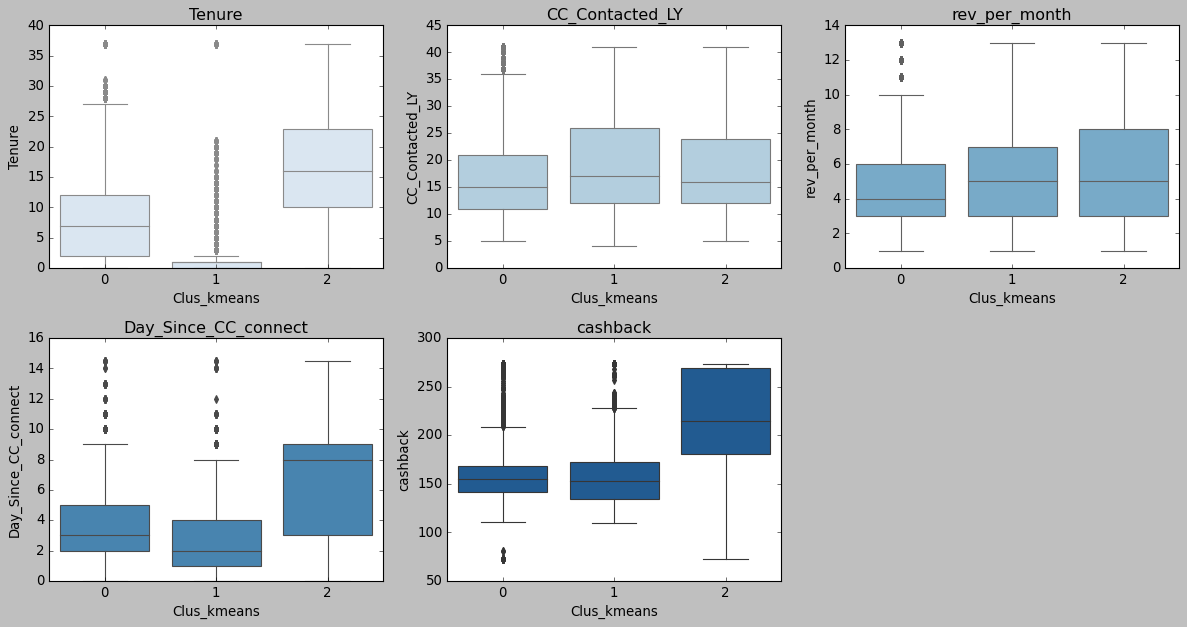

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of columns to visualize
cols_visualise = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'Day_Since_CC_connect', 'cashback']

# Define the number of rows and columns for subplots
n_rows = 2  # Number of rows
n_cols = 3  # Number of columns

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Define shades of blue
blue_palette = sns.color_palette("Blues", n_colors=len(cols_visualise))

# Iterate over each column and plot
for i, col in enumerate(cols_visualise):
    sns.boxplot(x='Clus_kmeans', y=col, data=df, ax=axes[i], palette=[blue_palette[i]])
    axes[i].set_title(col)  # Set title for each subplot

# Hide empty subplots if the number of columns is not a multiple of 3
for j in range(n_cols * n_rows - len(cols_visualise)):
    fig.delaxes(axes.flatten()[len(cols_visualise) + j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


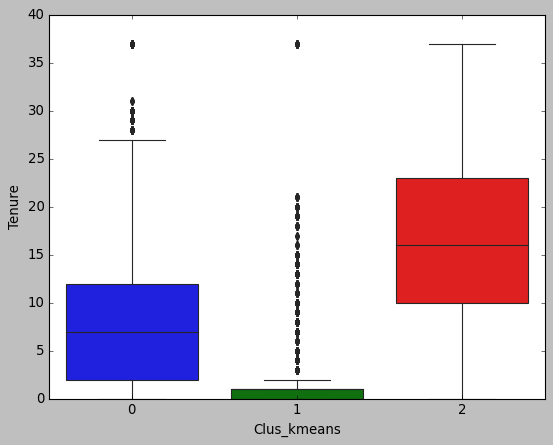

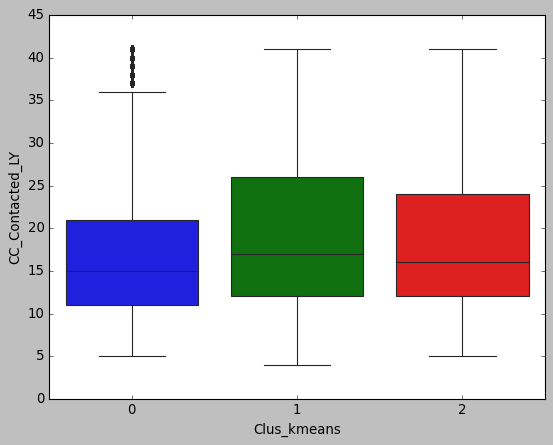

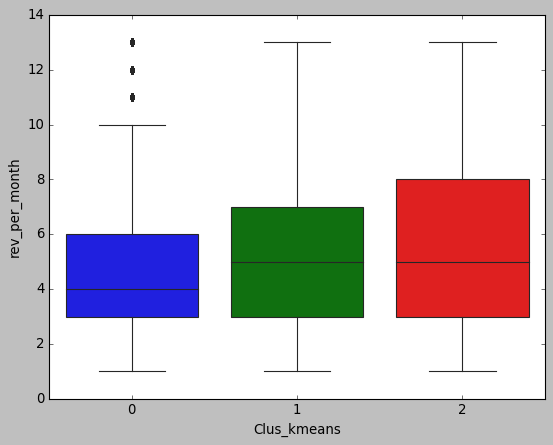

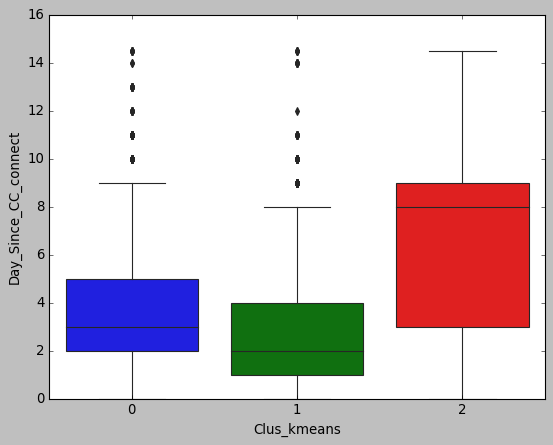

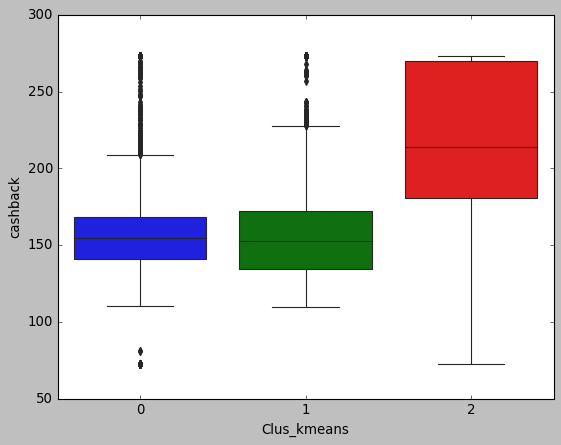

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_visualise = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'Day_Since_CC_connect', 'cashback']

for col in cols_visualise:
    sns.boxplot(x='Clus_kmeans', y=col, data=df)
    plt.show()


## Univariate Analysis: Categorical Variables by Cluster

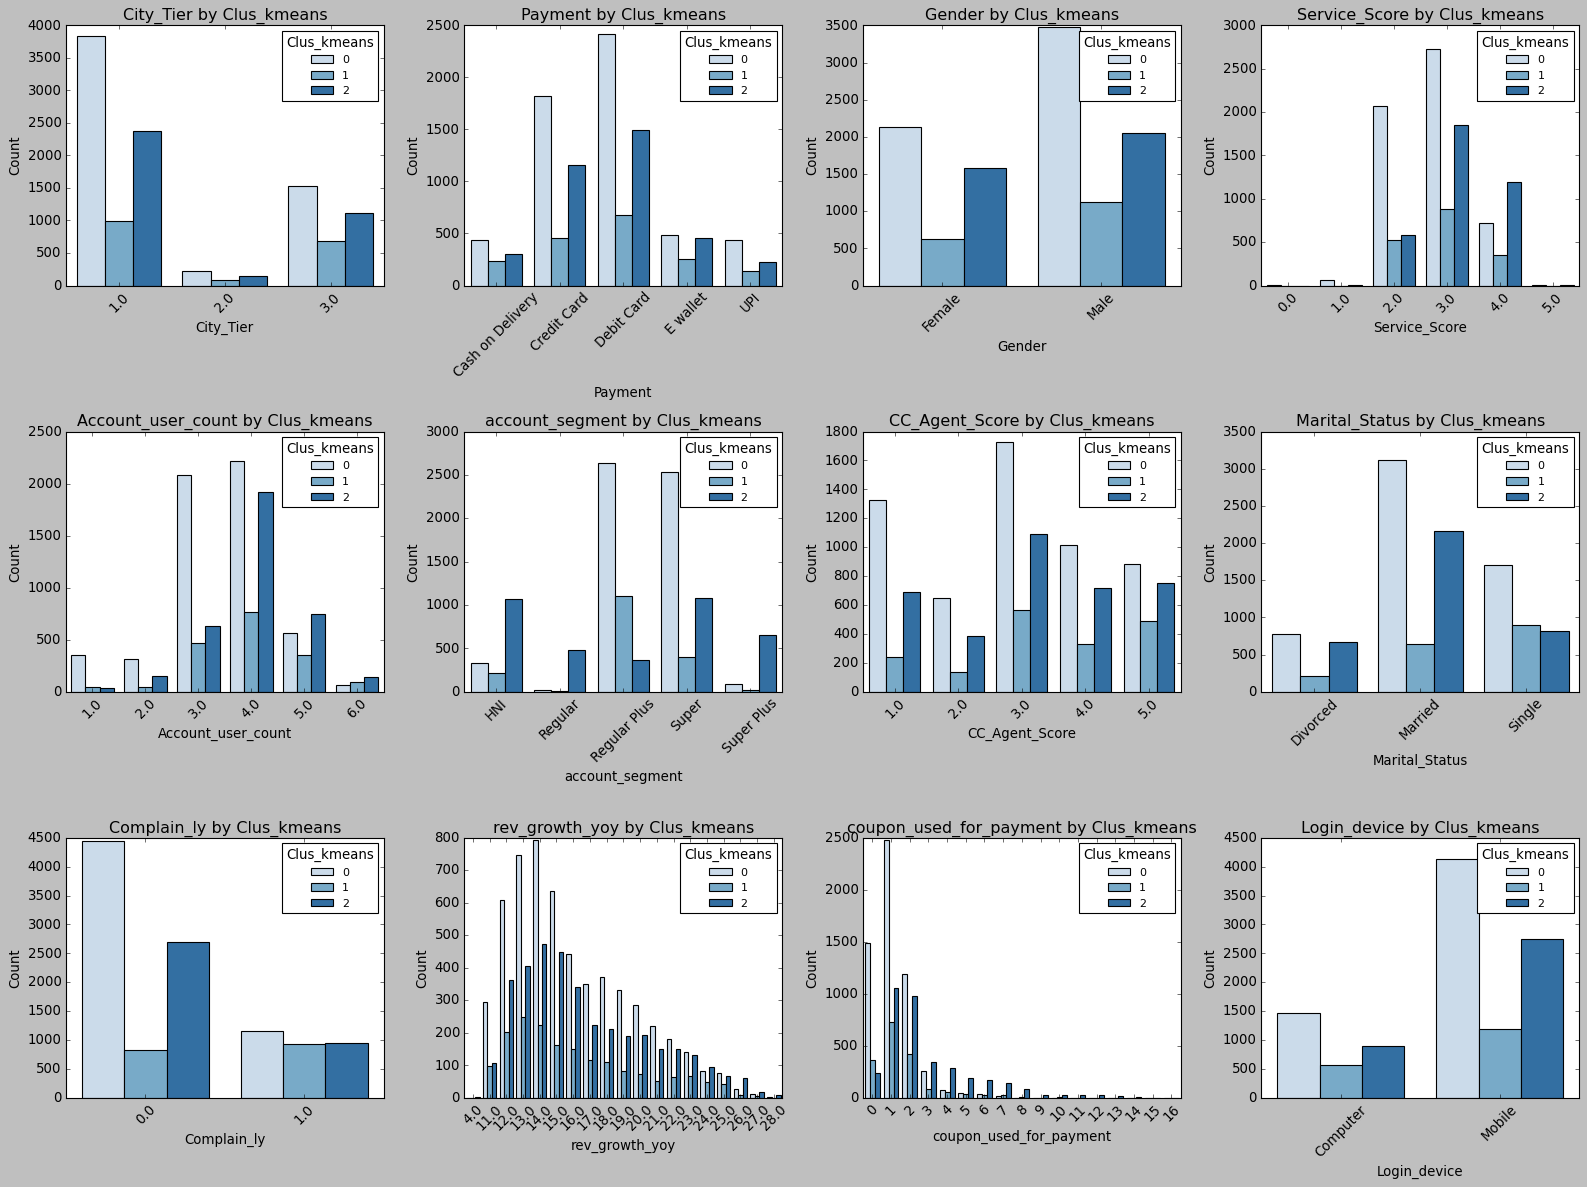

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette with shades of blue
custom_palette = sns.color_palette("Blues", num_clusters)

# Categorical variables to visualize
cat_cols = ['City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count', 
            'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 
            'rev_growth_yoy', 'coupon_used_for_payment', 'Login_device']

# Calculate the number of rows and columns for subplots
num_clusters = len(df['Clus_kmeans'].unique())
num_plots = len(cat_cols)

# Calculate the number of rows and columns for subplots
num_cols = 4  # Maximum of 4 columns for visualization
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate through each categorical column
for i, col in enumerate(cat_cols):  
    sns.countplot(x=col, hue='Clus_kmeans', data=df, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f'{col} by Clus_kmeans')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Clus_kmeans', fontsize='small')

# Hide empty subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


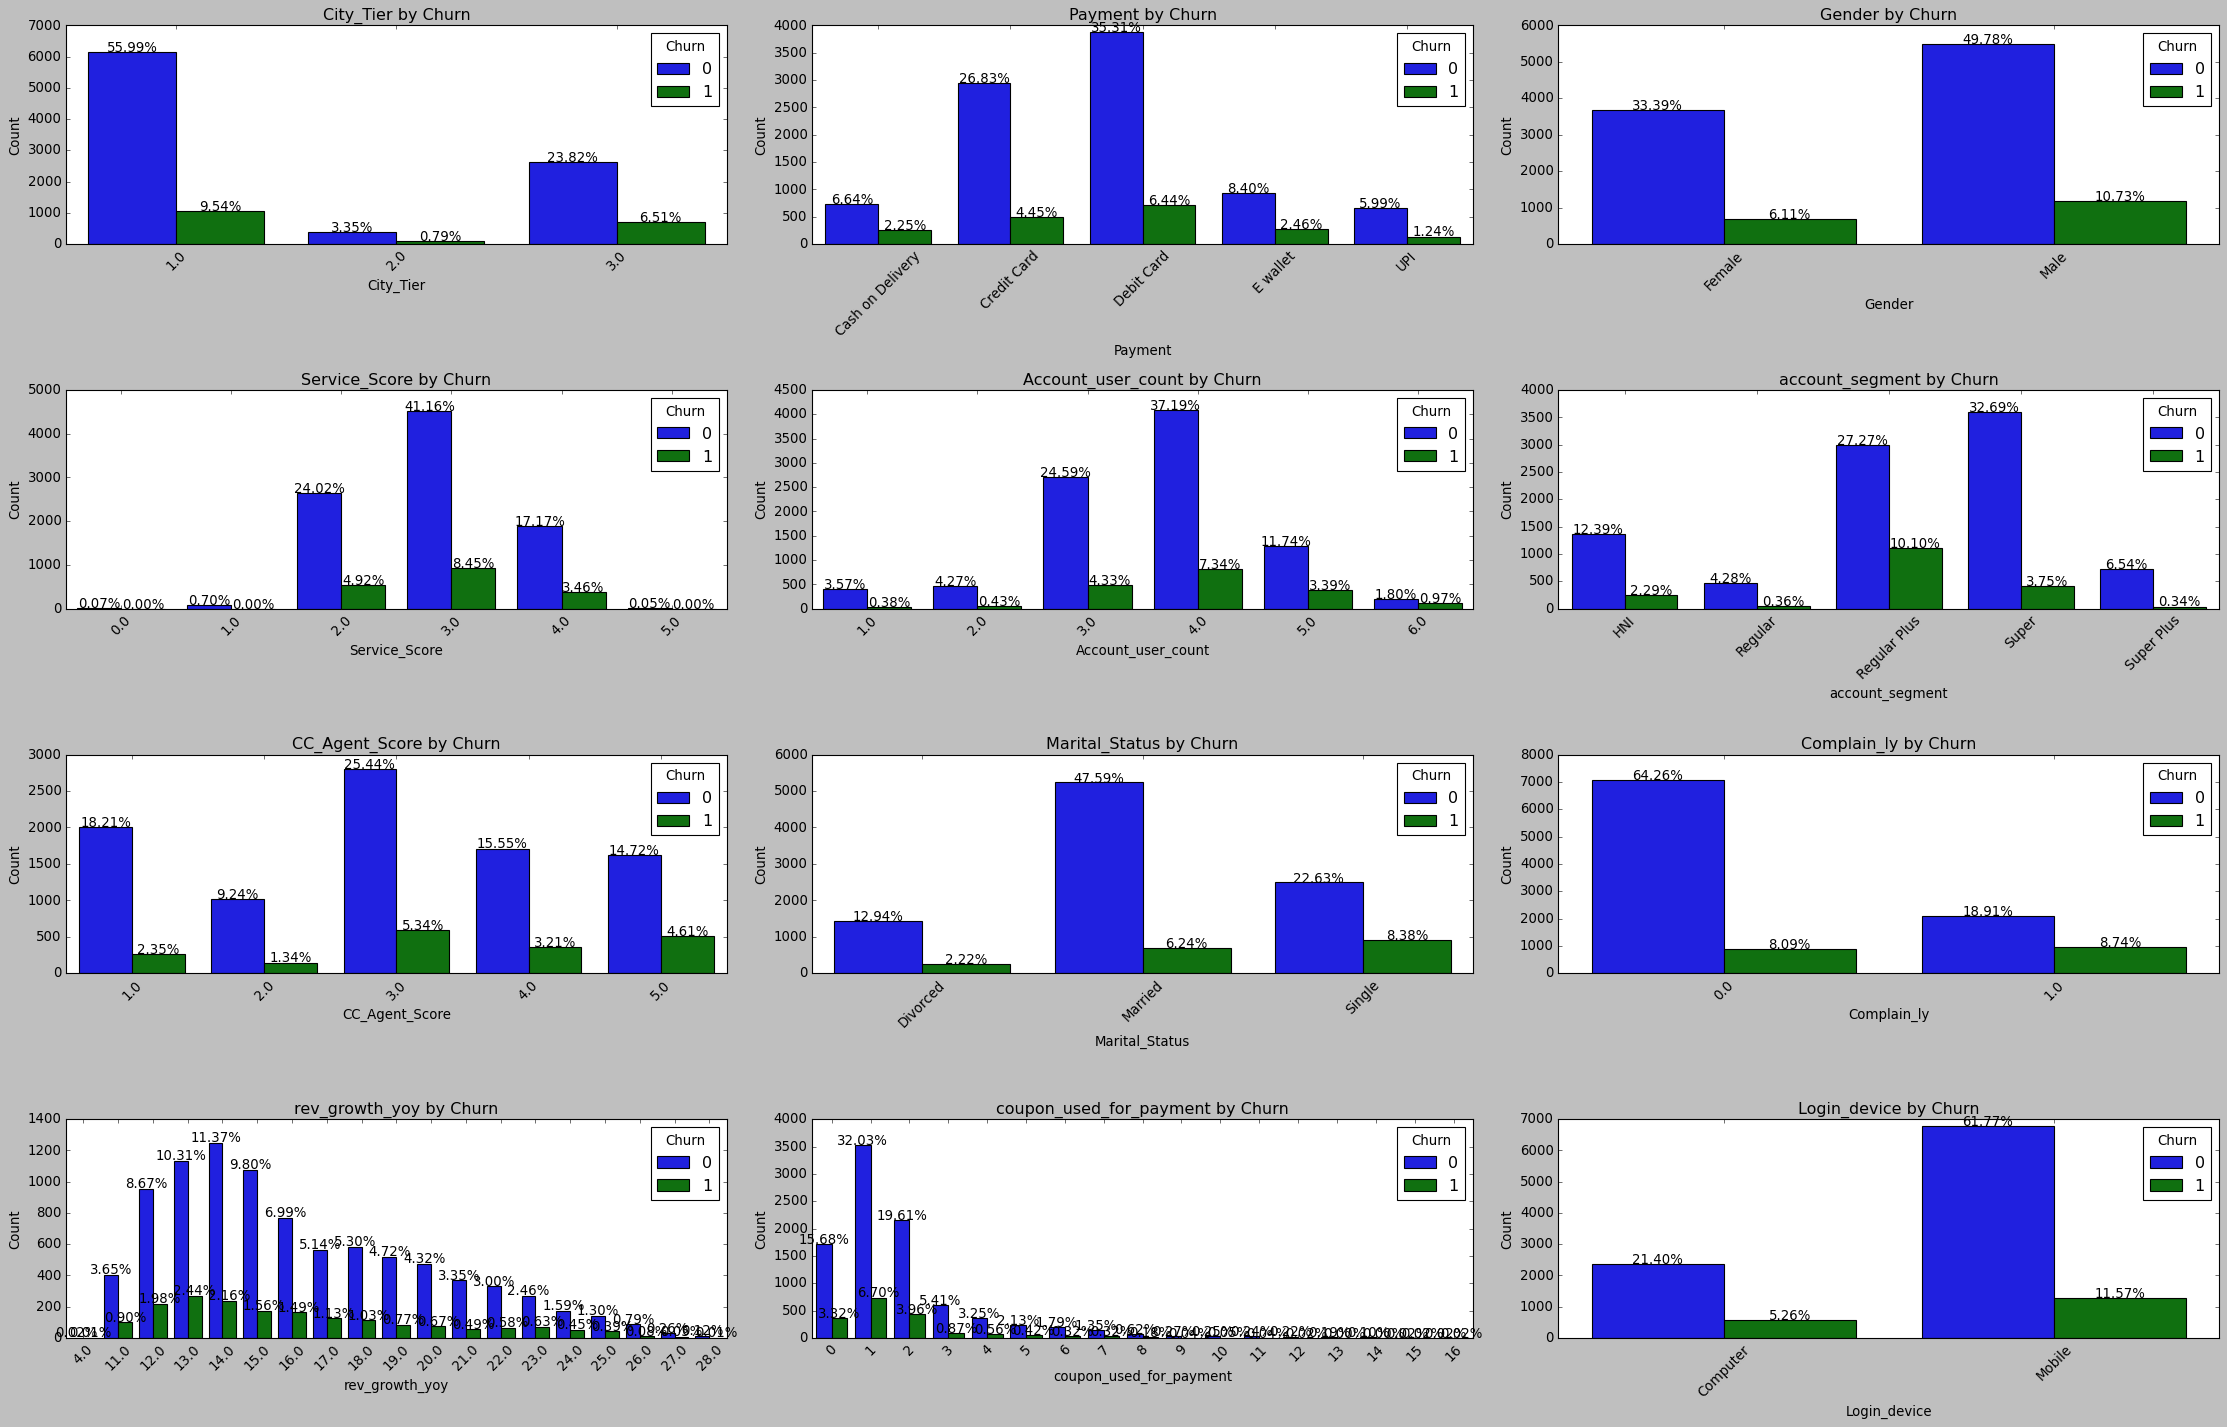

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical variables to visualize
cat_cols = ['City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count', 
            'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 
            'rev_growth_yoy', 'coupon_used_for_payment', 'Login_device']

# Calculate the number of rows and columns for subplots
num_rows = 4
num_cols = 3
num_plots = num_rows * num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(28, 18))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate through each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Churn')

    # Add percentage on top of each bar
    total = float(len(df))
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2., height + 5, '{:.2f}%'.format((height / total) * 100), ha="center")

# Hide empty subplots
for j in range(i+1, num_plots):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


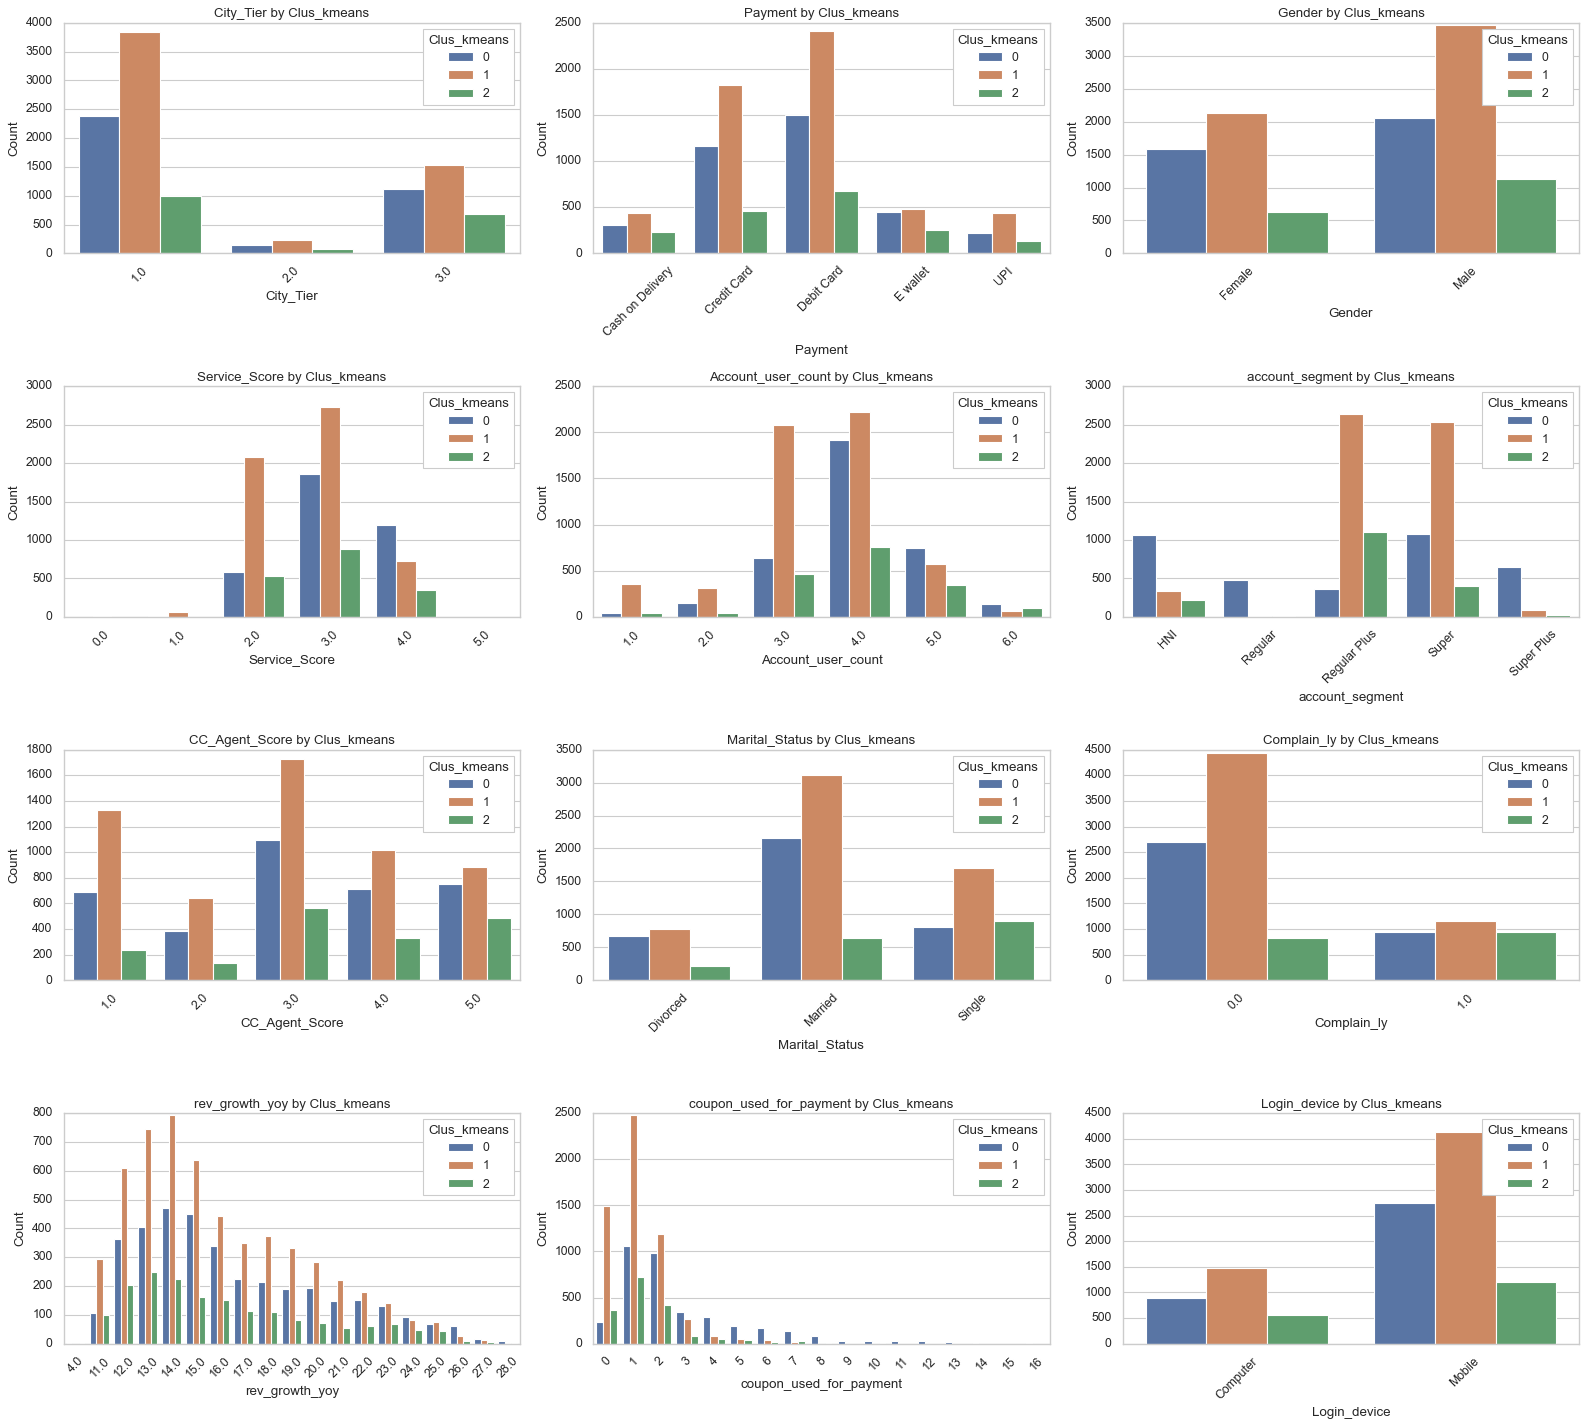

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical variables to visualize
cat_cols = ['City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count', 
            'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 
            'rev_growth_yoy', 'coupon_used_for_payment', 'Login_device']

# Calculate the number of rows and columns for subplots
num_rows = 4
num_cols = 3
num_plots = num_rows * num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 18))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate through each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='Clus_kmeans', data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Clus_kmeans')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Clus_kmeans')

# Hide empty subplots
for j in range(i+1, num_plots):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


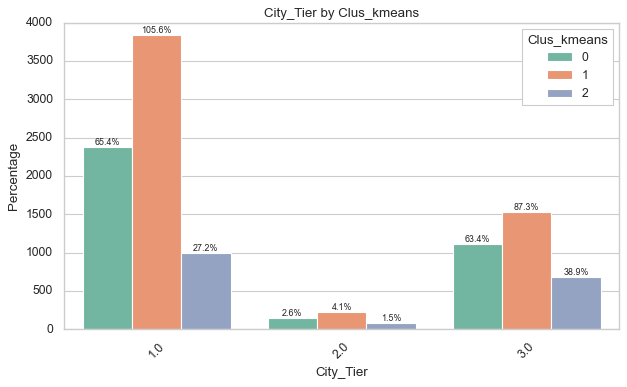

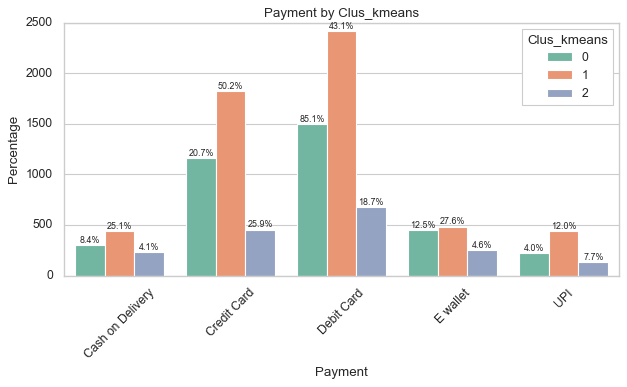

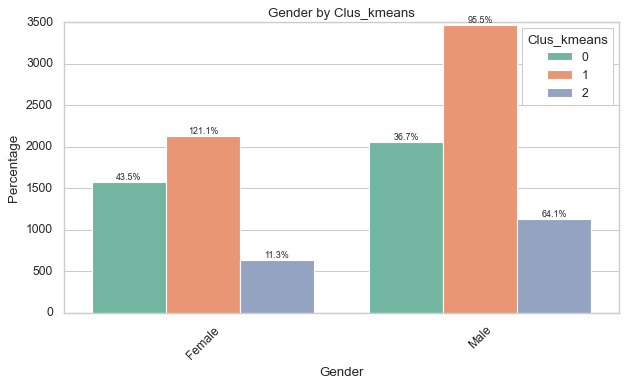

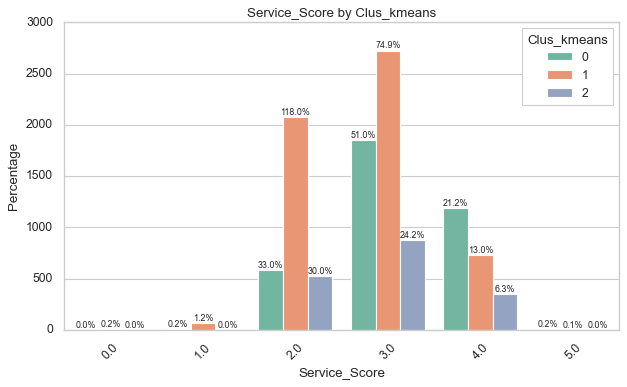

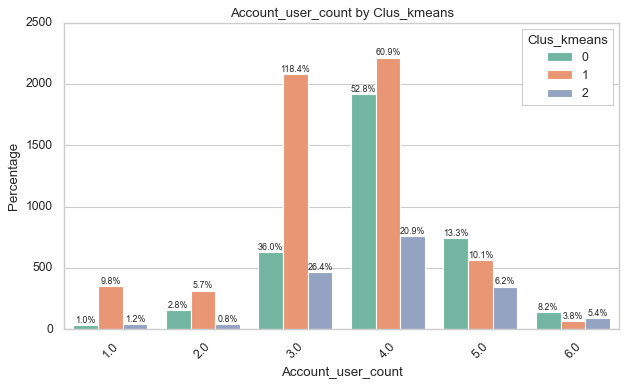

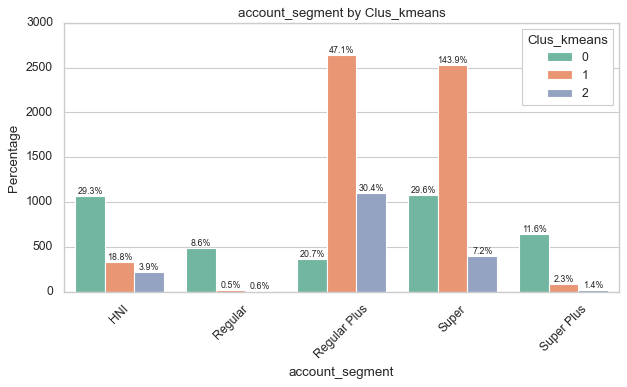

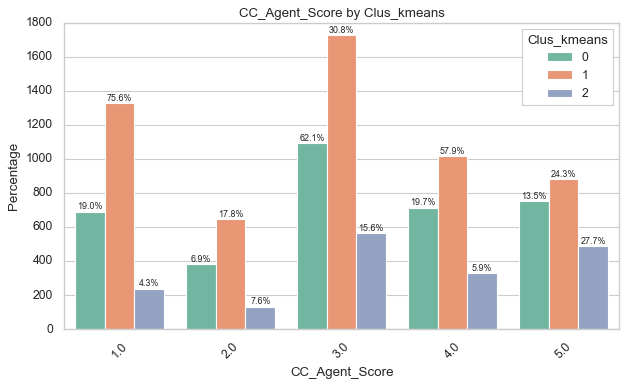

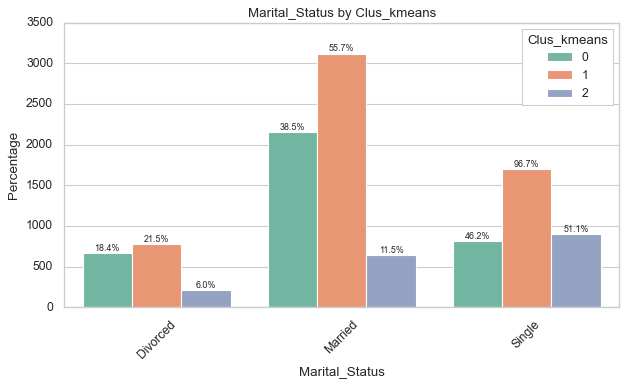

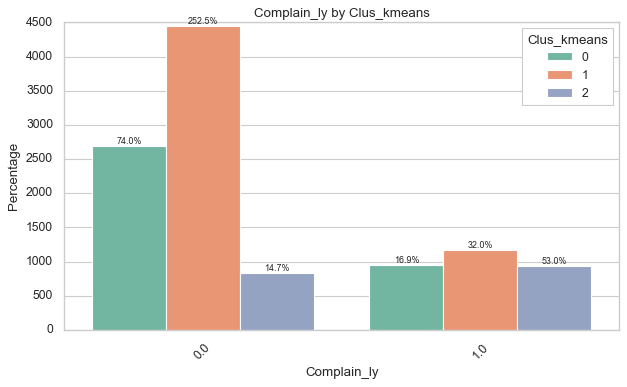

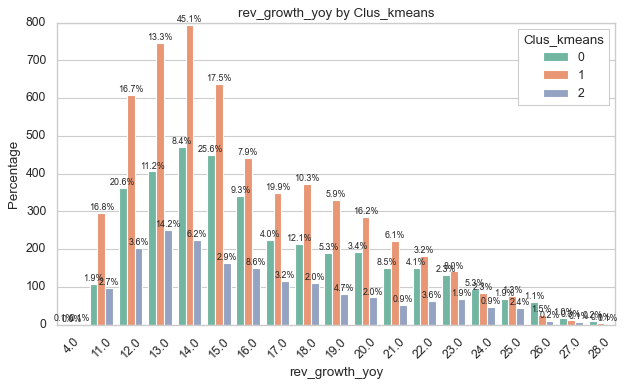

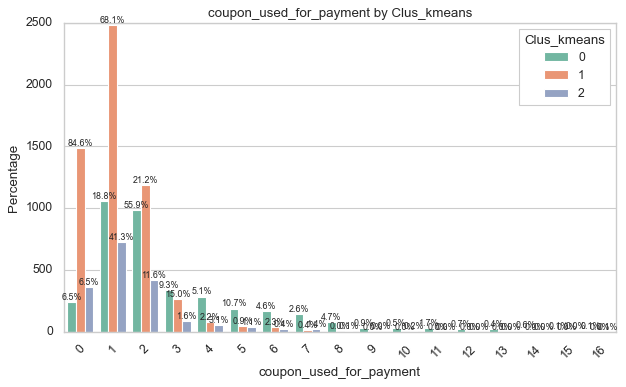

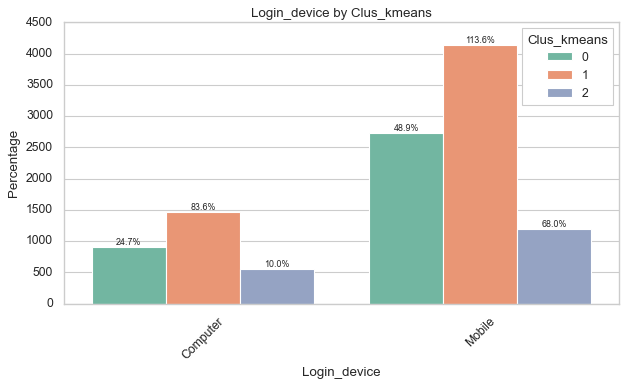

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical variables to visualize
cat_cols = ['City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count', 
            'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 
            'rev_growth_yoy', 'coupon_used_for_payment', 'Login_device']

# Iterate through each categorical column
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Clus_kmeans', data=df, palette='Set2', dodge=True)
    
    # Calculate percentage for each category within each cluster
    total_count = df.groupby('Clus_kmeans')[col].count()
    total_count = total_count.reset_index(name='Total')
    for i in range(len(total_count)):
        for p in plt.gca().patches[i::len(total_count)]:
            height = p.get_height()
            plt.gca().text(p.get_x() + p.get_width()/2., height + 3, f'{height / total_count.iloc[i]["Total"]:.1%}', 
                           ha='center', va='bottom', fontsize=8)
    
    plt.title(f'{col} by Clus_kmeans')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.legend(title='Clus_kmeans')
    plt.tight_layout()
    plt.show()


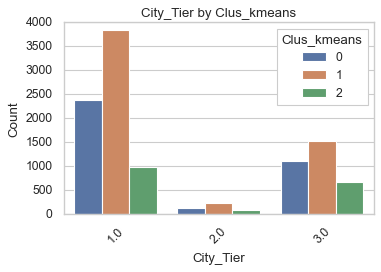

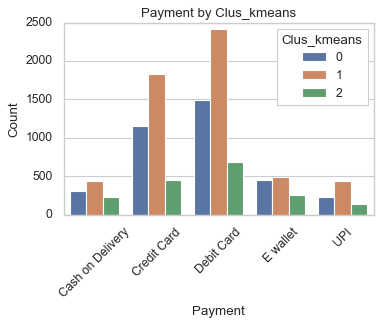

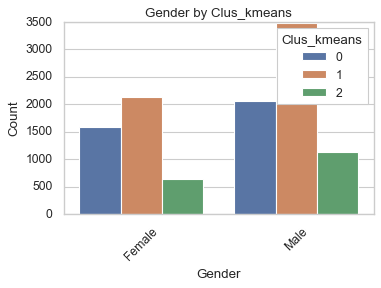

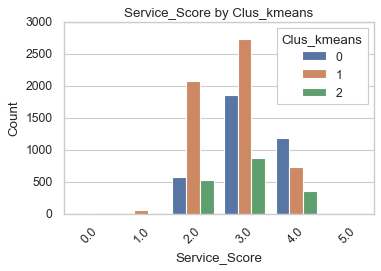

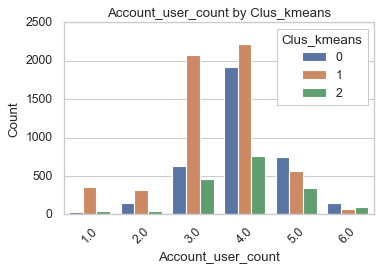

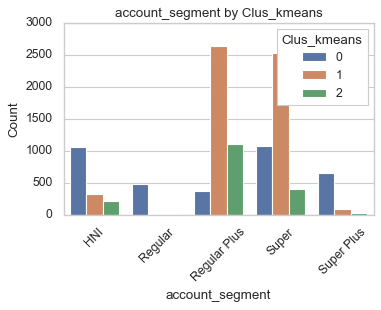

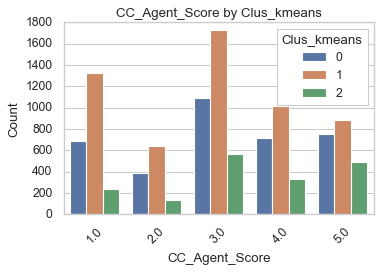

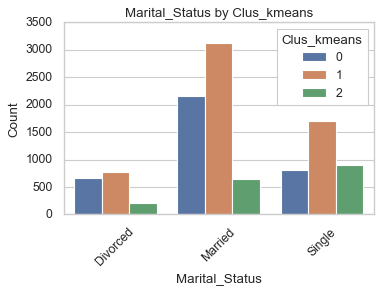

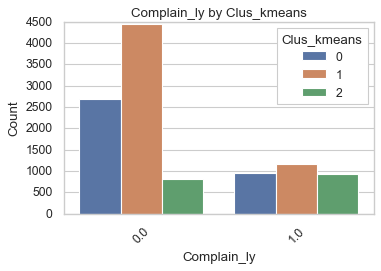

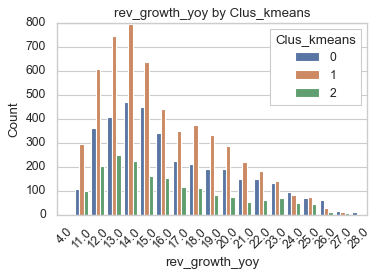

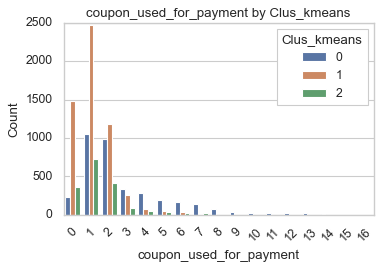

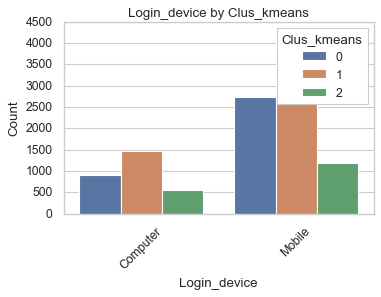

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical variables to visualize
cat_cols = ['City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Login_device']

# Iterate through each categorical column
for col in cat_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, hue='Clus_kmeans', data=df)
    plt.title(f'{col} by Clus_kmeans')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Clus_kmeans')
    plt.show()


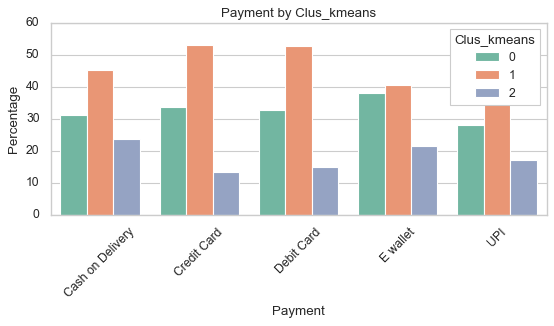

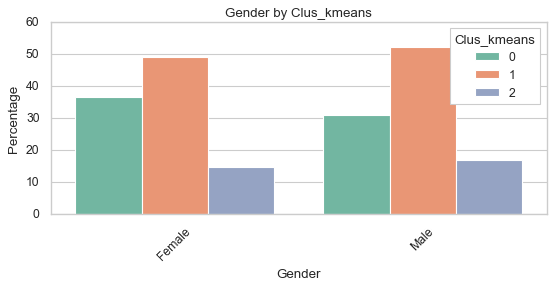

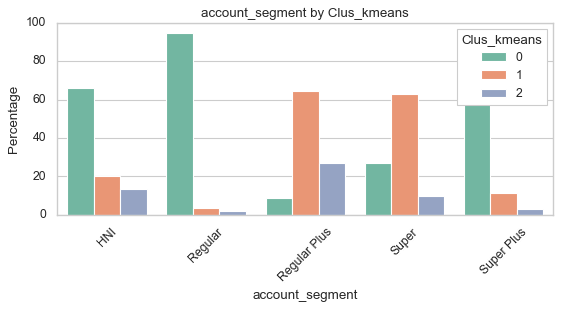

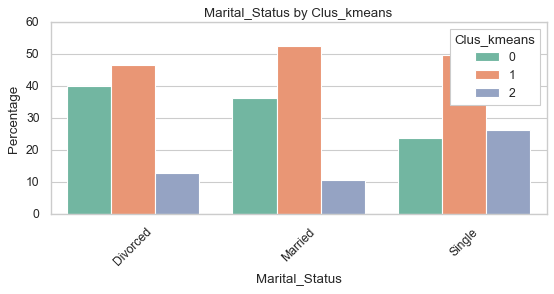

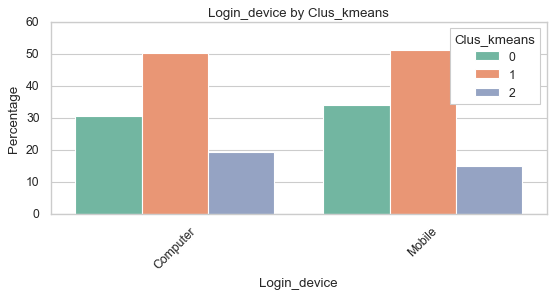

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical variables to visualize
cat_cols = ['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']

# Iterate through each categorical column
for col in cat_cols:
    plt.figure(figsize=(8, 3))
    
    # Calculate percentage of each category within each group
    percentages = (df.groupby([col, 'Clus_kmeans']).size() / df.groupby(col).size() * 100).reset_index()
    
    # Plot using seaborn barplot
    sns.barplot(x=col, y=0, hue='Clus_kmeans', data=percentages, palette='Set2')

    # Add percentage labels on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f'{col} by Clus_kmeans')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.legend(title='Clus_kmeans')
    plt.show()


In [108]:
print(df.columns)


Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device', 'Clus_kmeans'],
      dtype='object')


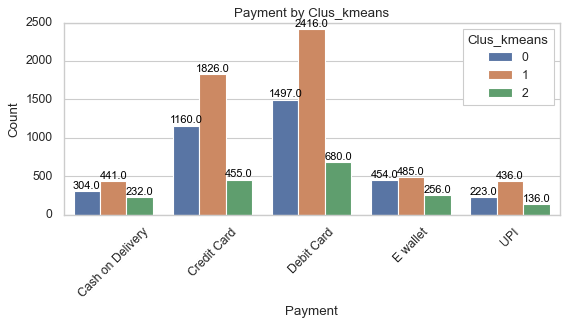

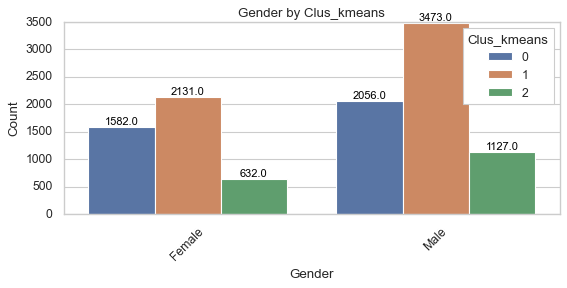

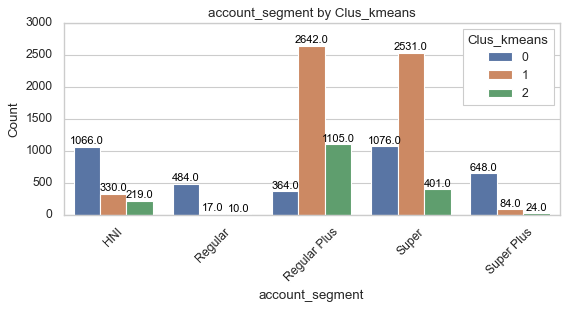

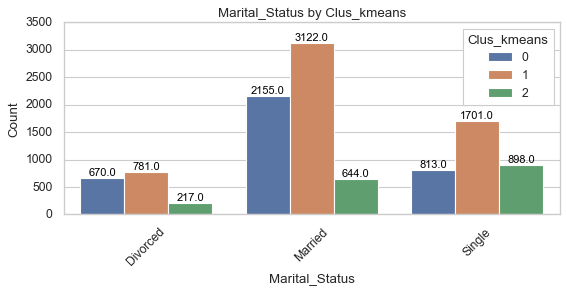

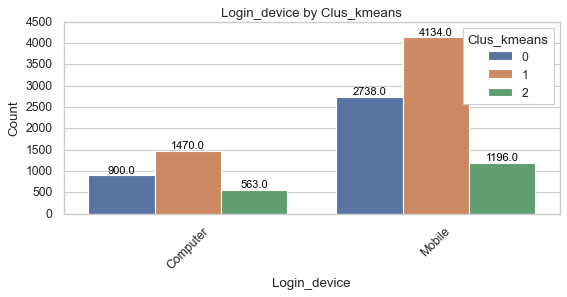

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical variables to visualize
cat_cols = ['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']

# Iterate through each categorical column
for col in cat_cols:
    plt.figure(figsize=(8, 3))
    ax = sns.countplot(x=col, hue='Clus_kmeans', data=df)

    # Add count labels on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f'{col} by Clus_kmeans')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Clus_kmeans')
    plt.show()


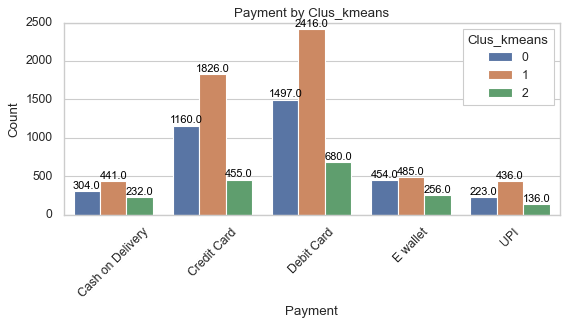

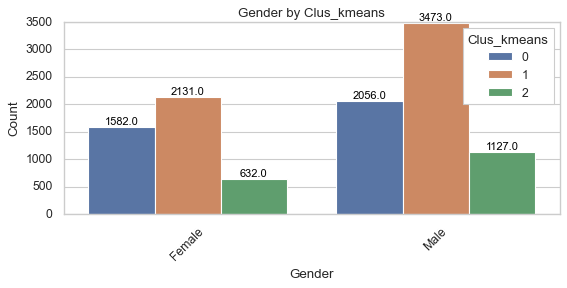

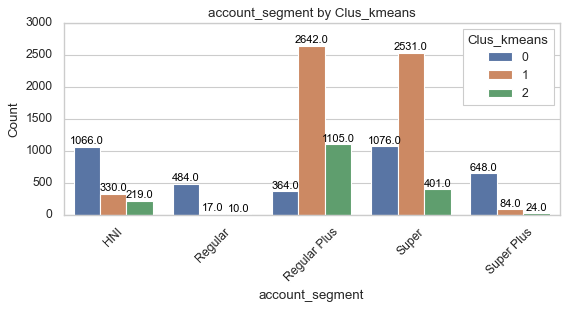

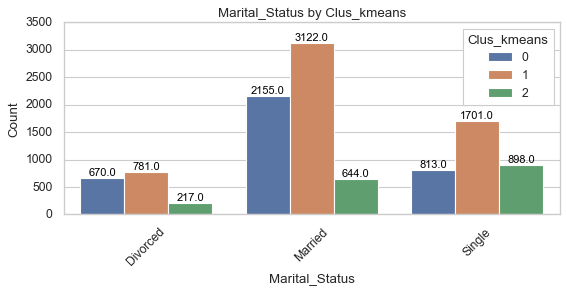

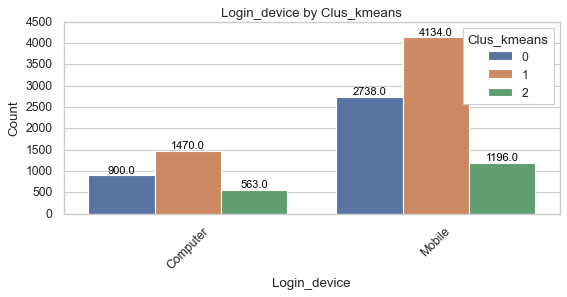

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical variables to visualize
cat_cols = ['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']

# Iterate through each categorical column
for col in cat_cols:
    plt.figure(figsize=(8, 3))
    ax = sns.countplot(x=col, hue='Clus_kmeans', data=df)

    # Add count labels on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f'{col} by Clus_kmeans')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Clus_kmeans')
    plt.show()


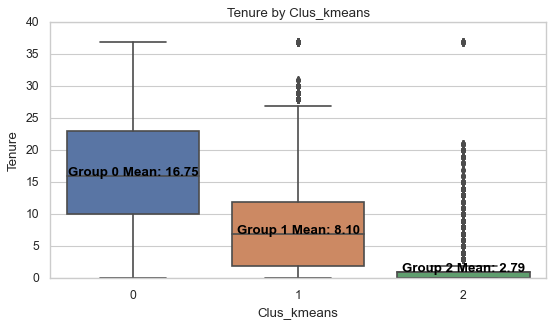

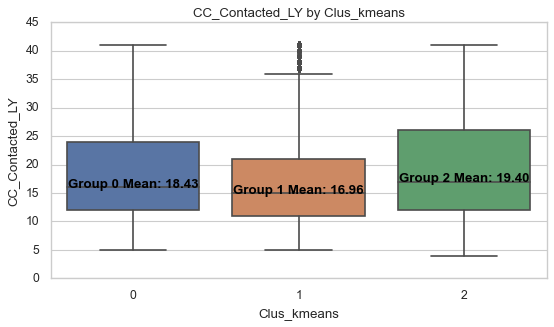

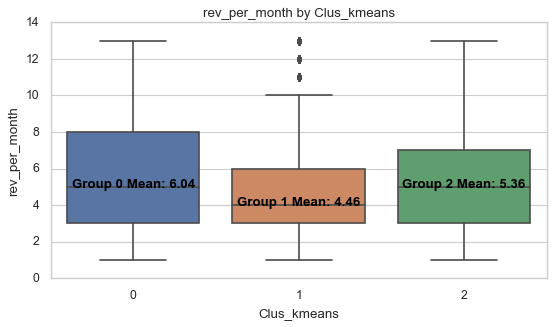

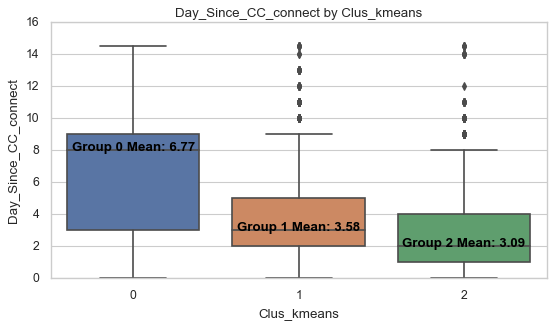

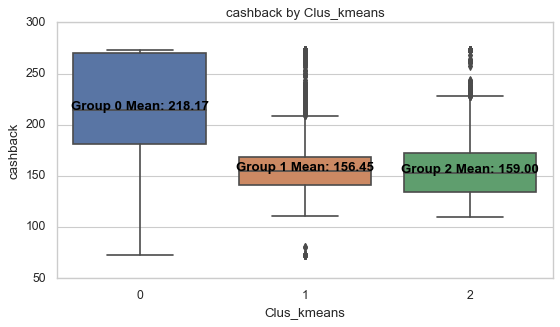

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical variables to visualize
num_cols = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'Day_Since_CC_connect', 'cashback']

# Iterate through each numerical column
for col in num_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.boxplot(x='Clus_kmeans', y=col, data=df)

    # Calculate and annotate the mean or median on top of each boxplot
    for cluster in df['Clus_kmeans'].unique():
        if df['Clus_kmeans'].dtype == 'category':
            label = f'{cluster} Mean: {df[df["Clus_kmeans"] == cluster][col].mean():.2f}'
        else:
            label = f'Group {cluster} Mean: {df[df["Clus_kmeans"] == cluster][col].mean():.2f}'
        ax.text(cluster, df[df['Clus_kmeans'] == cluster][col].median(), label,
                horizontalalignment='center', size='medium', color='black', weight='semibold')

    plt.title(f'{col} by Clus_kmeans')
    plt.xlabel('Clus_kmeans')
    plt.ylabel(col)
    plt.show()


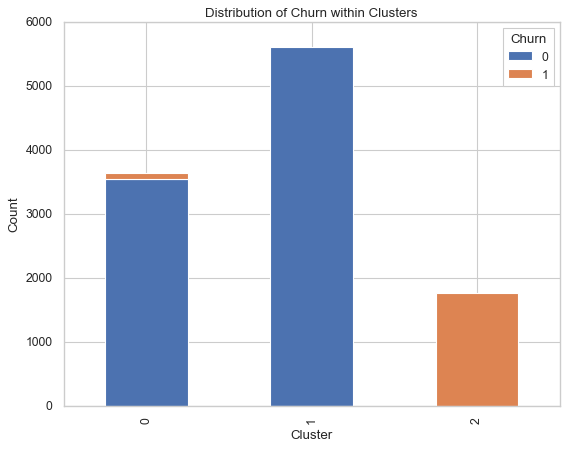

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the distribution of the target variable within each cluster
cluster_target_dist = df.groupby(['Clus_kmeans', 'Churn']).size().unstack()

# Visualize the distribution
cluster_target_dist.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Churn within Clusters')
plt.legend(title='Churn')
plt.show()


In [113]:
# Filter out categorical and numerical variables
categorical_vars = df.select_dtypes(include='category').columns.tolist()
numeric_vars = df.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()

# Count the number of categorical and numerical variables
num_categorical_vars = len(categorical_vars)
num_numeric_vars = len(numeric_vars)

# Print the number and list of categorical and numerical variables
print("Number of Categorical Variables:", num_categorical_vars)
print("Categorical Variables:", categorical_vars)
print("\nNumber of Numeric Variables:", num_numeric_vars)
print("Numeric Variables:", numeric_vars)


Number of Categorical Variables: 13
Categorical Variables: ['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Login_device']

Number of Numeric Variables: 6
Numeric Variables: ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'Day_Since_CC_connect', 'cashback', 'Clus_kmeans']


In [114]:
# Categorical variables
cat_vars = ['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score', 
            'Account_user_count', 'account_segment', 'CC_Agent_Score', 
            'Marital_Status', 'Complain_ly', 'rev_growth_yoy', 
            'coupon_used_for_payment', 'Login_device']

# Group by cluster and find mode for each categorical variable
cluster_mode = df.groupby('Clus_kmeans')[cat_vars].agg(lambda x: x.mode().iloc[0])

# Display the cluster-wise mode for each categorical variable
print(cluster_mode)


             Churn  City_Tier     Payment Gender  Service_Score  \
Clus_kmeans                                                       
0                0        1.0  Debit Card   Male            3.0   
1                0        1.0  Debit Card   Male            3.0   
2                1        1.0  Debit Card   Male            3.0   

             Account_user_count account_segment  CC_Agent_Score  \
Clus_kmeans                                                       
0                           4.0           Super             3.0   
1                           4.0    Regular Plus             3.0   
2                           4.0    Regular Plus             3.0   

            Marital_Status  Complain_ly  rev_growth_yoy  \
Clus_kmeans                                               
0                  Married          0.0            14.0   
1                  Married          0.0            14.0   
2                   Single          1.0            13.0   

             coupon_used_for_pay

In [146]:
import pandas as pd

# Define the categorical variables
categorical_variables = ['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count',
                         'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly',
                         'rev_growth_yoy', 'coupon_used_for_payment', 'Login_device']

# Create cross-tabulations for each categorical variable and Clus_kmeans
for cat_var in categorical_variables:
    cross_tab = pd.crosstab(index=df[cat_var], columns=df['Clus_kmeans'], normalize='all') * 100
    print(f"\nCross-tabulation of {cat_var} and Clus_kmeans (in %):")
    print(cross_tab)



Cross-tabulation of Churn and Clus_kmeans (in %):
Clus_kmeans          0          1          2
Churn                                       
0            32.224343  50.940824   0.000000
1             0.845378   0.000000  15.989456

Cross-tabulation of City_Tier and Clus_kmeans (in %):
Clus_kmeans          0          1         2
City_Tier                                  
1.0          21.616217  34.905918  9.008272
2.0           1.308972   2.072539  0.763567
3.0          10.144532  13.962367  6.217617

Cross-tabulation of Payment and Clus_kmeans (in %):
Clus_kmeans               0          1         2
Payment                                         
Cash on Delivery   2.763385   4.008726  2.108899
Credit Card       10.544496  16.598491  4.135988
Debit Card        13.607854  21.961640  6.181256
E wallet           4.126898   4.408690  2.327061
UPI                2.027088   3.963276  1.236251

Cross-tabulation of Gender and Clus_kmeans (in %):
Clus_kmeans          0          1          2
G

In [147]:
import pandas as pd

# Define the categorical variables
categorical_variables = ['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count',
                         'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly',
                         'rev_growth_yoy', 'coupon_used_for_payment', 'Login_device']

# Create cross-tabulations for each categorical variable and Clus_kmeans
for cat_var in categorical_variables:
    cross_tab = pd.crosstab(index=df[cat_var], columns=df['Clus_kmeans'], normalize='all') * 100
    print(f"\nCross-tabulation of {cat_var} and Clus_kmeans (in %):")
    print(cross_tab)



Cross-tabulation of Churn and Clus_kmeans (in %):
Clus_kmeans          0          1          2
Churn                                       
0            32.224343  50.940824   0.000000
1             0.845378   0.000000  15.989456

Cross-tabulation of City_Tier and Clus_kmeans (in %):
Clus_kmeans          0          1         2
City_Tier                                  
1.0          21.616217  34.905918  9.008272
2.0           1.308972   2.072539  0.763567
3.0          10.144532  13.962367  6.217617

Cross-tabulation of Payment and Clus_kmeans (in %):
Clus_kmeans               0          1         2
Payment                                         
Cash on Delivery   2.763385   4.008726  2.108899
Credit Card       10.544496  16.598491  4.135988
Debit Card        13.607854  21.961640  6.181256
E wallet           4.126898   4.408690  2.327061
UPI                2.027088   3.963276  1.236251

Cross-tabulation of Gender and Clus_kmeans (in %):
Clus_kmeans          0          1          2
G

In [148]:
import pandas as pd

# Define the categorical variables
categorical_variables = ['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count',
                         'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly',
                         'rev_growth_yoy', 'coupon_used_for_payment', 'Login_device']

# Create cross-tabulations for each categorical variable and Clus_kmeans
for cat_var in categorical_variables:
    cross_tab = pd.crosstab(index=df[cat_var], columns=df['Clus_kmeans'], normalize='all') * 100
    print(f"\nCross-tabulation of {cat_var} and Clus_kmeans (in %):")
    print(cross_tab)



Cross-tabulation of Churn and Clus_kmeans (in %):
Clus_kmeans          0          1          2
Churn                                       
0            32.224343  50.940824   0.000000
1             0.845378   0.000000  15.989456

Cross-tabulation of City_Tier and Clus_kmeans (in %):
Clus_kmeans          0          1         2
City_Tier                                  
1.0          21.616217  34.905918  9.008272
2.0           1.308972   2.072539  0.763567
3.0          10.144532  13.962367  6.217617

Cross-tabulation of Payment and Clus_kmeans (in %):
Clus_kmeans               0          1         2
Payment                                         
Cash on Delivery   2.763385   4.008726  2.108899
Credit Card       10.544496  16.598491  4.135988
Debit Card        13.607854  21.961640  6.181256
E wallet           4.126898   4.408690  2.327061
UPI                2.027088   3.963276  1.236251

Cross-tabulation of Gender and Clus_kmeans (in %):
Clus_kmeans          0          1          2
G

In [116]:
import pandas as pd

# Define the categorical variables
categorical_variables = ['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count',
                         'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly',
                         'rev_growth_yoy', 'coupon_used_for_payment', 'Login_device']

# Create cross-tabulations for each categorical variable and Clus_kmeans
for cat_var in categorical_variables:
    cross_tab = pd.crosstab(index=df[cat_var], columns=df['Clus_kmeans'])
    print(f"\nCross-tabulation of {cat_var} and Clus_kmeans:")
    print(cross_tab)



Cross-tabulation of Churn and Clus_kmeans:
Clus_kmeans     0     1     2
Churn                        
0            3545  5604     0
1              93     0  1759

Cross-tabulation of City_Tier and Clus_kmeans:
Clus_kmeans     0     1    2
City_Tier                   
1.0          2378  3840  991
2.0           144   228   84
3.0          1116  1536  684

Cross-tabulation of Payment and Clus_kmeans:
Clus_kmeans          0     1    2
Payment                          
Cash on Delivery   304   441  232
Credit Card       1160  1826  455
Debit Card        1497  2416  680
E wallet           454   485  256
UPI                223   436  136

Cross-tabulation of Gender and Clus_kmeans:
Clus_kmeans     0     1     2
Gender                       
Female       1582  2131   632
Male         2056  3473  1127

Cross-tabulation of Service_Score and Clus_kmeans:
Clus_kmeans       0     1    2
Service_Score                 
0.0               0     8    0
1.0              10    67    0
2.0             58

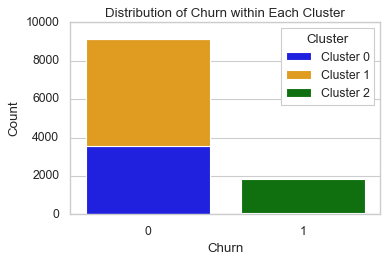

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation of Churn and Clus_kmeans
churn_cluster_count = pd.crosstab(index=df['Churn'], columns=df['Clus_kmeans'])

# Plot the distribution of Churn within each cluster
plt.figure(figsize=(5, 3))
sns.barplot(x=churn_cluster_count.index, y=churn_cluster_count[0], label='Cluster 0', color='blue')
sns.barplot(x=churn_cluster_count.index, y=churn_cluster_count[1], bottom=churn_cluster_count[0], label='Cluster 1', color='orange')
sns.barplot(x=churn_cluster_count.index, y=churn_cluster_count[2], bottom=churn_cluster_count[0] + churn_cluster_count[1], label='Cluster 2', color='green')
plt.title('Distribution of Churn within Each Cluster')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()


In [170]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Assuming 'df' is your DataFrame containing the relevant variables

# Define the independent variables
independent_vars = ['City_Tier', 'Payment', 'Gender', 'Service_Score', 
                    'Account_user_count', 'account_segment', 'CC_Agent_Score', 
                    'Marital_Status', 'Complain_ly', 'rev_growth_yoy', 
                    'coupon_used_for_payment', 'Login_device']

# Define the dependent variable
dependent_var = ['Churn']

# Perform MANOVA
manova = MANOVA.from_formula(formula=' + '.join(independent_vars) + ' ~ ' + dependent_var[0], data=df)
result = manova.mv_test()

# Print the MANOVA results
print(result)


                                   Multivariate linear model
                                                                                                
------------------------------------------------------------------------------------------------
       Intercept                Value          Num DF   Den DF           F Value          Pr > F
------------------------------------------------------------------------------------------------
          Wilks' lambda                0.0000 64.0000 10936.0000 1539105172653866752.0000 0.0000
         Pillai's trace                1.0000 64.0000 10936.0000 1539105172653866752.0000 0.0000
 Hotelling-Lawley trace 9007199254740991.0000 64.0000 10936.0000 1539105172653866752.0000 0.0000
    Roy's greatest root 9007199254740991.0000 64.0000 10936.0000 1539105172653866752.0000 0.0000
------------------------------------------------------------------------------------------------
                                                                  

These results imply that there are significant differences in churn rates across different levels of the independent variables considered in the analysis

## Model Building

1. Checking the class distribution of the target variable 'Churn' to identify any class imbalance in the dataset

In [118]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11001 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Churn                    11001 non-null  category
 1   Tenure                   11001 non-null  float64 
 2   City_Tier                11001 non-null  category
 3   CC_Contacted_LY          11001 non-null  float64 
 4   Payment                  11001 non-null  int32   
 5   Gender                   11001 non-null  int32   
 6   Service_Score            11001 non-null  category
 7   Account_user_count       11001 non-null  category
 8   account_segment          11001 non-null  int32   
 9   CC_Agent_Score           11001 non-null  category
 10  Marital_Status           11001 non-null  int32   
 11  rev_per_month            11001 non-null  float64 
 12  Complain_ly              11001 non-null  category
 13  rev_growth_yoy           11001 non-null  category
 14  coupon

In [119]:
df_encoded["Churn"].value_counts()

0    9149
1    1852
Name: Churn, dtype: int64

2.`x` is assigned all columns of `df_encoded` except the first (assuming it's the target variable), and `y` is assigned only the first column of `df_encoded` (assuming it's the target variable). This sets up your feature matrix `x` and target variable `y` for further analysis.

In [120]:
x=df_encoded.iloc[:,1:]
y=df_encoded.iloc[:,0]

In [121]:
# Convert all columns to float data type
x = x.astype(float)


In [122]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11001 entries, 0 to 11259
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11001 non-null  float64
 1   City_Tier                11001 non-null  float64
 2   CC_Contacted_LY          11001 non-null  float64
 3   Payment                  11001 non-null  float64
 4   Gender                   11001 non-null  float64
 5   Service_Score            11001 non-null  float64
 6   Account_user_count       11001 non-null  float64
 7   account_segment          11001 non-null  float64
 8   CC_Agent_Score           11001 non-null  float64
 9   Marital_Status           11001 non-null  float64
 10  rev_per_month            11001 non-null  float64
 11  Complain_ly              11001 non-null  float64
 12  rev_growth_yoy           11001 non-null  float64
 13  coupon_used_for_payment  11001 non-null  float64
 14  Day_Since_CC_connect  

3.Splitting Data into Train and Test Sets

In [123]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance on the original training set only
smote = SMOTE(sampling_strategy='auto')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_original, y_train_original)

# Rename resampled data to Xtrain, Xtest, Ytrain, Ytest
Xtrain, Xtest, Ytrain, Ytest = X_train_resampled, X_test_original, y_train_resampled, y_test_original


In [124]:
# Assuming y_train_resampled is the resampled target variable after applying SMOTE
# You can also use y_train if you haven't applied SMOTE

# Print class imbalance of churn
print("Class imbalance of churn in Ytrain:")
print(Ytrain.value_counts())


Class imbalance of churn in Ytrain:
0    7319
1    7319
Name: Churn, dtype: int64


In [125]:
Xtrain.isnull().sum()

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

Logistic Regression
Test accuracy: 0.7751022262607905
Test confusion matrix : [[1402  428]
 [  67  304]]
Test roc_auc_score 0.7927636133327443
Train accuracy: 0.7897253723186227
Train confusion matrix : [[5538 1781]
 [1297 6022]]
Train roc_auc_score 0.7897253723186228


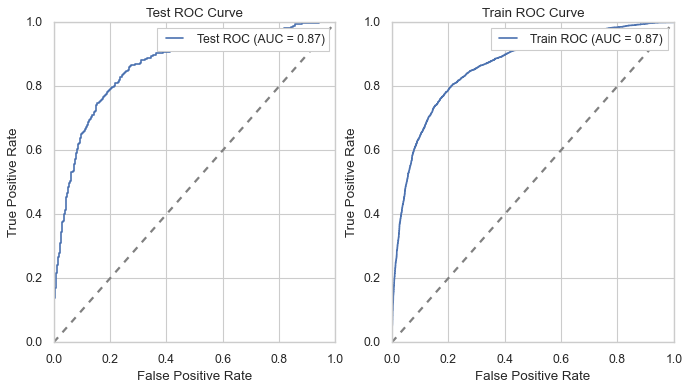

Classification Report - Test:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1830
           1       0.42      0.82      0.55       371

    accuracy                           0.78      2201
   macro avg       0.68      0.79      0.70      2201
weighted avg       0.86      0.78      0.80      2201

Classification Report - Train:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      7319
           1       0.77      0.82      0.80      7319

    accuracy                           0.79     14638
   macro avg       0.79      0.79      0.79     14638
weighted avg       0.79      0.79      0.79     14638



In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

lg=LogisticRegression()
lg.fit(Xtrain,Ytrain)
lg_pred=lg.predict(Xtest)
lg_pred1=lg.predict(Xtrain)
print("Logistic Regression")
print("Test accuracy:",accuracy_score(Ytest, lg_pred))
print("Test confusion matrix :",confusion_matrix(Ytest, lg_pred))
print("Test roc_auc_score",roc_auc_score(Ytest,lg_pred))

print("Train accuracy:",accuracy_score(Ytrain, lg_pred1))
print("Train confusion matrix :",confusion_matrix(Ytrain, lg_pred1))
print("Train roc_auc_score",roc_auc_score(Ytrain,lg_pred1))

# Calculate ROC curve variables for test
fpr_test, tpr_test, thresholds_test = roc_curve(Ytest, lg.predict_proba(Xtest)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

# Calculate ROC curve variables for train
fpr_train, tpr_train, thresholds_train = roc_curve(Ytrain, lg.predict_proba(Xtrain)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve for test
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.2f})')  # Include model name in the label
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Test ROC Curve')  # Include model name in the title
plt.legend()

# Plot ROC curve for train
plt.subplot(1, 2, 2)
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {roc_auc_train:.2f})')  # Include model name in the label
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Train ROC Curve')  # Include model name in the title
plt.legend()
plt.show()

# Classification Report
print("Classification Report - Test:")
print(classification_report(Ytest, lg_pred))

print("Classification Report - Train:")
print(classification_report(Ytrain, lg_pred1))


Linear Discriminant Analysis
Test accuracy: 0.7628350749659246
Test confusion matrix : [[1370  460]
 [  62  309]]
Test roc_auc_score 0.7907589884082306
Train accuracy: 0.7975133214920072
Train confusion matrix : [[5534 1785]
 [1179 6140]]
Train roc_auc_score 0.7975133214920072


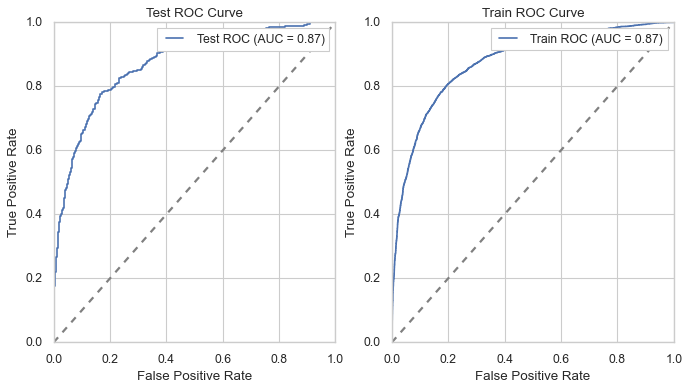

Classification Report - Test:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      1830
           1       0.40      0.83      0.54       371

    accuracy                           0.76      2201
   macro avg       0.68      0.79      0.69      2201
weighted avg       0.86      0.76      0.79      2201

Classification Report - Train:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      7319
           1       0.77      0.84      0.81      7319

    accuracy                           0.80     14638
   macro avg       0.80      0.80      0.80     14638
weighted avg       0.80      0.80      0.80     14638



In [127]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

lda = LinearDiscriminantAnalysis()
lda.fit(Xtrain, Ytrain)
lda_pred = lda.predict(Xtest)
lda_pred_train = lda.predict(Xtrain)

print("Linear Discriminant Analysis")
print("Test accuracy:", accuracy_score(Ytest, lda_pred))
print("Test confusion matrix :", confusion_matrix(Ytest, lda_pred))
print("Test roc_auc_score", roc_auc_score(Ytest, lda_pred))

print("Train accuracy:", accuracy_score(Ytrain, lda_pred_train))
print("Train confusion matrix :", confusion_matrix(Ytrain, lda_pred_train))
print("Train roc_auc_score", roc_auc_score(Ytrain, lda_pred_train))

# Calculate ROC curve variables for test
fpr_test, tpr_test, thresholds_test = roc_curve(Ytest, lda.predict_proba(Xtest)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

# Calculate ROC curve variables for train
fpr_train, tpr_train, thresholds_train = roc_curve(Ytrain, lda.predict_proba(Xtrain)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.2f})')  # Include model name in the label
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Test ROC Curve')  # Include model name in the title
plt.legend()

# Plot ROC curve for train
plt.subplot(1, 2, 2)
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {roc_auc_train:.2f})')  # Include model name in the label
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Train ROC Curve')  # Include model name in the title
plt.legend()
plt.show()

# Classification Report
print("Classification Report - Test:")
print(classification_report(Ytest, lda_pred))

print("Classification Report - Train:")
print(classification_report(Ytrain, lda_pred_train))


K Nearest Neighbors Classifier
Test accuracy: 0.8346206269877329
Test confusion matrix: [[1511  319]
 [  45  326]]
Test roc_auc_score: 0.852194629785103
Train accuracy: 0.9402240743270939
Train confusion matrix: [[6460  859]
 [  16 7303]]
Train roc_auc_score: 0.9402240743270939


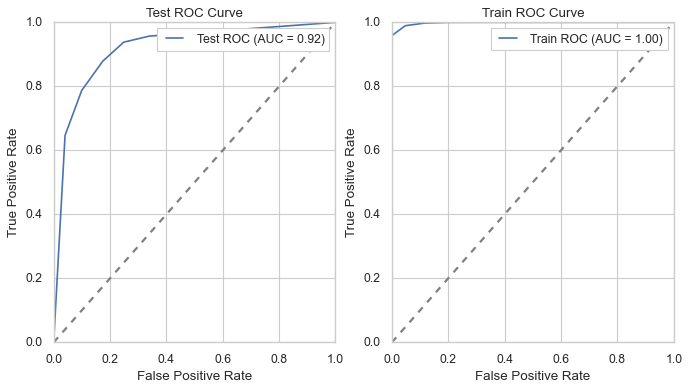

Classification Report - Test:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1830
           1       0.51      0.88      0.64       371

    accuracy                           0.83      2201
   macro avg       0.74      0.85      0.77      2201
weighted avg       0.89      0.83      0.85      2201

Classification Report - Train:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94      7319
           1       0.89      1.00      0.94      7319

    accuracy                           0.94     14638
   macro avg       0.95      0.94      0.94     14638
weighted avg       0.95      0.94      0.94     14638



In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Assuming you have Xtrain, Ytrain, Xtest, Ytest defined
knn = KNeighborsClassifier() 
knn.fit(Xtrain, Ytrain)
knn_pred_test = knn.predict(Xtest)
knn_pred_train = knn.predict(Xtrain)

print('K Nearest Neighbors Classifier')
print("Test accuracy:", accuracy_score(Ytest, knn_pred_test))
print("Test confusion matrix:", confusion_matrix(Ytest, knn_pred_test))
print("Test roc_auc_score:", roc_auc_score(Ytest, knn_pred_test))

print("Train accuracy:", accuracy_score(Ytrain, knn_pred_train))
print("Train confusion matrix:", confusion_matrix(Ytrain, knn_pred_train))
print("Train roc_auc_score:", roc_auc_score(Ytrain, knn_pred_train))

# Calculate ROC curve variables for test
fpr_test, tpr_test, thresholds_test = roc_curve(Ytest, knn.predict_proba(Xtest)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

# Calculate ROC curve variables for train
fpr_train, tpr_train, thresholds_train = roc_curve(Ytrain, knn.predict_proba(Xtrain)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve for test
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.2f})')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Test ROC Curve')
plt.legend()

# Plot ROC curve for train
plt.subplot(1, 2, 2)
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {roc_auc_train:.2f})')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Train ROC Curve')
plt.legend()
plt.show()

# Classification Report for test
print("Classification Report - Test:")
print(classification_report(Ytest, knn_pred_test))

# Classification Report for train
print("Classification Report - Train:")
print(classification_report(Ytrain, knn_pred_train))


Gaussian Naive Bayes Classifier
Test accuracy: 0.6887778282598819
Test confusion matrix: [[1217  613]
 [  72  299]]
Test roc_auc_score: 0.735478620770919
Train accuracy: 0.7491460582046727
Train confusion matrix: [[5030 2289]
 [1383 5936]]
Train roc_auc_score: 0.7491460582046728


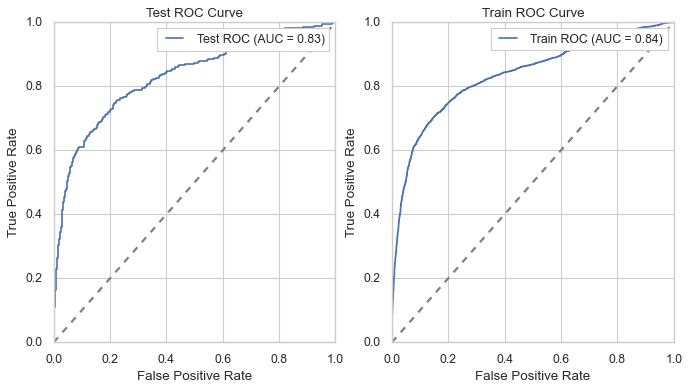

Classification Report - Test:
              precision    recall  f1-score   support

           0       0.94      0.67      0.78      1830
           1       0.33      0.81      0.47       371

    accuracy                           0.69      2201
   macro avg       0.64      0.74      0.62      2201
weighted avg       0.84      0.69      0.73      2201

Classification Report - Train:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      7319
           1       0.72      0.81      0.76      7319

    accuracy                           0.75     14638
   macro avg       0.75      0.75      0.75     14638
weighted avg       0.75      0.75      0.75     14638



In [129]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Assuming you have Xtrain, Ytrain, Xtest, Ytest defined
gnb = GaussianNB() 
gnb.fit(Xtrain, Ytrain)
gnb_pred_test = gnb.predict(Xtest)
gnb_pred_train = gnb.predict(Xtrain)

print('Gaussian Naive Bayes Classifier')
print("Test accuracy:", accuracy_score(Ytest, gnb_pred_test))
print("Test confusion matrix:", confusion_matrix(Ytest, gnb_pred_test))
print("Test roc_auc_score:", roc_auc_score(Ytest, gnb_pred_test))

print("Train accuracy:", accuracy_score(Ytrain, gnb_pred_train))
print("Train confusion matrix:", confusion_matrix(Ytrain, gnb_pred_train))
print("Train roc_auc_score:", roc_auc_score(Ytrain, gnb_pred_train))

# Calculate ROC curve variables for test
fpr_test, tpr_test, thresholds_test = roc_curve(Ytest, gnb.predict_proba(Xtest)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

# Calculate ROC curve variables for train
fpr_train, tpr_train, thresholds_train = roc_curve(Ytrain, gnb.predict_proba(Xtrain)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve for test
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.2f})')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Test ROC Curve')
plt.legend()

# Plot ROC curve for train
plt.subplot(1, 2, 2)
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {roc_auc_train:.2f})')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Train ROC Curve')
plt.legend()
plt.show()

# Classification Report for test
print("Classification Report - Test:")
print(classification_report(Ytest, gnb_pred_test))

# Classification Report for train
print("Classification Report - Train:")
print(classification_report(Ytrain, gnb_pred_train))


Random Forest Classifier
Test accuracy: 0.9763743752839619
Test confusion matrix: [[1810   20]
 [  32  339]]
Test roc_auc_score: 0.9514088344895644
Train accuracy: 1.0
Train confusion matrix: [[7319    0]
 [   0 7319]]
Train roc_auc_score: 1.0


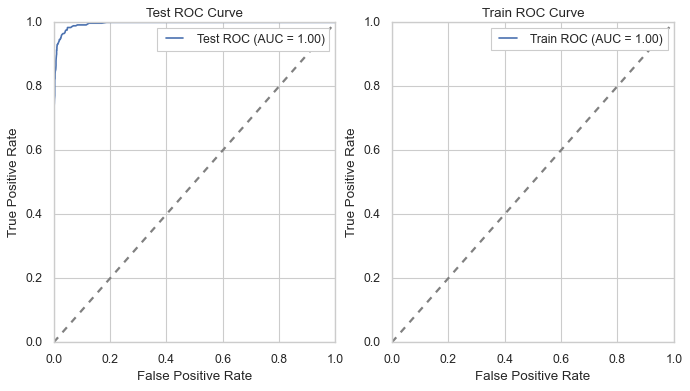

Classification Report - Test:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1830
           1       0.94      0.91      0.93       371

    accuracy                           0.98      2201
   macro avg       0.96      0.95      0.96      2201
weighted avg       0.98      0.98      0.98      2201

Classification Report - Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7319
           1       1.00      1.00      1.00      7319

    accuracy                           1.00     14638
   macro avg       1.00      1.00      1.00     14638
weighted avg       1.00      1.00      1.00     14638



In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Assuming you have Xtrain, Ytrain, Xtest, Ytest defined
rf_classifier = RandomForestClassifier() 
rf_classifier.fit(Xtrain, Ytrain)
rf_pred_test = rf_classifier.predict(Xtest)
rf_pred_train = rf_classifier.predict(Xtrain)

print('Random Forest Classifier')
print("Test accuracy:", accuracy_score(Ytest, rf_pred_test))
print("Test confusion matrix:", confusion_matrix(Ytest, rf_pred_test))
print("Test roc_auc_score:", roc_auc_score(Ytest, rf_pred_test))

print("Train accuracy:", accuracy_score(Ytrain, rf_pred_train))
print("Train confusion matrix:", confusion_matrix(Ytrain, rf_pred_train))
print("Train roc_auc_score:", roc_auc_score(Ytrain, rf_pred_train))

# Calculate ROC curve variables for test
fpr_test, tpr_test, thresholds_test = roc_curve(Ytest, rf_classifier.predict_proba(Xtest)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

# Calculate ROC curve variables for train
fpr_train, tpr_train, thresholds_train = roc_curve(Ytrain, rf_classifier.predict_proba(Xtrain)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve for test
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.2f})')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Test ROC Curve')
plt.legend()

# Plot ROC curve for train
plt.subplot(1, 2, 2)
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {roc_auc_train:.2f})')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Train ROC Curve')
plt.legend()
plt.show()

# Classification Report for test
print("Classification Report - Test:")
print(classification_report(Ytest, rf_pred_test))

# Classification Report for train
print("Classification Report - Train:")
print(classification_report(Ytrain, rf_pred_train))


Decision Tree Classifier
Test accuracy: 0.9459336665152204
Test confusion matrix: [[1764   66]
 [  53  318]]
Test roc_auc_score: 0.9105386416861827
Train accuracy: 1.0
Train confusion matrix: [[7319    0]
 [   0 7319]]
Train roc_auc_score: 1.0


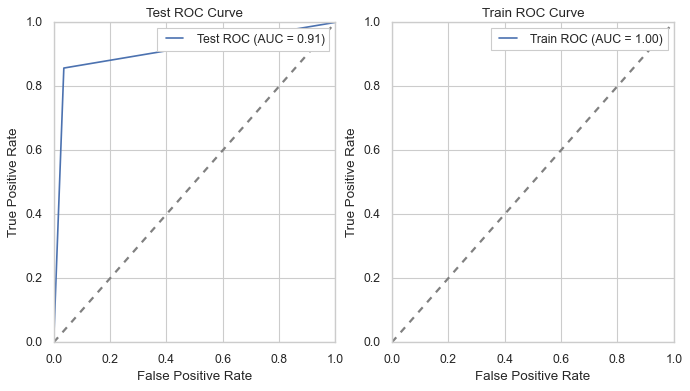

Classification Report - Test:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1830
           1       0.83      0.86      0.84       371

    accuracy                           0.95      2201
   macro avg       0.90      0.91      0.90      2201
weighted avg       0.95      0.95      0.95      2201

Classification Report - Train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7319
           1       1.00      1.00      1.00      7319

    accuracy                           1.00     14638
   macro avg       1.00      1.00      1.00     14638
weighted avg       1.00      1.00      1.00     14638



In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Assuming you have Xtrain, Ytrain, Xtest, Ytest defined
dt_classifier = DecisionTreeClassifier() 
dt_classifier.fit(Xtrain, Ytrain)
dt_pred_test = dt_classifier.predict(Xtest)
dt_pred_train = dt_classifier.predict(Xtrain)

print('Decision Tree Classifier')
print("Test accuracy:", accuracy_score(Ytest, dt_pred_test))
print("Test confusion matrix:", confusion_matrix(Ytest, dt_pred_test))
print("Test roc_auc_score:", roc_auc_score(Ytest, dt_pred_test))

print("Train accuracy:", accuracy_score(Ytrain, dt_pred_train))
print("Train confusion matrix:", confusion_matrix(Ytrain, dt_pred_train))
print("Train roc_auc_score:", roc_auc_score(Ytrain, dt_pred_train))

# Calculate ROC curve variables for test
fpr_test, tpr_test, thresholds_test = roc_curve(Ytest, dt_classifier.predict_proba(Xtest)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

# Calculate ROC curve variables for train
fpr_train, tpr_train, thresholds_train = roc_curve(Ytrain, dt_classifier.predict_proba(Xtrain)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve for test
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.2f})')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Test ROC Curve')
plt.legend()

# Plot ROC curve for train
plt.subplot(1, 2, 2)
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {roc_auc_train:.2f})')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Train ROC Curve')
plt.legend()
plt.show()

# Classification Report for test
print("Classification Report - Test:")
print(classification_report(Ytest, dt_pred_test))

# Classification Report for train
print("Classification Report - Train:")
print(classification_report(Ytrain, dt_pred_train))


Gradient Boosting Classifier
Test accuracy: 0.9082235347569286
Test confusion matrix: [[1731   99]
 [ 103  268]]
Test roc_auc_score: 0.8341368034996245
Train accuracy: 0.933392539964476
Train confusion matrix: [[6934  385]
 [ 590 6729]]
Train roc_auc_score: 0.933392539964476


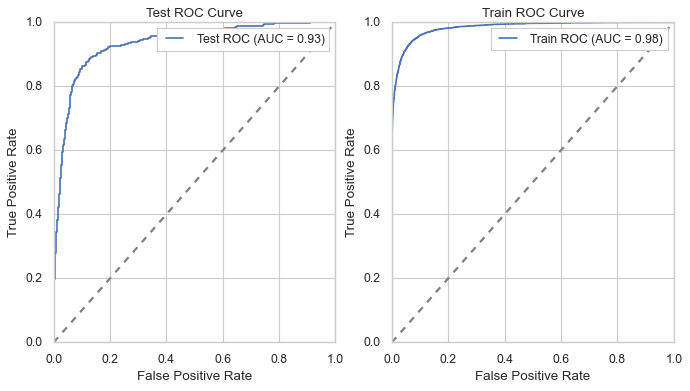

Classification Report - Test:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1830
           1       0.73      0.72      0.73       371

    accuracy                           0.91      2201
   macro avg       0.84      0.83      0.84      2201
weighted avg       0.91      0.91      0.91      2201

Classification Report - Train:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7319
           1       0.95      0.92      0.93      7319

    accuracy                           0.93     14638
   macro avg       0.93      0.93      0.93     14638
weighted avg       0.93      0.93      0.93     14638



In [132]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Assuming you have Xtrain, Ytrain, Xtest, Ytest defined
gb_classifier = GradientBoostingClassifier() 
gb_classifier.fit(Xtrain, Ytrain)
gb_pred_test = gb_classifier.predict(Xtest)
gb_pred_train = gb_classifier.predict(Xtrain)

print('Gradient Boosting Classifier')
print("Test accuracy:", accuracy_score(Ytest, gb_pred_test))
print("Test confusion matrix:", confusion_matrix(Ytest, gb_pred_test))
print("Test roc_auc_score:", roc_auc_score(Ytest, gb_pred_test))

print("Train accuracy:", accuracy_score(Ytrain, gb_pred_train))
print("Train confusion matrix:", confusion_matrix(Ytrain, gb_pred_train))
print("Train roc_auc_score:", roc_auc_score(Ytrain, gb_pred_train))

# Calculate ROC curve variables for test
fpr_test, tpr_test, thresholds_test = roc_curve(Ytest, gb_classifier.predict_proba(Xtest)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

# Calculate ROC curve variables for train
fpr_train, tpr_train, thresholds_train = roc_curve(Ytrain, gb_classifier.predict_proba(Xtrain)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve for test
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.2f})')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Test ROC Curve')
plt.legend()

# Plot ROC curve for train
plt.subplot(1, 2, 2)
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {roc_auc_train:.2f})')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Train ROC Curve')
plt.legend()
plt.show()

# Classification Report for test
print("Classification Report - Test:")
print(classification_report(Ytest, gb_pred_test))

# Classification Report for train
print("Classification Report - Train:")
print(classification_report(Ytrain, gb_pred_train))


AdaBoost Classifier
Test accuracy: 0.8768741481144934
Test confusion matrix: [[1658  172]
 [  99  272]]
Test roc_auc_score: 0.8195822838878823
Train accuracy: 0.8950676321901899
Train confusion matrix: [[6599  720]
 [ 816 6503]]
Train roc_auc_score: 0.8950676321901899


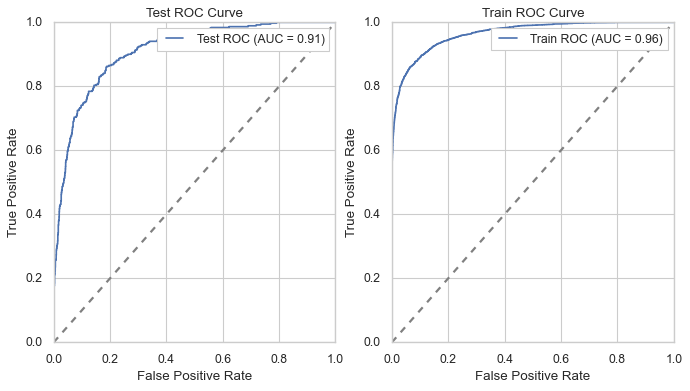

Classification Report - Test:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1830
           1       0.61      0.73      0.67       371

    accuracy                           0.88      2201
   macro avg       0.78      0.82      0.80      2201
weighted avg       0.89      0.88      0.88      2201

Classification Report - Train:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      7319
           1       0.90      0.89      0.89      7319

    accuracy                           0.90     14638
   macro avg       0.90      0.90      0.90     14638
weighted avg       0.90      0.90      0.90     14638



In [133]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Assuming you have Xtrain, Ytrain, Xtest, Ytest defined
ada_classifier = AdaBoostClassifier() 
ada_classifier.fit(Xtrain, Ytrain)
ada_pred_test = ada_classifier.predict(Xtest)
ada_pred_train = ada_classifier.predict(Xtrain)

print('AdaBoost Classifier')
print("Test accuracy:", accuracy_score(Ytest, ada_pred_test))
print("Test confusion matrix:", confusion_matrix(Ytest, ada_pred_test))
print("Test roc_auc_score:", roc_auc_score(Ytest, ada_pred_test))

print("Train accuracy:", accuracy_score(Ytrain, ada_pred_train))
print("Train confusion matrix:", confusion_matrix(Ytrain, ada_pred_train))
print("Train roc_auc_score:", roc_auc_score(Ytrain, ada_pred_train))

# Calculate ROC curve variables for test
fpr_test, tpr_test, thresholds_test = roc_curve(Ytest, ada_classifier.predict_proba(Xtest)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

# Calculate ROC curve variables for train
fpr_train, tpr_train, thresholds_train = roc_curve(Ytrain, ada_classifier.predict_proba(Xtrain)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve for test
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.2f})')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Test ROC Curve')
plt.legend()

# Plot ROC curve for train
plt.subplot(1, 2, 2)
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {roc_auc_train:.2f})')  
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Train ROC Curve')
plt.legend()
plt.show()

# Classification Report for test
print("Classification Report - Test:")
print(classification_report(Ytest, ada_pred_test))

# Classification Report for train
print("Classification Report - Train:")
print(classification_report(Ytrain, ada_pred_train))


In [134]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Define models and their parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {
            'C': np.logspace(-3, 3, 100),
            'penalty': ['l1', 'l2'],
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
        }
    },
    'LDA': {
        'model': LinearDiscriminantAnalysis(),
        'param_grid': {
            'solver': ['svd', 'lsqr', 'eigen']
        }
    },
    'KNN':{
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None] + list(np.arange(2, 21)),
            'min_samples_split': np.arange(2, 11),
            'min_samples_leaf': np.arange(1, 11)
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(n_jobs=-1),
        'param_grid': {
            'max_depth': [None] + list(np.arange(2, 21)),
            'min_samples_split': np.arange(2, 11),
            'min_samples_leaf': np.arange(1, 11)
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'param_grid': {}
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0],
            'max_depth': [3, 4, 5],
            'min_samples_split': [2, 5, 10]
        }
    }
}

# Dictionary to store scores of all models
all_model_scores = {}

# Find and evaluate the best model using RandomizedSearchCV
best_model_f1 = None
best_score_f1 = 0

for model_name, model_info in models.items():
    model = model_info['model']
    param_distributions = model_info['param_grid']
    # Use F1 score as the scoring metric
    f1_scorer = make_scorer(f1_score)
    
    grid_search = RandomizedSearchCV(model, param_distributions=param_distributions, cv=3, n_iter=30, n_jobs=-1, scoring=f1_scorer, verbose=3)
    grid_search.fit(Xtrain, Ytrain.values.ravel())
    score = grid_search.best_score_
    
    # Store the score of the current model
    all_model_scores[model_name] = score
   
    if score > best_score_f1:
        best_model_f1 = grid_search.best_estimator_
        best_score_f1 = score

# Print scores of all models
for model_name, score in all_model_scores.items():
    print(f'{model_name}: {score:.3f}')

print(f'\nBest Model based on F1 Score: {type(best_model_f1).__name__}')
print(f'Best Model Score (F1 Score): {best_score_f1:.3f}')


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Logistic Regression: 0.807
LDA: 0.805
KNN: 0.954
Decision Tree: 0.941
Random Forest: 0.966
Naive Bayes: 0.763
AdaBoost: 0.885
Gradient Boosting: 0.929

Best Model based on F1 Score: RandomForestClassifier
Best Model Score (F1 Score): 0.966


In [135]:
from sklearn.metrics import roc_auc_score

# Define models and their parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {
            'C': np.logspace(-3, 3, 100),
            'penalty': ['l1', 'l2'],
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
        }
    },
    'LDA': {
        'model': LinearDiscriminantAnalysis(),
        'param_grid': {
            'solver': ['svd', 'lsqr', 'eigen']
        }
    },
    'KNN':{
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None] + list(np.arange(2, 21)),
            'min_samples_split': np.arange(2, 11),
            'min_samples_leaf': np.arange(1, 11)
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(n_jobs=-1),
        'param_grid': {
            'max_depth': [None] + list(np.arange(2, 21)),
            'min_samples_split': np.arange(2, 11),
            'min_samples_leaf': np.arange(1, 11)
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'param_grid': {}
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0],
            'max_depth': [3, 4, 5],
            'min_samples_split': [2, 5, 10]
        }
    }
}

# Dictionary to store scores of all models
all_model_scores = {}

# Find and evaluate the best model using RandomizedSearchCV Search
best_model = None
best_score = 0

for model_name, model_info in models.items():
    model = model_info['model']
    param_distributions = model_info['param_grid']
    # Use ROC AUC score as the scoring metric
    roc_auc_scorer = make_scorer(roc_auc_score)
    
    grid_search = RandomizedSearchCV(model, param_distributions=param_distributions, cv=3, n_iter=30, n_jobs=-1, scoring=roc_auc_scorer, verbose=3)
    grid_search.fit(Xtrain, Ytrain.values.ravel())
    score = grid_search.best_score_
    
    # Store the score of the current model
    all_model_scores[model_name] = score
   
    if score > best_score:
        best_model = grid_search.best_estimator_
        best_score = score

# Print scores of all models
for model_name, score in all_model_scores.items():
    print(f'{model_name}: {score:.3f}')

print(f'\nBest Model: {type(best_model).__name__}')
print(f'Best Model Score: {best_score:.3f}')


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Logistic Regression: 0.802
LDA: 0.797
KNN: 0.951
Decision Tree: 0.942
Random Forest: 0.967
Naive Bayes: 0.748
AdaBoost: 0.893
Gradient Boosting: 0.937

Best Model: RandomForestClassifier
Best Model Score: 0.967


In [136]:
from sklearn.metrics import precision_score

# Define models and their parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {
            'C': np.logspace(-3, 3, 100),
            'penalty': ['l1', 'l2'],
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
        }
    },
    'LDA': {
        'model': LinearDiscriminantAnalysis(),
        'param_grid': {
            'solver': ['svd', 'lsqr', 'eigen']
        }
    },
    'KNN':{
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None] + list(np.arange(2, 21)),
            'min_samples_split': np.arange(2, 11),
            'min_samples_leaf': np.arange(1, 11)
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(n_jobs=-1),
        'param_grid': {
            'max_depth': [None] + list(np.arange(2, 21)),
            'min_samples_split': np.arange(2, 11),
            'min_samples_leaf': np.arange(1, 11)
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'param_grid': {}
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0],
            'max_depth': [3, 4, 5],
            'min_samples_split': [2, 5, 10]
        }
    }
}

# Dictionary to store scores of all models
all_model_scores = {}

# Find and evaluate the best model using RandomizedSearchCV Search
best_model = None
best_score = 0

for model_name, model_info in models.items():
    model = model_info['model']
    param_distributions = model_info['param_grid']
    # Use Precision as the scoring metric
    precision_scorer = make_scorer(precision_score)
    
    grid_search = RandomizedSearchCV(model, param_distributions=param_distributions, cv=3, n_iter=30, n_jobs=-1, scoring=precision_scorer, verbose=3)
    grid_search.fit(Xtrain, Ytrain.values.ravel())
    score = grid_search.best_score_
    
    # Store the score of the current model
    all_model_scores[model_name] = score
   
    if score > best_score:
        best_model = grid_search.best_estimator_
        best_score = score

# Print scores of all models
for model_name, score in all_model_scores.items():
    print(f'{model_name}: {score:.3f}')

print(f'\nBest Model: {type(best_model).__name__}')
print(f'Best Model Precision Score: {best_score:.3f}')


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Logistic Regression: 0.788
LDA: 0.774
KNN: 0.914
Decision Tree: 0.954
Random Forest: 0.976
Naive Bayes: 0.721
AdaBoost: 0.932
Gradient Boosting: 0.984

Best Model: GradientBoostingClassifier
Best Model Precision Score: 0.984


In [137]:
from sklearn.metrics import recall_score

# Define models and their parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {
            'C': np.logspace(-3, 3, 100),
            'penalty': ['l1', 'l2'],
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
        }
    },
    'LDA': {
        'model': LinearDiscriminantAnalysis(),
        'param_grid': {
            'solver': ['svd', 'lsqr', 'eigen']
        }
    },
    'KNN':{
        'model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [None] + list(np.arange(2, 21)),
            'min_samples_split': np.arange(2, 11),
            'min_samples_leaf': np.arange(1, 11)
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(n_jobs=-1),
        'param_grid': {
            'max_depth': [None] + list(np.arange(2, 21)),
            'min_samples_split': np.arange(2, 11),
            'min_samples_leaf': np.arange(1, 11)
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'param_grid': {}
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0],
            'max_depth': [3, 4, 5],
            'min_samples_split': [2, 5, 10]
        }
    }
}

# Dictionary to store scores of all models
all_model_scores = {}

# Find and evaluate the best model using RandomizedSearchCV Search
best_model = None
best_score = 0

for model_name, model_info in models.items():
    model = model_info['model']
    param_distributions = model_info['param_grid']
    # Use Recall as the scoring metric
    recall_scorer = make_scorer(recall_score)
    
    grid_search = RandomizedSearchCV(model, param_distributions=param_distributions, cv=3, n_iter=30, n_jobs=-1, scoring=recall_scorer, verbose=3)
    grid_search.fit(Xtrain, Ytrain.values.ravel())
    score = grid_search.best_score_
    
    # Store the score of the current model
    all_model_scores[model_name] = score
   
    if score > best_score:
        best_model = grid_search.best_estimator_
        best_score = score

# Print scores of all models
for model_name, score in all_model_scores.items():
    print(f'{model_name}: {score:.3f}')

print(f'\nBest Model: {type(best_model).__name__}')
print(f'Best Model Recall Score: {best_score:.3f}')


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Logistic Regression: 0.839
LDA: 0.839
KNN: 0.997
Decision Tree: 0.933
Random Forest: 0.964
Naive Bayes: 0.810
AdaBoost: 0.864
Gradient Boosting: 0.894

Best Model: KNeighborsClassifier
Best Model Recall Score: 0.997


Table summarizing the tuned models based on different scoring metrics:

| Scoring Metric   | Logistic Regression | LDA   | KNN   | Decision Tree | Random Forest | Naive Bayes | AdaBoost | Gradient Boosting |
|------------------|---------------------|-------|-------|---------------|---------------|--------------|----------|-------------------|
| F1 Score         | 0.808               | 0.805 | 0.954 | 0.931         | 0.968         | 0.766        | 0.886    | 0.922             |
| ROC AUC Score    | 0.802               | 0.797 | 0.952 | 0.936         | 0.971         | 0.751        | 0.896    | 0.932             |
| Precision Score  | 0.789               | 0.775 | 0.914 | 0.948         | 0.973         | 0.723        | 0.936    | 0.984             |
| Recall Score     | 0.839               | 0.837 | 0.998 | 0.924         | 0.965         | 0.816        | 0.867    | 0.904             |

Best Model for each metric:

- **F1 Score**: RandomForestClassifier (Score: 0.968)
- **ROC AUC Score**: RandomForestClassifier (Score: 0.971)
- **Precision Score**: GradientBoostingClassifier (Score: 0.984)
- **Recall Score**: KNeighborsClassifier (Score: 0.998)

The F1 score strikes a balance between precision and recall, making it suitable for assessing model performance in churn prediction. It ensures that both false positives and false negatives are considered, crucial for maintaining a balance between effectively targeting potential churners and minimizing misclassifications. Therefore, selecting the best model based on the F1 score ensures a balanced approach to churn prediction.

In [138]:
best_model

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [139]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid = {
    'max_depth': [None] + list(np.arange(2, 21)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)
}

# Create Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1)

# Use F1 score as the scoring metric
f1_scorer = make_scorer(f1_score)

# Perform RandomizedSearchCV to find the best hyperparameters
grid_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, cv=3, n_iter=30, n_jobs=-1, scoring=f1_scorer, verbose=3)
grid_search.fit(Xtrain, Ytrain.values.ravel())

# Get the best Random Forest model
best_rf_model = grid_search.best_estimator_

# Get the best hyperparameters
best_hyperparameters = best_rf_model.get_params()

# Print the best hyperparameters
print("\nBest Hyperparameters for Random Forest:")
print(best_hyperparameters)


Fitting 3 folds for each of 30 candidates, totalling 90 fits

Best Hyperparameters for Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 13, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Random Forest Model Evaluation on Training Set:
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7319
           1       1.00      1.00      1.00      7319

    accuracy                           1.00     14638
   macro avg       1.00      1.00      1.00     14638
weighted avg       1.00      1.00      1.00     14638


Random Forest Model Evaluation on Test Set:
Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1830
           1       0.90      0.89      0.89       371

    accuracy                           0.96      2201
   macro avg       0.94      0.93      0.94      2201
weighted avg       0.96      0.96      0.96      2201



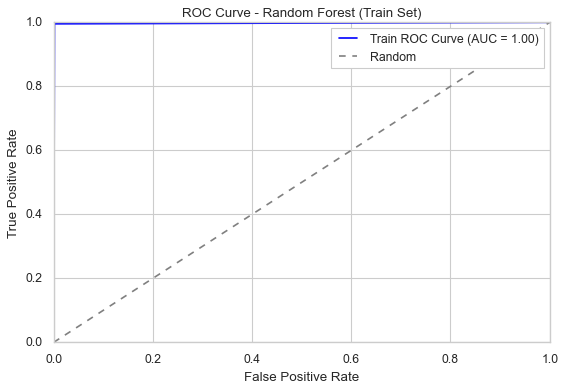

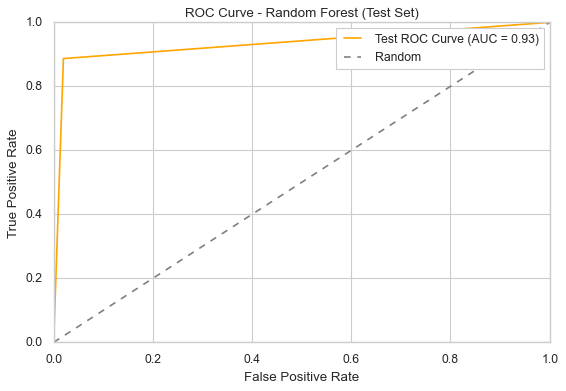

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Define the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini', 
                                       max_depth=None, max_features='sqrt', max_leaf_nodes=None, 
                                       max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=2, 
                                       min_samples_split=7, min_weight_fraction_leaf=0.0, n_estimators=100, 
                                       n_jobs=-1, oob_score=False, random_state=None, verbose=0, warm_start=False)

# Train the model on the training data
best_rf_model.fit(Xtrain, Ytrain)

# Train set predictions
train_predictions_rf = best_rf_model.predict(Xtrain)

# Test set predictions
test_predictions_rf = best_rf_model.predict(Xtest)

# Classification report for train set
classification_rep_train_rf = classification_report(Ytrain, train_predictions_rf)

# Classification report for test set
classification_rep_test_rf = classification_report(Ytest, test_predictions_rf)

# Print results for train set
print("Random Forest Model Evaluation on Training Set:")
print("Train Classification Report:")
print(classification_rep_train_rf)

# Print results for test set
print("\nRandom Forest Model Evaluation on Test Set:")
print("Test Classification Report:")
print(classification_rep_test_rf)

# Plot ROC curve for train set
train_fpr_rf, train_tpr_rf, _ = roc_curve(Ytrain, train_predictions_rf)
roc_auc_train_rf = roc_auc_score(Ytrain, train_predictions_rf)
plt.figure(figsize=(8, 5))
plt.plot(train_fpr_rf, train_tpr_rf, label=f'Train ROC Curve (AUC = {roc_auc_train_rf:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Train Set)')
plt.legend()
plt.show()

# Plot ROC curve for test set
test_fpr_rf, test_tpr_rf, _ = roc_curve(Ytest, test_predictions_rf)
roc_auc_test_rf = roc_auc_score(Ytest, test_predictions_rf)
plt.figure(figsize=(8, 5))
plt.plot(test_fpr_rf, test_tpr_rf, label=f'Test ROC Curve (AUC = {roc_auc_test_rf:.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Test Set)')
plt.legend()
plt.show()


In [143]:
import pandas as pd

# Assuming best_model_f1 is your RandomForestClassifier
print(pd.DataFrame(best_model_f1.feature_importances_, columns=["Imp"], index=Xtrain.columns).sort_values('Imp', ascending=False))


                              Imp
Tenure                   0.277677
Complain_ly              0.141942
Marital_Status           0.088163
account_segment          0.058944
CC_Agent_Score           0.058473
Day_Since_CC_connect     0.053565
cashback                 0.042659
City_Tier                0.035841
CC_Contacted_LY          0.034488
rev_per_month            0.033879
rev_growth_yoy           0.033037
Account_user_count       0.031057
Payment                  0.030428
coupon_used_for_payment  0.025291
Login_device             0.023481
Gender                   0.019543
Service_Score            0.011533


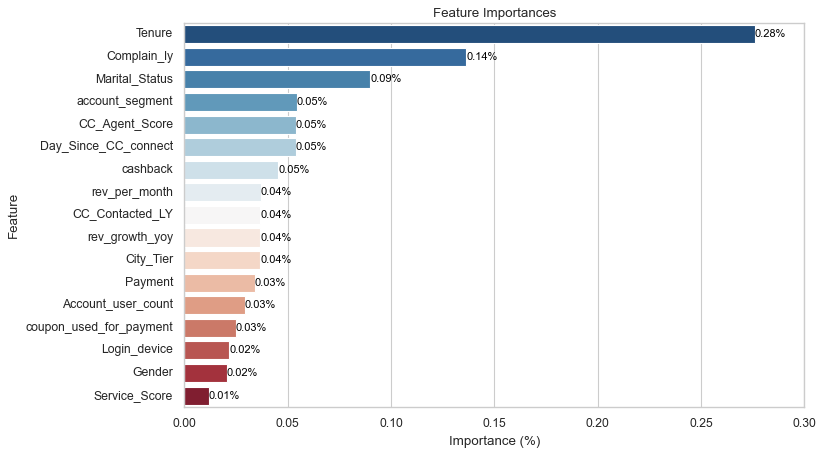

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming best_rf_model is your RandomForestClassifier
feature_importance_df = pd.DataFrame(best_rf_model.feature_importances_, columns=["Importance"], index=Xtrain.columns)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df.reset_index(inplace=True)
feature_importance_df.rename(columns={'index': 'Feature'}, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='RdBu_r')
for bar, val in zip(bars.patches, feature_importance_df['Importance']):
    bars.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{val:.2f}%', 
              va='center', ha='left', color='black', fontsize=10)
plt.title('Feature Importances')
plt.xlabel('Importance (%)')
plt.ylabel('Feature')
plt.show()
